INHERITED SYMMETRIES

In [140]:
%run ../modules.ipynb
# Change this cell to change the kernel function throughout

#tutorial
sys.path.append('../0. kernel-tutorials/')
# Local Utilities for Notebook
from utilities.kernels import linear_kernel, gaussian_kernel
from utilities.general import load_variables, get_stats
from utilities.plotting import (
    plot_base, 
    plot_projection,
    plot_regression,
    plot_simple,
    get_cmaps,
    table_from_dict,
    check_mirrors,
)
cmaps = get_cmaps()
plt.style.use("../0. kernel-tutorials/utilities/kernel_pcovr.mplstyle")
dbl_fig = (2 * plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1])


kernel_params = {"kernel": "rbf", "gamma": 1}
kernel_func = partial(rbf_kernel, gamma=1)
kernel_type = "gaussian"

../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'cbarHot' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'cbarBWR' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:35: UserWarning: Trying to register the cmap 'cbarPhi' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'cbarHot_0.3_1.05' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'bone_r_0.2_1.0' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'Reds_0.3_1.0' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/ut

In [121]:
#dataset load
len_dataset=79855
load_profile('egazzarr')
qb = QueryBuilder()
qb.append(orm.StructureData)

In [122]:
select=79854
qb_red=random.sample(qb.all(), select)

In [123]:
import periodictable
from periodictable import elements as el
n_el=20
el=list(el)
el[1:20]

[H, He, Li, Be, B, C, N, O, F, Ne, Na, Mg, Al, Si, P, S, Cl, Ar, K]

In [124]:
frames_ase=[]
br_l=[] #str
source=[] #id, ersion, db
sp_g=[] #int
partial=[] #bool
vol=[] #int
n_atoms=[]
norm_tot=np.zeros((select, len(el)))
start=0
n_operations=[]
yes_or_no=[]
syst=[]
general_metal=0
general_even=0
metal=0
even=0
number_structures_with_multiple_of_4=0
point_group_list=[]

for [structure_data],i in zip(qb_red, range(select)):
    
    if 'spacegroup_number' in structure_data.extras:
        
        sg=structure_data.extras['spacegroup_number']
        natom = len(structure_data.get_site_kindnames())
        frame=structure_data.get_ase()
        frame.wrap(eps=1e-12)
        frames_ase.append(frame)
        n_atoms.append(natom)

        if natom %4==0:
            number_structures_with_multiple_of_4+=1
            yes_or_no. append(1)
        else:
            yes_or_no.append(0)
            
        sp_group=point_group(sg)
        point_group_list.append(pg)
        n_operations.append(o)


In [125]:
dict={'n_op':n_operations, 'point_group':point_group_list,'natom': n_atoms, 'magic':yes_or_no} 
df= pd.DataFrame(dict)
df.head()

,n_op,point_group,natom,magic
0,2,2,518,0
1,4,2/m,68,1
2,16,4/mmm,42,0
3,4,222,32,1
4,48,m3_m,22,0


In [126]:
{|p{4cm}|p{5cm}|}
m=m.drop(['natom', 'magic'], axis=1)
nm=df.loc[df['magic'] == 0]
nm=nm.drop(['natom', 'magic'], axis=1)

Text(0.5, 0, 'Point group')

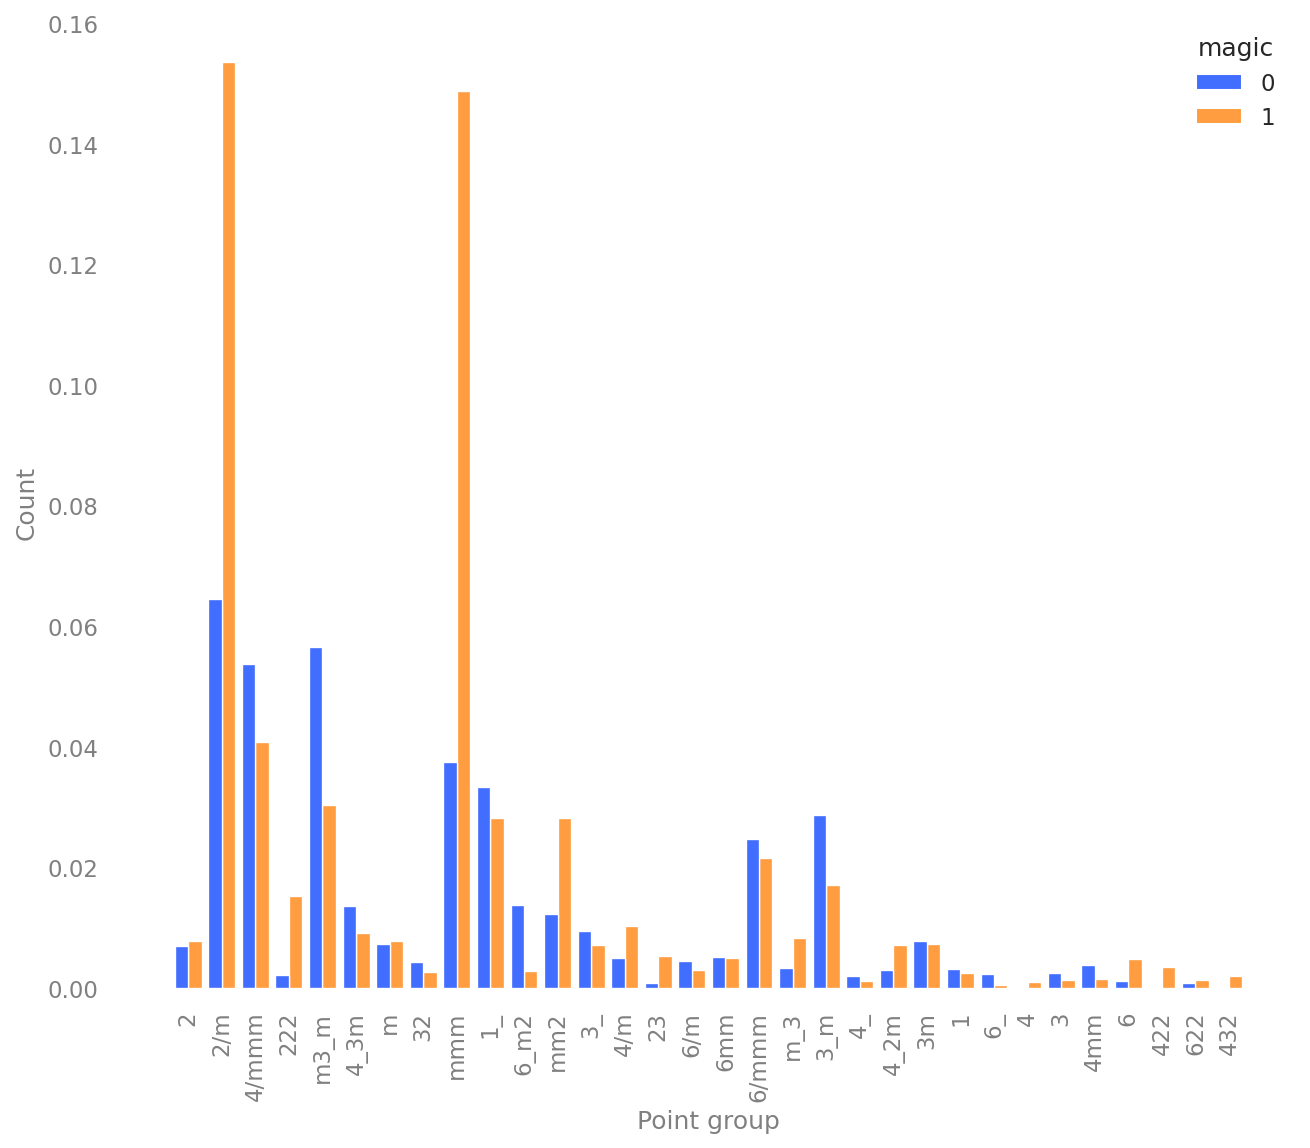

In [127]:
# plt.style.use('seaborn')
sns.set(style="white", palette="bright", color_codes=True)
f, ax = plt.subplots(figsize=(9, 8))
sns.despine(left=True, bottom=True)
g=sns.histplot(data=df, x='point_group', hue='magic',stat='density', multiple='dodge', shrink=.8)
plt.xticks(c='grey', rotation=90)
plt.yticks(c='grey')
plt.ylabel('Count', c='grey')
plt.xlabel('Point group', c='grey')

0.58580659704 0.41419340296 ['2' '2/m' '4/mmm' '222' 'm3_m' '4_3m' 'm' '32' 'mmm' '1_' '6_m2' 'mm2'
 '3_' '4/m' '23' '6/m' '6mm' '6/mmm' 'm_3' '3_m' '4_' '4_2m' '3m' '1' '6_'
 '4' '3' '4mm' '6' '422' '622' '432']


(-0.001, 0.0175)

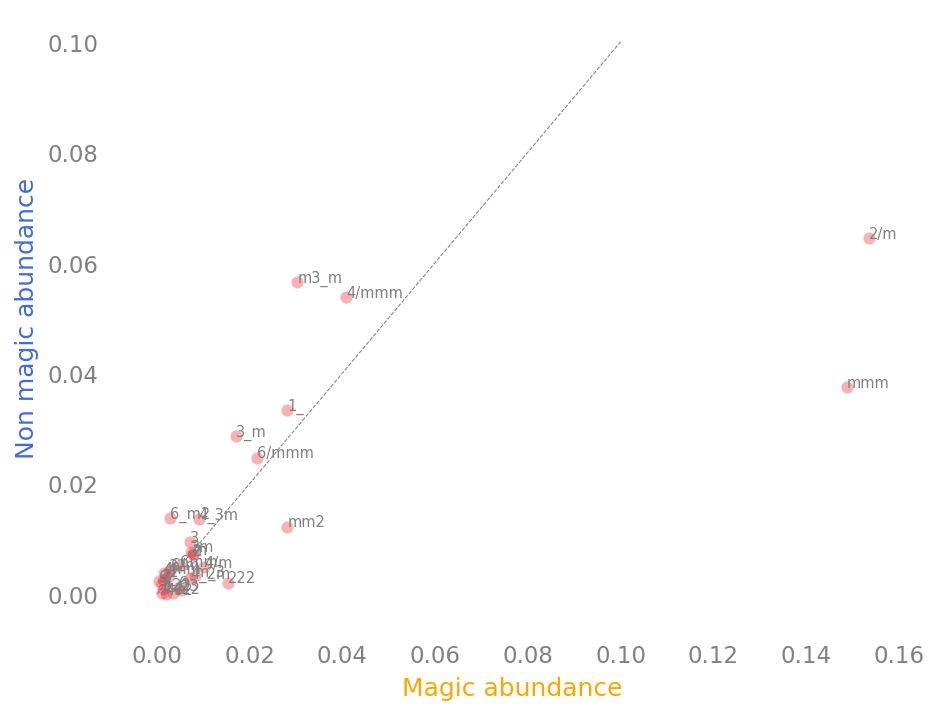

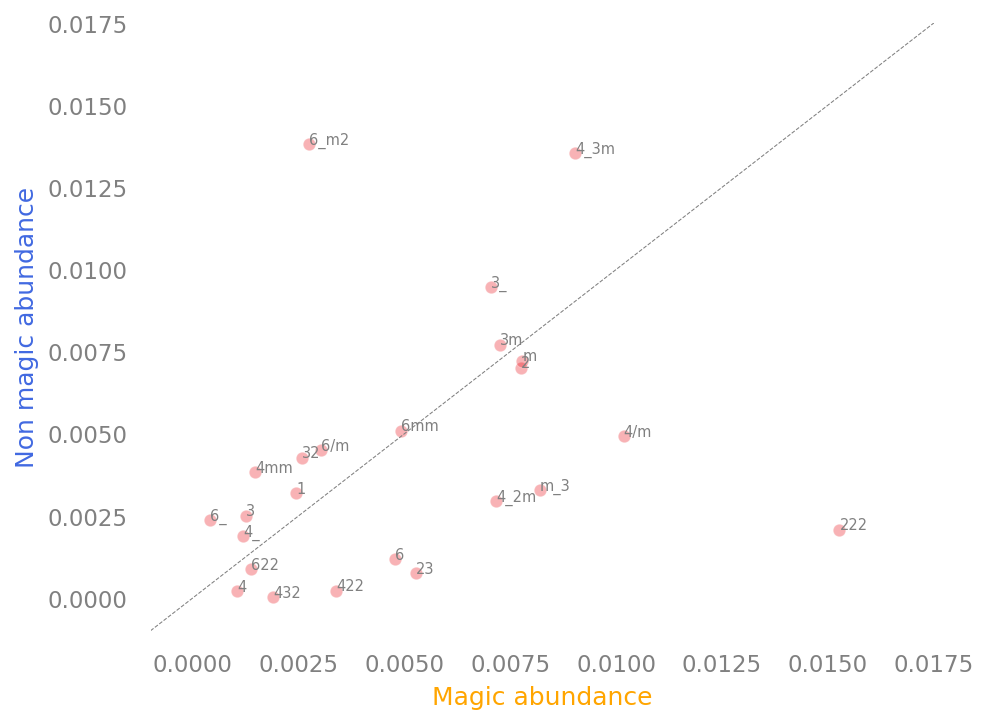

In [137]:
height=([h.get_height() for h in g.patches])

pg_m=height[0:int(len(height)/2)]
pg_nm=height[int(len(height)/2):int(len(height))]
pg_list=(df['point_group'].unique())
dict={'m_abd':pg_m, 'nm_abd':pg_nm, 'pg_list':pg_list}
pg= pd.DataFrame(dict)
print(sum(pg_m), sum(pg_nm), pg_list)
f, ax = plt.subplots(figsize=(6,5))
sns.despine(left=True, bottom=True)
plt.plot([0,0.10], [0,0.10], linestyle='--',lw=0.5, c='grey')
sns.scatterplot(data=pg, x="m_abd", y="nm_abd",alpha=0.3, color='r')
plt.xticks(c='grey')
plt.yticks(c='grey')
for i in range(len(pg_list)):
    plt.annotate(pg_list[i], (pg_m[i], pg_nm[i]), size=7, color='grey')
plt.ylabel('Non magic abundance', c='royalblue')
plt.xlabel('Magic abundance', c='orange')

# SMALLER
f, ax = plt.subplots(figsize=(6,5))
sns.despine(left=True, bottom=True)
plt.plot([-0.001,0.1], [-0.001,0.1], linestyle='--',lw=0.5, c='grey')
sns.scatterplot(data=pg, x="m_abd", y="nm_abd",alpha=0.3, color='r')
plt.xticks(c='grey')
plt.yticks(c='grey')
for i in range(len(pg_list)):
    plt.annotate(pg_list[i], (pg_m[i], pg_nm[i]), size=7, color='grey')
plt.ylabel('Non magic abundance', c='royalblue')
plt.xlabel('Magic abundance', c='orange')
plt.xlim(-0.001,0.0175)
plt.ylim(-0.001,0.0175)

In [129]:
# pg_listm=(m['point_group'].unique())
# pg_listnm=(nm['point_group'].unique())
pg_list_order=['1', '1_','2','m','2/m', 
               'mm2','222',  'mmm',
               '4', '4_',  '4_2m','4mm', '422', '4/m','4/mmm',
               '3', '3m', '3_','32', '3_m','6', '6_',
                '6_m2',  '6/m','622','6mm',  '6/mmm', 
                '23',   '4_3m', '432', 'm_3', 'm3_m']

"""Using function in modules.ipynb to produce inherited symmetry - problem with 432 group """

inh_symm_m=inh_symm(m['point_group'])
inh_symm_whole=inh_symm(df['point_group'])
inh_symm_nm=inh_symm(nm['point_group'])

inh_symm_m=inh_symm_m.reindex(pg_list_order)
inh_symm_nm=inh_symm_nm.reindex(pg_list_order)
inh_symm_whole=inh_symm_whole.reindex(pg_list_order)

# print(inh_symm_whole, inh_symm_m, inh_symm_nm)

inh_symm_m=inh_symm_m/inh_symm_m['1']
inh_symm_nm=inh_symm_nm/inh_symm_nm['1']



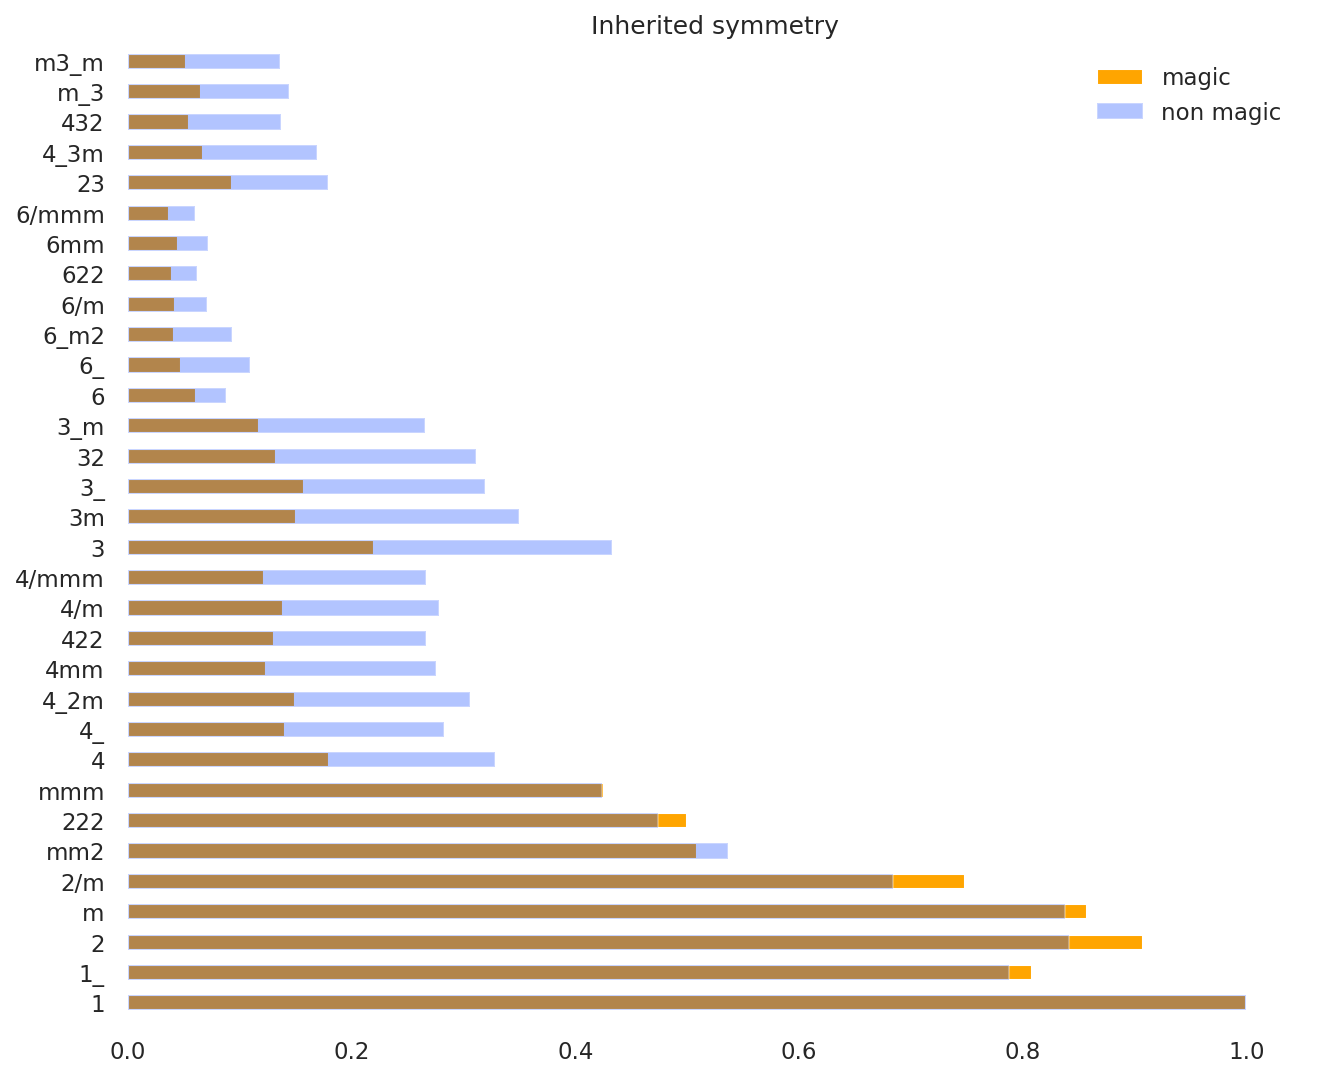

In [130]:
sns.set(style="white", palette="bright", color_codes=True)
f, ax = plt.subplots(figsize=(9, 8))
sns.despine(left=True, bottom=True)
inh_symm_m.plot(kind='barh', title='Inherited symmetry', color='orange', label='magic')
inh_symm_nm.plot(kind='barh', color='b', alpha=0.3, label='non magic')
plt.legend()

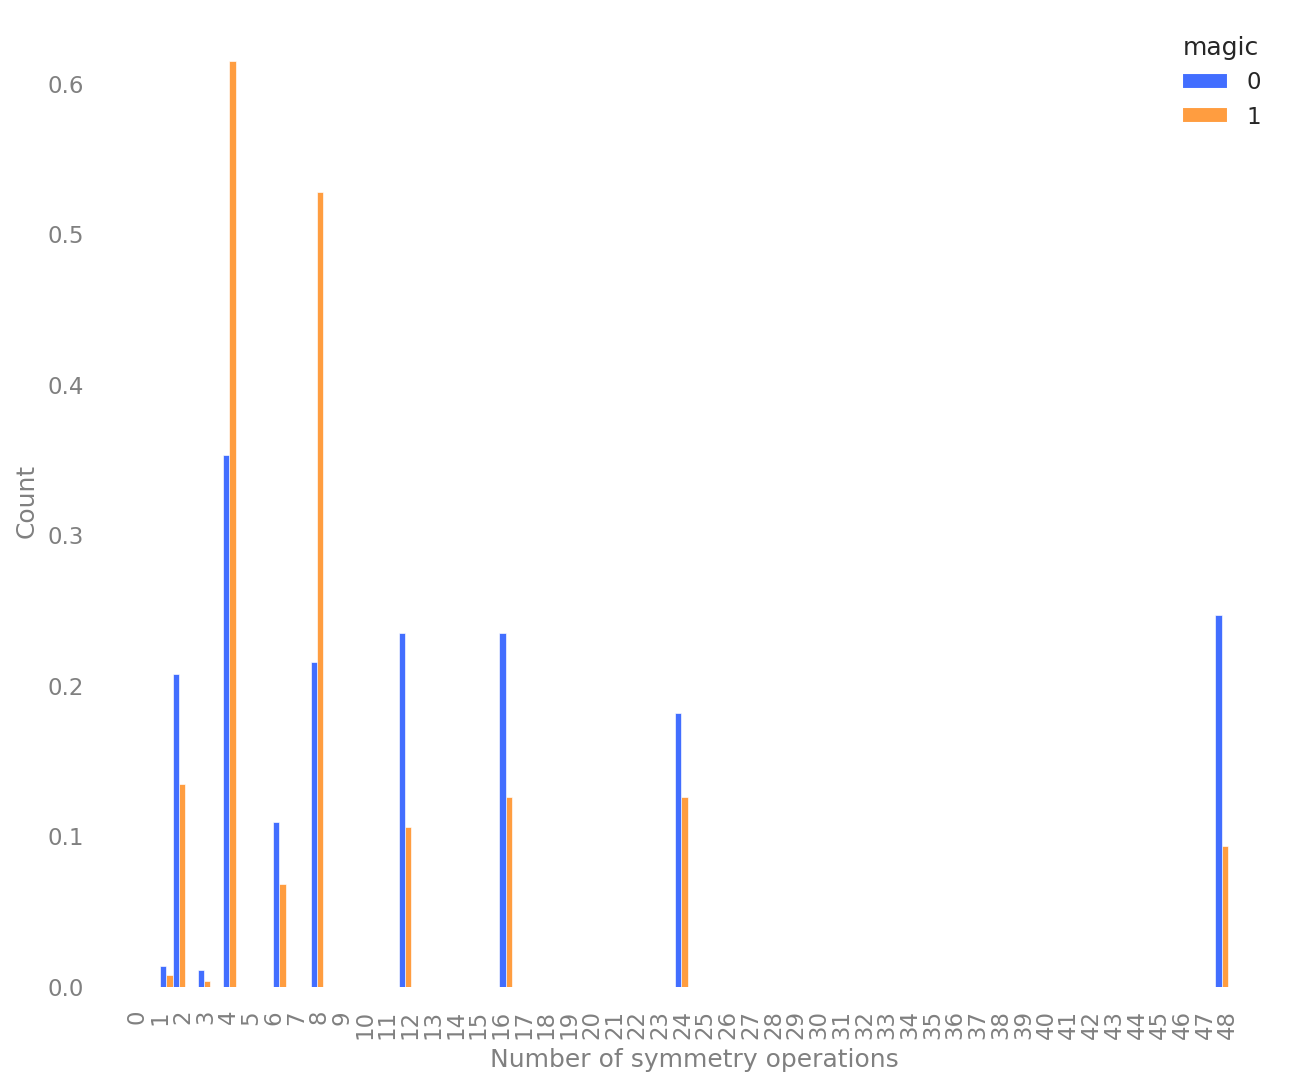

In [131]:
c

In [160]:
select=1000
qb_red=random.sample(qb.all(), select)

In [133]:
from pymatgen.analysis.local_env import NearNeighbors, VoronoiNN
from pymatgen.entries.computed_entries import ComputedStructureEntry as CSE
# from pymatgen.entries.computed_entries.ComputedStructureEntry import Slab
areas=[]
volumes=[]
natoms=[]
error=0
for [structure_data] in qb_red:
#     ar=CSE.SlabEntry(frame).get_unit_primitive_area()
    try:
        vor=VoronoiNN(tol=0, targets=None, cutoff=13.0, 
                      allow_pathological=True).get_all_voronoi_polyhedra(frame)
    except:
        error+=1
        pass
    natom = len(structure_data.get_site_kindnames())
    frame=structure_data.get_pymatgen()
    print(frame)
    natoms.append(natom)
    vol=frame.volume
    volumes.append(vol)
    areas.append(vor)


Full Formula (Sr4 Si4 Pt4)
Reduced Formula: SrSiPt
abc   :   6.485000   6.485000   6.485000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Sr    0.4299  0.9299  0.5701
  1  Sr    0.9299  0.5701  0.4299
  2  Sr    0.5701  0.4299  0.9299
  3  Sr    0.0701  0.0701  0.0701
  4  Si    0.8465  0.3465  0.1535
  5  Si    0.3465  0.1535  0.8465
  6  Si    0.1535  0.8465  0.3465
  7  Si    0.6535  0.6535  0.6535
  8  Pt    0.1665  0.6665  0.8335
  9  Pt    0.6665  0.8335  0.1665
 10  Pt    0.8335  0.1665  0.6665
 11  Pt    0.3335  0.3335  0.3335
Full Formula (Cu8 Rh2 S8)
Reduced Formula: Cu4RhS4
abc   :   6.921161   6.921161   6.921161
angles:  60.000000  60.000000  60.000000
Sites (18)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Cu    -0.125   0.875   0.375
  1  Cu     0.875  -0.625   0.875
  2  Cu     0.375   0.375   0.375
  3  Cu    -0.125   0.375   0.375
  4  Cu    -0.625   0.875   0.87

Full Formula (Er4 V4 O8)
Reduced Formula: ErVO2
abc   :   6.599744   6.599744   6.599744
angles: 135.452793 135.452793  64.827470
Sites (16)
  #  SP         a       b      c
---  ----  ------  ------  -----
  0  Er    0.375   0.625   0.75
  1  Er    0.875   0.625   1.25
  2  Er    0.375   1.125   0.75
  3  Er    0.375   0.625   0.25
  4  V     0.875   0.125   0.75
  5  V     0.375   0.125   0.25
  6  V     0.875   0.625   0.75
  7  V     0.875   1.125   1.25
  8  O     0.2104  1.0594  0.859
  9  O     0.5496  0.8986  1.359
 10  O     0.9406  0.7996  1.151
 11  O     1.1014  0.4604  0.651
 12  O     1.2004  0.3514  1.141
 13  O     0.5396  0.1906  0.641
 14  O     0.6486  0.7896  0.849
 15  O     0.8094  1.4504  1.349
Full Formula (Li12 Ga4 Si4 O20)
Reduced Formula: Li3GaSiO5
abc   :   5.398000  15.633000   4.845000
angles:  90.000000  90.000000  90.000000
Sites (40)
  #  SP         a       b      c
---  ----  ------  ------  -----
  0  Li    0.343   0.5045  0.5
  1  Li    0.843   0.995

Full Formula (Cs4 Tm8 Cl28)
Reduced Formula: CsTm2Cl7
abc   :  13.377000   6.906000  12.524000
angles:  90.000000  90.000000  90.000000
Sites (40)
  #  SP         a      b       c
---  ----  ------  -----  ------
  0  Cs    0.4575  0.75   0.305
  1  Cs    0.9575  0.75   0.195
  2  Cs    0.5425  0.25   0.695
  3  Cs    0.0425  0.25   0.805
  4  Tm    0.2652  0.75   0.9611
  5  Tm    0.7652  0.75   0.5389
  6  Tm    0.7348  0.25   0.0389
  7  Tm    0.2348  0.25   0.4611
  8  Tm    0.2502  0.75   0.6586
  9  Tm    0.7502  0.75   0.8414
 10  Tm    0.7498  0.25   0.3414
 11  Tm    0.2498  0.25   0.1586
 12  Cl    0.3813  0.989  0.0761
 13  Cl    0.3813  0.511  0.0761
 14  Cl    0.8813  0.989  0.4239
 15  Cl    0.8813  0.511  0.4239
 16  Cl    0.6187  0.489  0.9239
 17  Cl    0.6187  0.011  0.9239
 18  Cl    0.1187  0.489  0.5761
 19  Cl    0.1187  0.011  0.5761
 20  Cl    0.3716  0.991  0.5373
 21  Cl    0.3716  0.509  0.5373
 22  Cl    0.8716  0.991  0.9627
 23  Cl    0.8716  0.509  0.9627

Full Formula (Al8 C3 N4)
Reduced Formula: Al8C3N4
abc   :  18.453359  18.453359  18.453359
angles:   9.982445   9.982445   9.982445
Sites (15)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Al    0.9366  0.9366  0.9366
  1  Al    1.0634  1.0634  0.0634
  2  Al    0.8514  0.8514  0.8514
  3  Al    1.1486  1.1486  0.1486
  4  Al    0.7742  0.7742  0.7742
  5  Al    1.2258  1.2258  0.2258
  6  Al    0.6851  0.6851  0.6851
  7  Al    1.3149  1.3149  0.3149
  8  C     0.8107  0.8107  0.8107
  9  C     1.1893  1.1893  0.1893
 10  C     0       0       0
 11  N     0.9036  0.9036  0.9036
 12  N     1.0964  1.0964  0.0964
 13  N     0.7212  0.7212  0.7212
 14  N     1.2788  1.2788  0.2788
Full Formula (Sm12 Os5 C15)
Reduced Formula: Sm12(OsC3)5
abc   :  10.816000  10.816000   5.180000
angles:  90.000000  90.000000 120.000000
Sites (32)
  #  SP            a         b    c
---  ----  ---------  --------  ---
  0  Sm     0.1865    0.7284    0
  1  Sm     0.7284    0.1865

Full Formula (Na8 P4 N2 O32)
Reduced Formula: Na4P2NO16
abc   :   9.206381   9.206381  14.752000
angles:  71.202570 108.797430 135.949935
Sites (46)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Na    0.4521  -0.0689  0.8929
  1  Na    1.0689  -0.4521  0.3929
  2  Na    0.9311   0.4521  0.6071
  3  Na    1.5479   0.0689  0.1071
  4  Na    0.5253   0.2953  0.7033
  5  Na    0.7047  -0.5253  0.2033
  6  Na    1.2953   0.5253  0.7967
  7  Na    1.4747  -0.2953  0.2967
  8  P     1.6638  -0.2014  0.652
  9  P     1.2014  -0.6638  0.152
 10  P     0.7986   0.6638  0.848
 11  P     0.3362   0.2014  0.348
 12  N     0.8379   0.8379  0.75
 13  N     0.1621   0.1621  0.25
 14  O     1.5281  -0.4221  0.6293
 15  O     1.4221  -0.5281  0.1293
 16  O     0.5779   0.5281  0.8707
 17  O     0.4719   0.4221  0.3707
 18  O     1.8029  -0.0283  0.5751
 19  O     1.0283  -0.8029  0.0751
 20  O     0.9717   0.8029  0.9249
 21  O     0.1971   0.0283  0.4249
 22  O     1.8019  

Full Formula (Yb1 Bi2 I1 O4)
Reduced Formula: YbBi2IO4
abc   :   3.875000   3.875000   9.548000
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP      a    b       c
---  ----  ---  ---  ------
  0  Yb    0    0    0
  1  Bi    0.5  0.5  0.7429
  2  Bi    0.5  0.5  0.2571
  3  I     0    0    0.5
  4  O     0    0.5  0.862
  5  O     0    0.5  0.138
  6  O     0.5  0    0.862
  7  O     0.5  0    0.138
Full Formula (Y2 Ni2 B2 C2)
Reduced Formula: YNiBC
abc   :   3.566000   3.566000   7.562500
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP      a    b      c
---  ----  ---  ---  -----
  0  Y     0.5  0    0.664
  1  Y     0    0.5  0.336
  2  Ni    0    0    0
  3  Ni    0.5  0.5  0
  4  B     0.5  0    0.28
  5  B     0    0.5  0.72
  6  C     0.5  0    0.164
  7  C     0    0.5  0.836
Full Formula (In16 Te8)
Reduced Formula: In2Te
abc   :  12.620000  15.350000   4.460000
angles:  90.000000  90.000000  90.000000
Sites (24)
  #  SP        a      b    c
---  ----  --

Full Formula (Li4 Ge4 O10)
Reduced Formula: Li2Ge2O5
abc   :   8.164193   8.164193   4.970000
angles:  90.000000  90.000000  43.042442
Sites (18)
  #  SP         a        b      c
---  ----  ------  -------  -----
  0  Li    0.946   -0.058   0.145
  1  Li    0.058    0.054   0.645
  2  Li    0.626    0.262   0.645
  3  Li    0.738   -0.626   0.145
  4  Ge    0.647   -0.353   0.5
  5  Ge    0.353    0.353   0
  6  Ge    1.04    -0.334   0.5
  7  Ge    0.334   -0.04    0
  8  O     0.9325  -0.0655  0.553
  9  O     1.0655  -0.9325  0.053
 10  O     0.856   -0.356   0.57
 11  O     0.356    0.144   0.07
 12  O     0.7515  -0.6185  0.553
 13  O     0.6185   0.2485  0.053
 14  O     1.102   -0.382   0.157
 15  O     0.382   -0.102   0.657
 16  O     1.302   -0.582   0.657
 17  O     0.582   -0.302   0.157
Full Formula (Rb4 Be4 Co2 O12 F16)
Reduced Formula: Rb2Be2Co(O3F4)2
abc   :   6.168000  12.316000   9.135000
angles:  90.000000 105.202000  90.000000
Sites (38)
  #  SP         a       b  

Full Formula (Tl2 P2 C8 S8 N16 O8)
Reduced Formula: TlPC4S4(N2O)4
abc   :  10.624142  10.624142   8.270000
angles:  90.000000  90.000000  92.898502
Sites (44)
  #  SP          a       b       c
---  ----  -------  ------  ------
  0  Tl    -0.5     0.5     0.25
  1  Tl    -0.5     0.5     0.75
  2  P     -0       1       0
  3  P     -0       1       0.5
  4  C      0.5927  1.1697  0
  5  C      0.1697  1.5927  0.5
  6  C     -0.1697  0.4073  0.5
  7  C     -0.5927  0.8303  0
  8  C      0.1685  1.3885  0
  9  C      0.3885  1.1685  0.5
 10  C     -0.3885  0.8315  0.5
 11  C     -0.1685  0.6115  0
 12  S     -0.4543  0.7535  0
 13  S     -0.2465  0.5457  0.5
 14  S      0.2465  1.4543  0.5
 15  S      0.4543  1.2465  0
 16  S      0.2455  1.5395  0
 17  S      0.5395  1.2455  0.5
 18  S     -0.5395  0.7545  0.5
 19  S     -0.2455  0.4605  0
 20  N      0.6494  1.1412  0.1353
 21  N      0.6494  1.1412  0.8647
 22  N      0.1412  1.6494  0.6353
 23  N      0.1412  1.6494  0.3647
 24  N 

Full Formula (Er2 Al8 Ni2)
Reduced Formula: ErAl4Ni
abc   :   7.806413   7.806413   6.630000
angles:  90.000000  90.000000 149.976419
Sites (12)
  #  SP         a      b      c
---  ----  ------  -----  -----
  0  Er    -0.621  0.621  0.25
  1  Er    -0.379  1.379  0.75
  2  Al    -0.443  1.443  0.25
  3  Al    -0.557  0.557  0.75
  4  Al     0      0      0.5
  5  Al     0      0      0
  6  Al    -0.814  0.814  0.446
  7  Al    -0.814  0.814  0.054
  8  Al    -0.186  1.186  0.946
  9  Al    -0.186  1.186  0.554
 10  Ni    -0.271  1.271  0.25
 11  Ni    -0.729  0.729  0.75
Full Formula (Tm3 Sn3 Pt3)
Reduced Formula: TmSnPt
abc   :   7.404000   7.404000   3.923000
angles:  90.000000  90.000000 120.000000
Sites (9)
  #  SP            a         b    c
---  ----  ---------  --------  ---
  0  Tm     0.4075    0.4075    0
  1  Tm    -0         0.5925    0
  2  Tm     0.5925    0         0
  3  Sn     0.7495    0.7495    0.5
  4  Sn    -0         0.2505    0.5
  5  Sn     0.2505    0       

Full Formula (Tb2 Ag2 Te4)
Reduced Formula: TbAgTe2
abc   :   7.140000   7.140000   4.609300
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Tb    0       0.5     0.7977
  1  Tb    0.5     0       0.2023
  2  Ag    0.5     0.5     0
  3  Ag    0       0       0
  4  Te    0.2969  0.7969  0.7136
  5  Te    0.2031  0.2969  0.2864
  6  Te    0.7031  0.2031  0.7136
  7  Te    0.7969  0.7031  0.2864
Full Formula (Nd2 Sb2 Pt2)
Reduced Formula: NdSbPt
abc   :   4.534000   4.534000   7.866000
angles:  90.000000  90.000000 120.000000
Sites (6)
  #  SP           a         b       c
---  ----  --------  --------  ------
  0  Nd    0         0         0
  1  Nd    0         0         0.5
  2  Sb    0.333333  0.666667  0.2635
  3  Sb    0.666667  0.333333  0.7635
  4  Pt    0.333333  0.666667  0.7137
  5  Pt    0.666667  0.333333  0.2137
Full Formula (Cs1 Fe1 F3)
Reduced Formula: CsFeF3
abc   :   4.330000   4.330000   4.330

Full Formula (Cd12 I24)
Reduced Formula: CdI2
abc   :   4.240000   4.240000  82.008000
angles:  90.000000  90.000000 120.000000
Sites (36)
  #  SP           a         b       c
---  ----  --------  --------  ------
  0  Cd    0         0         0.0208
  1  Cd    0         0         0.1875
  2  Cd    0         0         0.3542
  3  Cd    0         0         0.5208
  4  Cd    0         0         0.6875
  5  Cd    0         0         0.8542
  6  Cd    0.666667  0.333333  0.1042
  7  Cd    0.666667  0.333333  0.2708
  8  Cd    0.666667  0.333333  0.4375
  9  Cd    0.666667  0.333333  0.7708
 10  Cd    0.333333  0.666667  0.6042
 11  Cd    0.333333  0.666667  0.9375
 12  I     0         0         0.125
 13  I     0         0         0.2917
 14  I     0         0         0.4583
 15  I     0         0         0.5833
 16  I     0         0         0.7917
 17  I     0         0         0.9167
 18  I     0.666667  0.333333  0.0417
 19  I     0.666667  0.333333  0.2083
 20  I     0.666667  0.333

Full Formula (Yb4 Al4 Pd4)
Reduced Formula: YbAlPd
abc   :   6.819000   4.350000   7.801000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP         a     b       c
---  ----  ------  ----  ------
  0  Yb    0.9693  0.75  0.6789
  1  Yb    0.4693  0.75  0.8211
  2  Yb    0.0307  0.25  0.3211
  3  Yb    0.5307  0.25  0.1789
  4  Al    0.8599  0.75  0.0599
  5  Al    0.3599  0.75  0.4401
  6  Al    0.1401  0.25  0.9401
  7  Al    0.6401  0.25  0.5599
  8  Pd    0.7284  0.75  0.3782
  9  Pd    0.2284  0.75  0.1218
 10  Pd    0.2716  0.25  0.6218
 11  Pd    0.7716  0.25  0.8782
Full Formula (Mn1 Sn1 B2 O6)
Reduced Formula: MnSn(BO3)2
abc   :   5.822839   5.822839   5.822839
angles:  48.477346  48.477346  48.477346
Sites (10)
  #  SP         a        b        c
---  ----  ------  -------  -------
  0  Mn    0        0        0
  1  Sn    0.5      0.5     -0.5
  2  B     0.2444   0.2444   0.2444
  3  B     0.7556  -0.2444  -0.2444
  4  O     0.2608   0.9498  -0.4747
  5  O     0.4

Full Formula (Tb4 P4 O16)
Reduced Formula: TbPO4
abc   :   4.621000   6.355000   6.384000
angles:  90.000000  90.000000  90.000000
Sites (24)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Tb    0.472  0.308  0.75
  1  Tb    0.528  0.692  0.25
  2  Tb    0.472  0.192  0.25
  3  Tb    0.528  0.808  0.75
  4  P     0      0.5    0.5
  5  P     0      0.5    0
  6  P     0      0      0.5
  7  P     0      0      0
  8  O     0.698  0.081  0.565
  9  O     0.302  0.919  0.065
 10  O     0.698  0.419  0.435
 11  O     0.302  0.581  0.935
 12  O     0.302  0.919  0.435
 13  O     0.698  0.081  0.935
 14  O     0.302  0.581  0.565
 15  O     0.698  0.419  0.065
 16  O     0.14   0.25   0.5
 17  O     0.86   0.75   0
 18  O     0.86   0.75   0.5
 19  O     0.14   0.25   0
 20  O     0.885  0.477  0.75
 21  O     0.115  0.523  0.25
 22  O     0.885  0.023  0.25
 23  O     0.115  0.977  0.75
Full Formula (Be12 Si4 O24)
Reduced Formula: Be3SiO6
abc   :   5.082000   4.640000  

Full Formula (Na2 Se4 O12)
Reduced Formula: Na(SeO3)2
abc   :   5.784000   4.388000  11.746000
angles:  90.000000 118.343000  90.000000
Sites (18)
  #  SP          a       b       c
---  ----  -------  ------  ------
  0  Na    -0       0.5     0.5
  1  Na     0       0       0
  2  Se     0.6625  0.3852  0.169
  3  Se     0.6625  0.1148  0.669
  4  Se     0.3375  0.8852  0.331
  5  Se     0.3375  0.6148  0.831
  6  O      0.8691  0.2091  0.3075
  7  O      0.8691  0.2909  0.8075
  8  O      0.1309  0.7091  0.1925
  9  O      0.1309  0.7909  0.6925
 10  O      0.6784  0.1908  0.0511
 11  O      0.6784  0.3092  0.5511
 12  O      0.3216  0.6908  0.4489
 13  O      0.3216  0.8092  0.9489
 14  O      0.3533  0.2941  0.144
 15  O      0.3533  0.2059  0.644
 16  O      0.6467  0.7941  0.356
 17  O      0.6467  0.7059  0.856
Full Formula (Gd4 Ni4 Pb4)
Reduced Formula: GdNiPb
abc   :   7.248100   4.542800   7.770100
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP         a     b  

Full Formula (Ta10 Ga6)
Reduced Formula: Ta5Ga3
abc   :   7.680000   7.680000   5.300000
angles:  90.000000  90.000000 120.000000
Sites (16)
  #  SP            a         b     c
---  ----  ---------  --------  ----
  0  Ta     0.764     0.764     0.25
  1  Ta     0.764     0         0.75
  2  Ta     0         0.764     0.75
  3  Ta     0         0.236     0.25
  4  Ta     0.236     0.236     0.75
  5  Ta     0.236     0         0.25
  6  Ta     0.333333  0.666667  0.5
  7  Ta     0.333333  0.666667  0
  8  Ta     0.666667  0.333333  0.5
  9  Ta     0.666667  0.333333  0
 10  Ga     0.4009    0.4009    0.25
 11  Ga     0.4009    0         0.75
 12  Ga    -0         0.4009    0.75
 13  Ga    -0         0.5991    0.25
 14  Ga     0.5991    0.5991    0.75
 15  Ga     0.5991    0         0.25
Full Formula (Dy1 Al1)
Reduced Formula: DyAl
abc   :   3.682600   3.682600   3.682600
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Dy    0  

Full Formula (Y3 Co9 H6)
Reduced Formula: YCo3H2
abc   :   9.047996   9.047996   9.047996
angles:  33.789776  33.789776  33.789776
Sites (18)
  #  SP         a       b        c
---  ----  ------  ------  -------
  0  Y     0.8601  0.8601   0.8601
  1  Y     1.1399  1.1399   0.1399
  2  Y     0       0        0
  3  Co    1.4287  1.4287  -0.0689
  4  Co    1.4287  0.9311   0.4287
  5  Co    1.0689  0.5713   0.5713
  6  Co    1.5713  0.0689   0.5713
  7  Co    1.5713  0.5713   0.0689
  8  Co    0.9311  1.4287   0.4287
  9  Co    0.6671  0.6671   0.6671
 10  Co    1.3329  1.3329   0.3329
 11  Co    1.5     0.5      0.5
 12  H     1.3723  0.3723   0.8558
 13  H     1.3723  0.8558   0.3723
 14  H     1.1442  0.6277   0.6277
 15  H     1.6277  0.1442   0.6277
 16  H     1.6277  0.6277   0.1442
 17  H     1.8558  0.3723   0.3723
Full Formula (Sb6 C6 N6 Cl24 O6)
Reduced Formula: SbCNCl4O
abc   :  11.670000  11.670000   9.950000
angles:  90.000000  90.000000 120.000000
Sites (48)
  #  SP       

Full Formula (Zn8 S8)
Reduced Formula: ZnS
abc   :  25.136940  25.136940  25.136940
angles:   8.715502   8.715502   8.715502
Sites (16)
  #  SP         a        b        c
---  ----  ------  -------  -------
  0  Zn    0.5417   0.5417  -0.4583
  1  Zn    0.4167   0.4167  -0.5833
  2  Zn    0.2917   0.2917   0.2917
  3  Zn    0        0        0
  4  Zn    0.9167  -0.0833  -0.0833
  5  Zn    0.7917  -0.2083  -0.2083
  6  Zn    0.1667   0.1667   0.1667
  7  Zn    0.7083  -0.2917  -0.2917
  8  S     0.1354   0.1354   0.1354
  9  S     0.6771  -0.3229  -0.3229
 10  S     0.5104   0.5104  -0.4896
 11  S     0.3854   0.3854  -0.6146
 12  S     0.2604   0.2604   0.2604
 13  S     0.9688  -0.0312  -0.0312
 14  S     0.8854  -0.1146  -0.1146
 15  S     0.7604  -0.2396  -0.2396
Full Formula (Na8 Lu4 C8 O24 F4)
Reduced Formula: Na2LuC2O6F
abc   :   9.283772   9.283772  11.285000
angles:  84.874033  95.125967 141.585924
Sites (48)
  #  SP           a          b        c
---  ----  --------  ------

Full Formula (In4 H36 S8 O48)
Reduced Formula: InH9(SO6)2
abc   :   9.997000  18.443000   5.477000
angles:  90.000000  90.000000  90.000000
Sites (96)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  In    0.5     0       0.5
  1  In    0.5     0.5     0.5
  2  In    0       0       0
  3  In    0       0.5     0
  4  H     0.43    0.402   0.859
  5  H     0.43    0.098   0.859
  6  H     0.93    0.402   0.641
  7  H     0.93    0.098   0.641
  8  H     0.57    0.902   0.141
  9  H     0.57    0.598   0.141
 10  H     0.07    0.902   0.359
 11  H     0.07    0.598   0.359
 12  H     0.406   0.902   0.172
 13  H     0.406   0.598   0.172
 14  H     0.906   0.902   0.328
 15  H     0.906   0.598   0.328
 16  H     0.594   0.402   0.828
 17  H     0.594   0.098   0.828
 18  H     0.094   0.402   0.672
 19  H     0.094   0.098   0.672
 20  H     0.172   0.793   0.992
 21  H     0.172   0.707   0.992
 22  H     0.672   0.793   0.508
 23  H     0.672   0.707   0.508
 

Full Formula (Ca4 Ta2 In2 O12)
Reduced Formula: Ca2TaInO6
abc   :   5.528800   5.708000   9.653300
angles:  90.000000 124.845000  90.000000
Sites (20)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Ca    0.7315  0.0578  0.2463
  1  Ca    0.7315  0.4422  0.7463
  2  Ca    0.2685  0.5578  0.2537
  3  Ca    0.2685  0.9422  0.7537
  4  Ta    0.5     0.5     0
  5  Ta    0.5     0       0.5
  6  In    0       0.5     0.5
  7  In    0       0       0
  8  O     0.8869  0.444   0.2707
  9  O     0.8869  0.056   0.7707
 10  O     0.1131  0.944   0.2293
 11  O     0.1131  0.556   0.7293
 12  O     0.7588  0.7837  0.4289
 13  O     0.7588  0.7163  0.9289
 14  O     0.2412  0.2837  0.0711
 15  O     0.2412  0.2163  0.5711
 16  O     0.6578  0.3239  0.4475
 17  O     0.6578  0.1761  0.9475
 18  O     0.3422  0.8239  0.0525
 19  O     0.3422  0.6761  0.5525
Full Formula (Pd4 N2)
Reduced Formula: Pd2N
abc   :   4.486900   4.863000   2.808000
angles:  90.000000  90.000000  9

Full Formula (Sc8 Ge16 Mo12)
Reduced Formula: Sc2Ge4Mo3
abc   :   6.691000  12.872000   6.905000
angles:  90.000000  90.000000  90.000000
Sites (36)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Sc    0.494  0.593  0.678
  1  Sc    0.994  0.907  0.822
  2  Sc    0.506  0.093  0.322
  3  Sc    0.006  0.407  0.178
  4  Sc    0.506  0.407  0.322
  5  Sc    0.006  0.093  0.178
  6  Sc    0.494  0.907  0.678
  7  Sc    0.994  0.593  0.822
  8  Ge    0.673  0.457  0.957
  9  Ge    0.173  0.043  0.543
 10  Ge    0.327  0.957  0.043
 11  Ge    0.827  0.543  0.457
 12  Ge    0.327  0.543  0.043
 13  Ge    0.827  0.957  0.457
 14  Ge    0.673  0.043  0.957
 15  Ge    0.173  0.457  0.543
 16  Ge    0.46   0.75   0.374
 17  Ge    0.96   0.75   0.126
 18  Ge    0.54   0.25   0.626
 19  Ge    0.04   0.25   0.874
 20  Ge    0.693  0.75   0.863
 21  Ge    0.193  0.75   0.637
 22  Ge    0.307  0.25   0.137
 23  Ge    0.807  0.25   0.363
 24  Mo    0.66   0.625  0.168
 25  Mo    0.1

Full Formula (Fe2 Cu8 P4 O21)
Reduced Formula: Fe2Cu8P4O21
abc   :   8.521665   8.521665   9.553000
angles:  67.813305 112.186695 139.178681
Sites (35)
  #  SP          a        b       c
---  ----  -------  -------  ------
  0  Fe     0.5      0       0.5
  1  Fe     1        0.5     0.5
  2  Cu     0.3607   0.1275  0.9509
  3  Cu     0.8725   0.6393  0.9509
  4  Cu     1.1275   0.3607  0.0491
  5  Cu     0.6393  -0.1275  0.0491
  6  Cu     0.967    0.033   0.6857
  7  Cu     0.033   -0.033   0.3143
  8  Cu     0.8677   0.1323  0.3641
  9  Cu     0.1323  -0.1323  0.6359
 10  P      0.7296   0.2704  0.7785
 11  P      0.2704  -0.2704  0.2215
 12  P      0.4177  -0.4177  0.7876
 13  P      0.5823   0.4177  0.2124
 14  O      0.6881  -0.2625  0.8093
 15  O      1.2625   0.3119  0.8093
 16  O      0.7375   0.6881  0.1907
 17  O      0.3119   0.2625  0.1907
 18  O      0.5018   0.0748  0.6798
 19  O      0.9252   0.4982  0.6798
 20  O      1.0748   0.5018  0.3202
 21  O      0.4982  -0.074

Full Formula (Lu4 Mn2 In1 Ge4)
Reduced Formula: Lu4Mn2InGe4
abc   :   8.054382   8.054382   6.959000
angles:  74.565679 105.434321 150.502374
Sites (11)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Lu    0.6554  -0.6554  0.9371
  1  Lu    1.3446  -0.3446  0.0629
  2  Lu    1.4086  -0.4086  0.61
  3  Lu    0.5914  -0.5914  0.39
  4  Mn    0.783   -0.783   0.3573
  5  Mn    1.217   -0.217   0.6427
  6  In    0        0       0
  7  Ge    0.9355  -0.9355  0.338
  8  Ge    1.0645  -0.0645  0.662
  9  Ge    0.7974  -0.7974  0.7317
 10  Ge    1.2026  -0.2026  0.2683
Full Formula (Pt4 Rh4 Br16 N20 Cl4)
Reduced Formula: PtRhBr4N5Cl
abc   :  17.072000   8.346000   9.531000
angles:  90.000000  90.000000  90.000000
Sites (48)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Pt    0.343   0.75    0.1554
  1  Pt    0.843   0.75    0.3446
  2  Pt    0.657   0.25    0.8446
  3  Pt    0.157   0.25    0.6554
  4  Rh    0.4029  0.75    0.6371
  5  Rh

Full Formula (Na2 B2 H24 N8)
Reduced Formula: NaB(H3N)4
abc   :   6.687818   6.687818   8.459200
angles:  85.153132  94.846868  57.743159
Sites (36)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Na    0.7355   0.1093  0.8575
  1  Na    0.8907  -0.7355  0.3575
  2  B     0.315    0.1794  0.571
  3  B     0.8206  -0.315   0.071
  4  H     1.0313  -0.0709  0.7154
  5  H     0.0709  -0.0313  0.2154
  6  H     0.8828  -0.3168  0.9431
  7  H     0.3168   0.1172  0.4431
  8  H     0.8982  -0.5166  0.1273
  9  H     0.5166   0.1018  0.6273
 10  H     1.1955  -0.2271  0.6659
 11  H     0.2271  -0.1955  0.1659
 12  H     0.8336  -0.5964  0.7207
 13  H     0.5964   0.1664  0.2207
 14  H     1.0335  -0.7501  0.0136
 15  H     0.7501  -0.0335  0.5136
 16  H     1.2062  -0.6088  0.5636
 17  H     0.6088  -0.2062  0.0636
 18  H     1.4544  -0.5068  0.952
 19  H     0.5068  -0.4544  0.452
 20  H     1.3823  -0.6047  0.2398
 21  H     0.6047  -0.3823  0.7398
 22  H     0.37

Full Formula (Ce1 Ag2 Ge2)
Reduced Formula: Ce(AgGe)2
abc   :   6.275755   6.275755   6.275755
angles: 139.930712 139.930712  57.958517
Sites (5)
  #  SP        a      b    c
---  ----  -----  -----  ---
  0  Ce    0      0      0
  1  Ag    0.25   0.75   0.5
  2  Ag    0.75   0.25   0.5
  3  Ge    0.613  0.613  1
  4  Ge    0.387  0.387  0
Full Formula (Sr4 C16 S8 N8 O20)
Reduced Formula: SrC4S2N2O5
abc   :   9.201000   9.990000  14.605000
angles:  90.000000 122.300000  90.000000
Sites (56)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Sr    0.2592  0.4841  0.0905
  1  Sr    0.2592  0.0159  0.5905
  2  Sr    0.7408  0.9841  0.4095
  3  Sr    0.7408  0.5159  0.9095
  4  C     0.0334  0.818   0.0812
  5  C     0.0334  0.682   0.5812
  6  C     0.9666  0.318   0.4188
  7  C     0.9666  0.182   0.9188
  8  C     0.0575  0.5234  0.3708
  9  C     0.0575  0.9766  0.8708
 10  C     0.9425  0.0234  0.1292
 11  C     0.9425  0.4766  0.6292
 12  C     0.0711  0.9343  

Full Formula (Cs2 Ho2 Mo4 O16)
Reduced Formula: CsHo(MoO4)2
abc   :   5.050000   9.510000   7.950000
angles:  90.000000  90.000000  90.000000
Sites (24)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Cs    0       0.5     0.75
  1  Cs    0       0.5     0.25
  2  Ho    0       0       0.75
  3  Ho    0       0       0.25
  4  Mo    0.4816  0.7996  0
  5  Mo    0.4816  0.2004  0.5
  6  Mo    0.5184  0.7996  0.5
  7  Mo    0.5184  0.2004  0
  8  O     0.7383  0.8057  0.6714
  9  O     0.7383  0.8057  0.3286
 10  O     0.7383  0.1943  0.1714
 11  O     0.7383  0.1943  0.8286
 12  O     0.2617  0.8057  0.1714
 13  O     0.2617  0.8057  0.8286
 14  O     0.2617  0.1943  0.6714
 15  O     0.2617  0.1943  0.3286
 16  O     0.742   0.9303  0
 17  O     0.742   0.0697  0.5
 18  O     0.258   0.9303  0.5
 19  O     0.258   0.0697  0
 20  O     0.6348  0.6307  0
 21  O     0.6348  0.3693  0.5
 22  O     0.3652  0.6307  0.5
 23  O     0.3652  0.3693  0
Full Formula (Mn48 

Full Formula (Pt1 N1)
Reduced Formula: PtN
abc   :   3.145777   3.145777   3.145777
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a    b    c
---  ----  ----  ---  ---
  0  Pt     0    0    0
  1  N     -0.5  0.5  0.5
Full Formula (Dy10 Sn6)
Reduced Formula: Dy5Sn3
abc   :   8.873000   8.873000   6.455000
angles:  90.000000  90.000000 120.000000
Sites (16)
  #  SP            a         b     c
---  ----  ---------  --------  ----
  0  Dy     0.764     0.764     0.25
  1  Dy     0.764     0         0.75
  2  Dy    -0         0.764     0.75
  3  Dy    -0         0.236     0.25
  4  Dy     0.236     0.236     0.75
  5  Dy     0.236     0         0.25
  6  Dy     0.333333  0.666667  0.5
  7  Dy     0.333333  0.666667  0
  8  Dy     0.666667  0.333333  0.5
  9  Dy     0.666667  0.333333  0
 10  Sn     0.4009    0.4009    0.25
 11  Sn     0.4009    0         0.75
 12  Sn     0         0.4009    0.75
 13  Sn     0         0.5991    0.25
 14  Sn     0.5991    0.5991    0.75
 

Full Formula (Na12 P12 O48)
Reduced Formula: NaPO4
abc   :  10.929639  10.929639  10.480000
angles:  90.000000  90.000000  63.977426
Sites (72)
  #  SP          a       b       c
---  ----  -------  ------  ------
  0  Na    -0.295   0.951   0.308
  1  Na     0.205   1.451   0.192
  2  Na    -0.049   0.705   0.692
  3  Na     0.451   1.205   0.808
  4  Na     0.049   1.295   0.308
  5  Na    -0.451   0.795   0.192
  6  Na     0.295   1.049   0.692
  7  Na    -0.205   0.549   0.808
  8  Na    -0.119   1.119   0.3162
  9  Na     0.381   0.619   0.1838
 10  Na     0.119   0.881   0.6838
 11  Na    -0.381   1.381   0.8162
 12  P      0.3893  0.7651  0.4792
 13  P     -0.1107  1.2651  0.0208
 14  P     -0.2349  1.3893  0.5208
 15  P      0.2651  0.8893  0.9792
 16  P      0.2349  0.6107  0.4792
 17  P     -0.2651  1.1107  0.0208
 18  P     -0.3893  1.2349  0.5208
 19  P      0.1107  0.7349  0.9792
 20  P      0.3169  1.3169  0.5
 21  P     -0.1831  0.8169  0
 22  P     -0.3169  0.6831  0.5


Full Formula (Eu2 P2 Au2)
Reduced Formula: EuPAu
abc   :   4.313000   4.313000   8.258000
angles:  90.000000  90.000000 120.000000
Sites (6)
  #  SP           a         b     c
---  ----  --------  --------  ----
  0  Eu    0         0         0.5
  1  Eu    0         0         0
  2  P     0.333333  0.666667  0.25
  3  P     0.666667  0.333333  0.75
  4  Au    0.333333  0.666667  0.75
  5  Au    0.666667  0.333333  0.25
Full Formula (Gd2 Al20 Ru4)
Reduced Formula: Gd(Al5Ru)2
abc   :   6.850748   6.850748   9.090000
angles:  90.000000  90.000000  96.360644
Sites (26)
  #  SP          a       b       c
---  ----  -------  ------  ------
  0  Gd     0.124   0.876   0.25
  1  Gd    -0.124   1.124   0.75
  2  Al     0.1339  0.4143  0.25
  3  Al    -0.5857  1.1339  0.75
  4  Al     0.5857  0.8661  0.25
  5  Al    -0.1339  1.5857  0.75
  6  Al    -0.2203  1.5247  0.25
  7  Al     0.5247  0.7797  0.75
  8  Al    -0.5247  1.2203  0.25
  9  Al     0.2203  0.4753  0.75
 10  Al     0.1559  0.8441

Full Formula (K2 Zn1 Ge1 O4)
Reduced Formula: K2ZnGeO4
abc   :   5.674807   5.674807   5.674807
angles: 120.000086 120.000086  89.999851
Sites (8)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  K     0.75    0.25    0.5
  1  K     0.5     0.5     1
  2  Zn    0       0       0
  3  Ge    0.25    0.75    0.5
  4  O     0.261   0.9094  0.8786
  5  O     1.0906  0.9692  1.3516
  6  O     1.0308  0.3824  1.1214
  7  O     0.6176  0.739   0.6484
Full Formula (Sm2 Mn1 Ga6)
Reduced Formula: Sm2MnGa6
abc   :   6.228904   6.228904   6.228904
angles:  60.000000  60.000000  60.000000
Sites (9)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  Sm     0.75     0.75    -0.25
  1  Sm     1.25     0.25     0.25
  2  Mn     0        0        0
  3  Ga    -0.7628   0.7628   0.7628
  4  Ga    -0.2372   0.2372   0.7628
  5  Ga     0.7628   0.7628  -0.7628
  6  Ga     0.2372   1.2372  -0.2372
  7  Ga     0.2372  -0.2372   1.2372
  8  Ga    -0.2372   0.

Full Formula (Ca1 Cd2 Au4)
Reduced Formula: Ca(CdAu2)2
abc   :   5.729112   5.729112   5.729112
angles: 103.330749 103.330749 122.605798
Sites (7)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Ca    0      0      0
  1  Cd    0.25   0.75   0.5
  2  Cd    0.75   1.25   0.5
  3  Au    0.696  0.696  0.392
  4  Au    1.304  0.696  1
  5  Au    0.696  0.304  1
  6  Au    0.304  0.304  0.608
Full Formula (Zr1 Te2)
Reduced Formula: ZrTe2
abc   :   3.952000   3.952000   6.660000
angles:  90.000000  90.000000 120.000000
Sites (3)
  #  SP           a         b     c
---  ----  --------  --------  ----
  0  Zr    0         0         0
  1  Te    0.333333  0.666667  0.25
  2  Te    0.666667  0.333333  0.75
Full Formula (Na4 Ca2 Zr4 Si20 O54)
Reduced Formula: Na2CaZr2Si10O27
abc   :   9.500511   9.500511  18.604000
angles:  82.096615  97.903385  66.117262
Sites (84)
  #  SP        a       b      c
---  ----  -----  ------  -----
  0  Na    1.954   0.03   0.337
  1  Na    0.97  

Full Formula (Tm8 B24 Os4)
Reduced Formula: Tm2B6Os
abc   :   9.067700  11.433600   3.603700
angles:  90.000000  90.000000  90.000000
Sites (36)
  #  SP        a      b    c
---  ----  -----  -----  ---
  0  Tm    0.177  0.913  0.5
  1  Tm    0.677  0.587  0.5
  2  Tm    0.823  0.087  0.5
  3  Tm    0.323  0.413  0.5
  4  Tm    0.055  0.631  0.5
  5  Tm    0.555  0.869  0.5
  6  Tm    0.945  0.369  0.5
  7  Tm    0.445  0.131  0.5
  8  B     0.45   0.56   0
  9  B     0.95   0.94   0
 10  B     0.55   0.44   0
 11  B     0.05   0.06   0
 12  B     0.39   0.97   0
 13  B     0.89   0.53   0
 14  B     0.61   0.03   0
 15  B     0.11   0.47   0
 16  B     0.36   0.81   0
 17  B     0.86   0.69   0
 18  B     0.64   0.19   0
 19  B     0.14   0.31   0
 20  B     0.25   0.575  0
 21  B     0.75   0.925  0
 22  B     0.75   0.425  0
 23  B     0.25   0.075  0
 24  B     0.2    0.74   0
 25  B     0.7    0.76   0
 26  B     0.8    0.26   0
 27  B     0.3    0.24   0
 28  B     0.02   0.79   

Full Formula (Rh2 Br6)
Reduced Formula: RhBr3
abc   :   6.265688   6.265688   6.350000
angles:  80.624964  99.375036  60.045532
Sites (8)
  #  SP        a       b      c
---  ----  -----  ------  -----
  0  Rh    0.833  -0.167  0
  1  Rh    1.167   0.167  0
  2  Br    0.423  -0.073  0.778
  3  Br    1.073   0.577  0.778
  4  Br    0.927  -0.577  0.222
  5  Br    1.577   0.073  0.222
  6  Br    0.771  -0.771  0.776
  7  Br    0.229  -0.229  0.224
Full Formula (Na4 Sb8 O8 F24)
Reduced Formula: NaSb2(OF3)2
abc   :   5.419000   9.621000  13.526000
angles:  90.000000  95.960000  90.000000
Sites (44)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Na    0.743   0.4413  0.4235
  1  Na    0.743   0.0587  0.9235
  2  Na    0.257   0.9413  0.0765
  3  Na    0.257   0.5587  0.5765
  4  Sb    0.88    0.2983  0.7064
  5  Sb    0.88    0.2017  0.2064
  6  Sb    0.12    0.7983  0.7936
  7  Sb    0.12    0.7017  0.2936
  8  Sb    0.7095  0.8338  0.5253
  9  Sb    0.7095  0.666

Full Formula (P8 N8 O24)
Reduced Formula: PNO3
abc   :   7.496666   7.496666  12.700000
angles:  90.000000  90.000000  92.161848
Sites (40)
  #  SP         a      b      c
---  ----  ------  -----  -----
  0  P     -0.464  1.464  0.35
  1  P      0.036  0.964  0.15
  2  P      0.464  0.536  0.65
  3  P     -0.036  1.036  0.85
  4  P      0.289  1.289  0.5
  5  P     -0.211  0.789  0
  6  P     -0.289  0.711  0.5
  7  P      0.211  1.211  0
  8  N     -0.319  1.319  0.044
  9  N      0.181  0.819  0.456
 10  N      0.319  0.681  0.956
 11  N     -0.181  1.181  0.544
 12  N     -0.478  0.978  0.25
 13  N      0.022  1.478  0.25
 14  N     -0.022  0.522  0.75
 15  N      0.478  1.022  0.75
 16  O      0.458  1.302  0.425
 17  O     -0.042  0.802  0.075
 18  O      0.302  1.458  0.575
 19  O     -0.198  0.958  0.925
 20  O     -0.302  0.542  0.425
 21  O      0.198  1.042  0.075
 22  O     -0.458  0.698  0.575
 23  O      0.042  1.198  0.925
 24  O     -0.312  0.878  0.436
 25  O      0.18

Full Formula (Tb8 Sb20)
Reduced Formula: Tb2Sb5
abc   :  13.108000   4.170800  14.652000
angles:  90.000000 102.348000  90.000000
Sites (28)
  #  SP         a     b       c
---  ----  ------  ----  ------
  0  Tb    0.953   0.25  0.6379
  1  Tb    0.047   0.75  0.3621
  2  Tb    0.6681  0.25  0.4219
  3  Tb    0.3319  0.75  0.5781
  4  Tb    0.6611  0.25  0.1448
  5  Tb    0.3389  0.75  0.8552
  6  Tb    0.391   0.25  0.2288
  7  Tb    0.609   0.75  0.7712
  8  Sb    0.9709  0.25  0.9066
  9  Sb    0.0291  0.75  0.0934
 10  Sb    0.8604  0.25  0.3214
 11  Sb    0.1396  0.75  0.6786
 12  Sb    0.7226  0.25  0.9398
 13  Sb    0.2774  0.75  0.0602
 14  Sb    0.7152  0.25  0.6522
 15  Sb    0.2848  0.75  0.3478
 16  Sb    0.4259  0.25  0.7344
 17  Sb    0.5741  0.75  0.2656
 18  Sb    0.425   0.25  0.4483
 19  Sb    0.575   0.75  0.5517
 20  Sb    0.4187  0.25  0.0242
 21  Sb    0.5813  0.75  0.9758
 22  Sb    0.1522  0.25  0.8286
 23  Sb    0.8478  0.75  0.1714
 24  Sb    0.1437  0.25  0.

Full Formula (Cs8 Si12 Sn4 O36)
Reduced Formula: Cs2Si3SnO9
abc   :   7.961200  10.344400  11.780000
angles:  90.000000  90.000000  90.000000
Sites (60)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Cs    0.4243  0.8931  0.021
  1  Cs    0.9243  0.6069  0.979
  2  Cs    0.5757  0.3931  0.479
  3  Cs    0.0757  0.1069  0.521
  4  Cs    0.7661  0.7115  0.6025
  5  Cs    0.2661  0.7885  0.3975
  6  Cs    0.2339  0.2115  0.8975
  7  Cs    0.7339  0.2885  0.1025
  8  Si    0.421   0.8898  0.7086
  9  Si    0.921   0.6102  0.2914
 10  Si    0.579   0.3898  0.7914
 11  Si    0.079   0.1102  0.2086
 12  Si    0.4151  0.525   0.9928
 13  Si    0.9151  0.975   0.0072
 14  Si    0.5849  0.025   0.5072
 15  Si    0.0849  0.475   0.4928
 16  Si    0.0598  0.8734  0.786
 17  Si    0.5598  0.6266  0.214
 18  Si    0.9402  0.3734  0.714
 19  Si    0.4402  0.1266  0.286
 20  Sn    0.2548  0.5902  0.7364
 21  Sn    0.7548  0.9098  0.2636
 22  Sn    0.7452  0.0902  0.7636
 23  

Full Formula (Lu12 Mn5 C15)
Reduced Formula: Lu12(MnC3)5
abc   :  10.303000  10.303000   4.902000
angles:  90.000000  90.000000 120.000000
Sites (32)
  #  SP            a         b    c
---  ----  ---------  --------  ---
  0  Lu     0.1865    0.7284    0
  1  Lu     0.7284    0.1865    0
  2  Lu     0.5419    0.8135    0
  3  Lu     0.2716    0.4581    0
  4  Lu     0.8135    0.5419    0
  5  Lu     0.4581    0.2716    0
  6  Lu     0.5819    0.5819    0.5
  7  Lu     0         0.4181    0.5
  8  Lu     0.4181    0         0.5
  9  Lu     0.2044    0.2044    0.5
 10  Lu     0         0.7956    0.5
 11  Lu     0.7956    0         0.5
 12  Mn     0.8482    0.8482    0
 13  Mn     0         0.1518    0
 14  Mn     0.1518    0         0
 15  Mn     0.333333  0.666667  0.5
 16  Mn     0.666667  0.333333  0.5
 17  C      0.183     0.714     0.5
 18  C      0.714     0.183     0.5
 19  C      0.531     0.817     0.5
 20  C      0.286     0.469     0.5
 21  C      0.817     0.531     0.5
 22 

Full Formula (Cr1 Ga3 P4)
Reduced Formula: CrGa3P4
abc   :   5.435000   5.435000   5.435000
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Cr    0     0     0
  1  Ga    0.5   0.5   0
  2  Ga    0.5   0     0.5
  3  Ga    0     0.5   0.5
  4  P     0.75  0.75  0.25
  5  P     0.75  0.25  0.75
  6  P     0.25  0.75  0.75
  7  P     0.25  0.25  0.25
Full Formula (H48 C16 I4 N4 O12)
Reduced Formula: H12C4INO3
abc   :  13.433000   7.090900   8.503500
angles:  90.000000  90.000000  90.000000
Sites (84)
  #  SP           a        b         c
---  ----  --------  -------  --------
  0  H     0.7798    0.25     0.287
  1  H     0.2798    0.25     0.213
  2  H     0.2202    0.75     0.713
  3  H     0.7202    0.75     0.787
  4  H     0.6976    0.141    0.37
  5  H     0.1976    0.359    0.13
  6  H     0.3024    0.641    0.63
  7  H     0.8024    0.859    0.87
  8  H     0.3024    0.859    0.63
  9  H     0.8024    0.641    0.87


Full Formula (Ho1 Mn6 Sn4 Ge2)
Reduced Formula: HoMn6(Sn2Ge)2
abc   :   5.406800   5.406800   8.711300
angles:  90.000000  90.000000 120.000000
Sites (13)
  #  SP           a         b       c
---  ----  --------  --------  ------
  0  Ho    0         0         0
  1  Mn    0.5       0.5       0.7658
  2  Mn    0.5       0.5       0.2342
  3  Mn    0.5       0         0.7658
  4  Mn    0.5       0         0.2342
  5  Mn    0         0.5       0.7658
  6  Mn    0         0.5       0.2342
  7  Sn    0         0         0.659
  8  Sn    0         0         0.341
  9  Sn    0.333333  0.666667  0.5
 10  Sn    0.666667  0.333333  0.5
 11  Ge    0.333333  0.666667  0
 12  Ge    0.666667  0.333333  0
Full Formula (Pr4 Al32 Co8)
Reduced Formula: Pr(Al4Co)2
abc   :  12.462300  14.370000   4.011700
angles:  90.000000  90.000000  90.000000
Sites (44)
  #  SP         a       b    c
---  ----  ------  ------  ---
  0  Pr    0.1595  0.8184  0
  1  Pr    0.6595  0.6816  0
  2  Pr    0.8405  0.1816  0


Full Formula (K2 Co2 O4)
Reduced Formula: KCoO2
abc   :   3.811000   3.811000   7.908000
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP      a    b       c
---  ----  ---  ---  ------
  0  K     0.5  0    0.6598
  1  K     0    0.5  0.3402
  2  Co    0.5  0    0.0768
  3  Co    0    0.5  0.9232
  4  O     0.5  0    0.3188
  5  O     0    0.5  0.6812
  6  O     0    0    0
  7  O     0.5  0.5  0
Full Formula (Ba2 I2 O10)
Reduced Formula: BaIO5
abc   :   8.060400   8.118500   6.279000
angles: 106.950000  90.970000  90.460000
Sites (14)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Ba    0.5332  0.7793  0.6742
  1  Ba    0.4668  0.2207  0.3258
  2  I     0.9947  0.7852  0.6675
  3  I     0.0053  0.2148  0.3325
  4  O     0.6771  0.6554  0.992
  5  O     0.3229  0.3446  0.008
  6  O     0.666   0.0981  0.9377
  7  O     0.334   0.9019  0.0623
  8  O     0.6805  0.3361  0.7097
  9  O     0.3195  0.6639  0.2903
 10  O     0.3399  0.4911  0.6844
 11  O  

Full Formula (La6 Os1 I10)
Reduced Formula: La6OsI10
abc   :   8.033000  10.048000   9.861000
angles: 108.620000 106.020000  97.620000
Sites (17)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  La    -0.8713  -0.681   -0.643
  1  La    -0.1287  -0.319   -0.357
  2  La    -0.4738  -0.5842  -0.7818
  3  La    -0.5262  -0.4158  -0.2182
  4  La    -0.3811  -0.751   -0.4591
  5  La    -0.6189  -0.249   -0.5409
  6  Os    -0.5     -0.5     -0.5
  7  I     -0.9494  -0.5902  -0.315
  8  I     -0.0506  -0.4098  -0.685
  9  I     -0.8687  -0.779   -0.9747
 10  I     -0.1313  -0.221   -0.0253
 11  I     -0.7744  -0.9644  -0.5891
 12  I     -0.2256  -0.0356  -0.4109
 13  I     -0.5884  -0.3169  -0.8709
 14  I     -0.4116  -0.6831  -0.1291
 15  I     -0.3074  -0.8628  -0.7759
 16  I     -0.6926  -0.1372  -0.2241
Full Formula (V4 As4 O20)
Reduced Formula: VAsO5
abc   :   6.333800   8.282600   8.960900
angles:  90.000000 134.787000  90.000000
Sites (28)
  #  SP         

Full Formula (Cu4 H24 N16 O20)
Reduced Formula: CuH6N4O5
abc   :   7.855900   7.855900  13.849900
angles:  67.617262 112.382738 113.875246
Sites (64)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Cu    0.534   -0.366   0.0449
  1  Cu    1.366   -0.534   0.5449
  2  Cu    0.634   -0.466   0.4551
  3  Cu    0.466    0.366   0.9551
  4  H     0.567   -0.215   0.186
  5  H     1.215   -0.567   0.686
  6  H     0.785   -0.433   0.314
  7  H     0.433    0.215   0.814
  8  H     1.7524   0.0692  0.294
  9  H     0.9308   0.2476  0.794
 10  H     1.0692   0.7524  0.206
 11  H     1.2476  -0.0692  0.706
 12  H     0.583   -0.059   0.119
 13  H     1.059    0.417   0.619
 14  H     0.941    0.583   0.381
 15  H     0.417    0.059   0.881
 16  H     0.2255  -0.2057  0.1568
 17  H     1.2057  -0.2255  0.6568
 18  H     0.7943  -0.7745  0.3432
 19  H     0.7745   0.2057  0.8432
 20  H     0.2523  -0.0341  0.3805
 21  H     1.0341   0.7477  0.8805
 22  H     0.9659   0.

Full Formula (Gd6 Al4 Ni12)
Reduced Formula: Gd3(AlNi3)2
abc   :   7.771712   7.771712   7.771712
angles: 109.471221 109.471221 109.471221
Sites (22)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Gd    -0      0.71   0.71
  1  Gd     0.71  -0      0.71
  2  Gd     0.71   0.71  -0
  3  Gd     0.29   0.29  -0
  4  Gd     0.29  -0      0.29
  5  Gd    -0      0.29   0.29
  6  Al     0.5    0.5    0.5
  7  Al     1      1      0.5
  8  Al     1      1.5    1
  9  Al     1.5    1      1
 10  Ni     0.34   0.67   0.67
 11  Ni     1      1.33   0.67
 12  Ni     1      0.67   0.33
 13  Ni     1.66   1.33   1.33
 14  Ni     0.67   0.34   0.67
 15  Ni     1.33   1      0.67
 16  Ni     0.67   0.67   0.34
 17  Ni     1.33   0.67   1
 18  Ni     0.67   1      0.33
 19  Ni     1.33   1.66   1.33
 20  Ni     0.67   1.33   1
 21  Ni     0.33   0.33   0.66
Full Formula (Yb4 Ge4 Ir2)
Reduced Formula: Yb2Ge2Ir
abc   :   5.553589   5.553589  10.103000
angles:  65.504127 114.495873 13

Full Formula (Sm2 C18 N26 O16)
Reduced Formula: SmC9N13O8
abc   :   8.892194   8.892194  17.365000
angles:  72.220096 107.779904 136.269155
Sites (62)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Sm    0.145    0.145   0.5
  1  Sm    0        0       0
  2  C     1.1148  -0.8788  0.8074
  3  C     0.1212   0.1148  0.1926
  4  C     1.0923  -0.7373  0.6747
  5  C     0.2627   0.0923  0.3253
  6  C     0.9865   0.2821  0.7833
  7  C     1.2821  -0.0135  0.2167
  8  C     1.0523  -0.5929  0.5448
  9  C     0.4071   0.0523  0.4552
 10  C     0.9517   0.4317  0.6436
 11  C     1.4317  -0.0483  0.3564
 12  C     1.0076  -0.4628  0.4147
 13  C     0.5372   0.0076  0.5853
 14  C     0.855    0.4428  0.7481
 15  C     1.4428  -0.145   0.2519
 16  C     0.741    0.4546  0.845
 17  C     1.4546  -0.259   0.155
 18  C     0.2355  -0.0495  0.8422
 19  C     0.9505  -0.7645  0.1578
 20  N     1.1456  -0.8392  0.7299
 21  N     0.1608   0.1456  0.2701
 22  N     1.0406  

Full Formula (Re2 N4)
Reduced Formula: ReN2
abc   :   2.934240   2.934240   7.742040
angles:  90.000000  90.000000 120.000000
Sites (6)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Re    0.666667  0.333333  0.25
  1  Re    0.333333  0.666667  0.75
  2  N     0         0         0.411645
  3  N     0         0         0.588355
  4  N     0         0         0.911645
  5  N     0         0         0.088355
Full Formula (Ba12 V16 Co4 O56)
Reduced Formula: Ba3V4CoO14
abc   :   7.176000  13.919000  14.039000
angles:  90.000000 108.824000  90.000000
Sites (88)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Ba    0.8876  0.9436  0.2165
  1  Ba    0.8876  0.5564  0.7165
  2  Ba    0.1124  0.4436  0.2835
  3  Ba    0.1124  0.0564  0.7835
  4  Ba    0.5602  0.2298  0.2967
  5  Ba    0.5602  0.2702  0.7967
  6  Ba    0.4398  0.7298  0.2033
  7  Ba    0.4398  0.7702  0.7033
  8  Ba    0.2298  0.1051  0.4855
  9  Ba    0.2298  0.3949

Full Formula (Al12 P12 O48)
Reduced Formula: AlPO4
abc   :   6.132200  14.346500   8.576200
angles:  90.000000 104.743000  90.000000
Sites (72)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Al    0.8441  0.1988  0.1496
  1  Al    0.8441  0.3012  0.6496
  2  Al    0.1559  0.6988  0.3504
  3  Al    0.1559  0.8012  0.8504
  4  Al    0.4535  0.3977  0.4374
  5  Al    0.4535  0.1023  0.9374
  6  Al    0.5465  0.8977  0.0626
  7  Al    0.5465  0.6023  0.5626
  8  Al    0.2037  0.0921  0.3806
  9  Al    0.2037  0.4079  0.8806
 10  Al    0.7963  0.5921  0.1194
 11  Al    0.7963  0.9079  0.6194
 12  P     0.914   0.3973  0.3284
 13  P     0.914   0.1027  0.8284
 14  P     0.086   0.8973  0.1716
 15  P     0.086   0.6027  0.6716
 16  P     0.6681  0.0474  0.3262
 17  P     0.6681  0.4526  0.8262
 18  P     0.3319  0.5474  0.1738
 19  P     0.3319  0.9526  0.6738
 20  P     0.3214  0.2516  0.1412
 21  P     0.3214  0.2484  0.6412
 22  P     0.6786  0.7516  0.3588
 23  P

Full Formula (Ba8 Mg16 Si12)
Reduced Formula: Ba2Mg4Si3
abc   :  15.344400  15.344400   4.485900
angles:  90.000000  90.000000 120.000000
Sites (36)
  #  SP            a         b    c
---  ----  ---------  --------  ---
  0  Ba     0.1756    0.1756    0.5
  1  Ba    -0         0.8244    0.5
  2  Ba     0.8244    0         0.5
  3  Ba     0.5546    0.5546    0
  4  Ba     0         0.4454    0
  5  Ba     0.4454    0         0
  6  Ba     0.333333  0.666667  0
  7  Ba     0.666667  0.333333  0
  8  Mg     0.1268    0.6434    0.5
  9  Mg     0.6434    0.1268    0.5
 10  Mg     0.5166    0.8732    0.5
 11  Mg     0.3566    0.4834    0.5
 12  Mg     0.8732    0.5166    0.5
 13  Mg     0.4834    0.3566    0.5
 14  Mg     0.1958    0.8224    0
 15  Mg     0.8224    0.1958    0
 16  Mg     0.6266    0.8042    0
 17  Mg     0.1776    0.3734    0
 18  Mg     0.8042    0.6266    0
 19  Mg     0.3734    0.1776    0
 20  Mg     0.7206    0.7206    0.5
 21  Mg    -0         0.2794    0.5
 22  Mg  

Full Formula (Pr6 Cu2 Ge2 Se14)
Reduced Formula: Pr3CuGeSe7
abc   :  10.559000  10.559000   6.084000
angles:  90.000000  90.000000 120.000000
Sites (24)
  #  SP           a         b       c
---  ----  --------  --------  ------
  0  Pr    0.2257    0.8696    0.0321
  1  Pr    0.8696    0.6439    0.5321
  2  Pr    0.6439    0.7743    0.0321
  3  Pr    0.1304    0.3561    0.0321
  4  Pr    0.7743    0.1304    0.5321
  5  Pr    0.3561    0.2257    0.5321
  6  Cu    0         0         0
  7  Cu    0         0         0.5
  8  Ge    0.333333  0.666667  0.6172
  9  Ge    0.666667  0.333333  0.1172
 10  Se    0.9055    0.7431    0.0149
 11  Se    0.7431    0.8376    0.5149
 12  Se    0.8376    0.0945    0.0149
 13  Se    0.2569    0.1624    0.0149
 14  Se    0.0945    0.2569    0.5149
 15  Se    0.1624    0.9055    0.5149
 16  Se    0.5791    0.4804    0.272
 17  Se    0.4804    0.9013    0.772
 18  Se    0.9013    0.4209    0.272
 19  Se    0.5196    0.0987    0.272
 20  Se    0.4209    0.

Full Formula (Na40 Ga24 Sn12)
Reduced Formula: Na10(Ga2Sn)3
abc   :  14.576000  14.576000   8.976000
angles:  90.000000  90.000000  90.000000
Sites (76)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Na    0.2768  0.993   0.307
  1  Na    0.2768  0.993   0.693
  2  Na    0.7768  0.507   0.807
  3  Na    0.7768  0.507   0.193
  4  Na    0.007   0.7232  0.307
  5  Na    0.007   0.7232  0.693
  6  Na    0.507   0.7768  0.807
  7  Na    0.507   0.7768  0.193
  8  Na    0.7232  0.007   0.307
  9  Na    0.7232  0.007   0.693
 10  Na    0.2232  0.493   0.807
 11  Na    0.2232  0.493   0.193
 12  Na    0.993   0.2768  0.307
 13  Na    0.993   0.2768  0.693
 14  Na    0.493   0.2232  0.807
 15  Na    0.493   0.2232  0.193
 16  Na    0.2642  0.7358  0.3158
 17  Na    0.2642  0.7358  0.6842
 18  Na    0.7642  0.7642  0.8158
 19  Na    0.7642  0.7642  0.1842
 20  Na    0.7358  0.2642  0.3158
 21  Na    0.7358  0.2642  0.6842
 22  Na    0.2358  0.2358  0.8158
 23  Na    0.

Full Formula (Cs4 Al4)
Reduced Formula: CsAl
abc   :   9.897300   6.150700   7.919700
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP         a     b       c
---  ----  ------  ----  ------
  0  Cs    0.6855  0.25  0.341
  1  Cs    0.1855  0.25  0.159
  2  Cs    0.3145  0.75  0.659
  3  Cs    0.8145  0.75  0.841
  4  Al    0.0507  0.25  0.6886
  5  Al    0.5507  0.25  0.8114
  6  Al    0.9493  0.75  0.3114
  7  Al    0.4493  0.75  0.1886
Full Formula (Ga1 Fe2 Co1)
Reduced Formula: GaFe2Co
abc   :   4.084249   4.084249   4.084249
angles:  60.000000  60.000000  60.000000
Sites (4)
  #  SP        a     b      c
---  ----  -----  ----  -----
  0  Ga     0     0      0
  1  Fe     0.75  0.75  -0.25
  2  Fe    -0.5   0.5    0.5
  3  Co     0.25  0.25   0.25
Full Formula (P1)
Reduced Formula: P
abc   :   2.095781   2.095781   2.095781
angles: 109.471221 109.471221 109.471221
Sites (1)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  P       0    0    0
Full Formula (Cs2 Cu2 O

Full Formula (K2 Sm2 Mo4 O16)
Reduced Formula: KSm(MoO4)2
abc   :   7.443448   7.443448   7.876000
angles:  61.590892 118.409108  92.013991
Sites (24)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  K     1.2003   0.2003  0.75
  1  K     0.7997   0.7997  0.25
  2  Sm    0.7713   0.7713  0.75
  3  Sm    1.2287   0.2287  0.25
  4  Mo    0.6964  -0.6964  0.7356
  5  Mo    0.6964   0.3036  0.2356
  6  Mo    0.3036  -0.3036  0.7644
  7  Mo    1.3036  -0.3036  0.2644
  8  O     1.5848  -0.3676  0.5293
  9  O     1.3676  -0.5848  0.0293
 10  O     0.6324  -0.4152  0.9707
 11  O     1.4152   0.3676  0.4707
 12  O     1.7938   0.0464  0.811
 13  O     0.9536   0.2062  0.311
 14  O     1.0464   0.7938  0.689
 15  O     1.2062  -0.0464  0.189
 16  O     0.3832  -0.0668  0.6256
 17  O     1.0668   0.6168  0.1256
 18  O     0.9332   0.3832  0.8744
 19  O     0.6168   0.0668  0.3744
 20  O     1.6135   0.2337  0.9414
 21  O     0.7663   0.3865  0.4414
 22  O     1.2337   0

Full Formula (Mo72 N8 O360)
Reduced Formula: Mo9NO45
abc   :  17.051000  18.627000  27.636866
angles:  90.000000 118.667266  90.000000
Sites (440)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Mo    0.7093  0.8354  0.986
  1  Mo    0.7093  0.6646  0.486
  2  Mo    0.2907  0.1646  0.014
  3  Mo    0.2907  0.3354  0.514
  4  Mo    0.8722  0.8778  0.1089
  5  Mo    0.8722  0.6222  0.6089
  6  Mo    0.1278  0.1222  0.8911
  7  Mo    0.1278  0.3778  0.3911
  8  Mo    0.8595  0.9683  0.0031
  9  Mo    0.8595  0.5317  0.5031
 10  Mo    0.1405  0.0317  0.9969
 11  Mo    0.1405  0.4683  0.4969
 12  Mo    0.7101  0.9272  0.8783
 13  Mo    0.7101  0.5728  0.3783
 14  Mo    0.2899  0.0728  0.1217
 15  Mo    0.2899  0.4272  0.6217
 16  Mo    0.9104  0.5614  0.0887
 17  Mo    0.9104  0.9386  0.5887
 18  Mo    0.0896  0.4386  0.9113
 19  Mo    0.0896  0.0614  0.4113
 20  Mo    0.7438  0.1568  0.9879
 21  Mo    0.7438  0.3432  0.4879
 22  Mo    0.2562  0.8432  0.0121
 23  Mo

Full Formula (Ca2 Ga4 S8)
Reduced Formula: Ca(GaS2)2
abc   :   5.836133   5.836133  10.220000
angles:  90.000000  90.000000 118.476570
Sites (14)
  #  SP         a      b      c
---  ----  ------  -----  -----
  0  Ca     0      0      0.75
  1  Ca     0      0      0.25
  2  Ga    -0.273  1.263  0
  3  Ga     0.263  0.727  0.5
  4  Ga    -0.263  1.273  0.5
  5  Ga     0.273  0.737  0
  6  S     -0.157  1.683  0
  7  S      0.683  0.843  0.5
  8  S     -0.683  1.157  0.5
  9  S      0.157  0.317  0
 10  S      0      1.5    0.667
 11  S      0      1.5    0.333
 12  S      0.5    1      0.167
 13  S      0.5    1      0.833
Full Formula (In3 Te4)
Reduced Formula: In3Te4
abc   :  13.755010  13.755010  13.755010
angles:  17.816503  17.816503  17.816503
Sites (7)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  In    1.5727  0.5727  0.5727
  1  In    1.4273  0.4273  0.4273
  2  In    0       0       0
  3  Te    0.8716  0.8716  0.8716
  4  Te    1.1284  1.1284  0.1

Full Formula (Ce2 S2 I2)
Reduced Formula: CeSI
abc   :  11.250618  11.250618  11.250618
angles:  23.936121  23.936121  23.936121
Sites (6)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Ce    0.8815  0.8815  0.8815
  1  Ce    1.1185  1.1185  0.1185
  2  S     0.8017  0.8017  0.8017
  3  S     1.1983  1.1983  0.1983
  4  I     1.6159  0.6159  0.6159
  5  I     1.3841  0.3841  0.3841
Full Formula (Tm16 Al8 O36)
Reduced Formula: Tm4Al2O9
abc   :   7.301000  10.373900  11.057600
angles:  90.000000 108.387000  90.000000
Sites (60)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Tm    0.9758  0.6035  0.713
  1  Tm    0.9758  0.8965  0.213
  2  Tm    0.0242  0.1035  0.787
  3  Tm    0.0242  0.3965  0.287
  4  Tm    0.8349  0.3749  0.931
  5  Tm    0.8349  0.1251  0.431
  6  Tm    0.1651  0.8749  0.569
  7  Tm    0.1651  0.6251  0.069
  8  Tm    0.6634  0.8774  0.5856
  9  Tm    0.6634  0.6226  0.0856
 10  Tm    0.3366  0.3774  0.9144
 11  Tm 

Full Formula (Gd10 Ni4 Bi2)
Reduced Formula: Gd5Ni2Bi
abc   :   8.687624   8.687624   8.687624
angles: 127.101660 127.101660  78.084892
Sites (16)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Gd    1.1961  0.6961  1.1718
  1  Gd    0.4757  0.9757  1.1718
  2  Gd    1.0243  1.1961  1.5
  3  Gd    0.3039  0.4757  0.5
  4  Gd    0.6961  0.5243  0.5
  5  Gd    0.9757  0.8039  1.5
  6  Gd    0.5243  1.0243  0.8282
  7  Gd    0.8039  0.3039  0.8282
  8  Gd    0       0       0
  9  Gd    0.5     0.5     1
 10  Ni    0.8784  0.3784  1.2568
 11  Ni    0.6216  0.8784  1.5
 12  Ni    0.3784  0.1216  0.5
 13  Ni    0.1216  0.6216  0.7432
 14  Bi    0.75    0.75    1
 15  Bi    0.25    0.25    0
Full Formula (Te4 O8)
Reduced Formula: TeO2
abc   :   5.409000   3.308000   6.615000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP         a     b       c
---  ----  ------  ----  ------
  0  Te    0.7607  0.75  0.4045
  1  Te    0.2607  0.75  0.0955
  2  Te    0.2

Full Formula (Eu4 Mg4 Ge4)
Reduced Formula: EuMgGe
abc   :   7.756000   4.580000   8.444000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP         a     b       c
---  ----  ------  ----  ------
  0  Eu    0.9788  0.75  0.6803
  1  Eu    0.4788  0.75  0.8197
  2  Eu    0.0212  0.25  0.3197
  3  Eu    0.5212  0.25  0.1803
  4  Mg    0.858   0.75  0.0609
  5  Mg    0.358   0.75  0.4391
  6  Mg    0.142   0.25  0.9391
  7  Mg    0.642   0.25  0.5609
  8  Ge    0.7349  0.75  0.3771
  9  Ge    0.2349  0.75  0.1229
 10  Ge    0.2651  0.25  0.6229
 11  Ge    0.7651  0.25  0.8771
Full Formula (Ce2 Mn1 Ge6)
Reduced Formula: Ce2MnGe6
abc   :  10.765507  10.765507   4.302000
angles:  90.000000  90.000000 157.711008
Sites (9)
  #  SP         a      b    c
---  ----  ------  -----  ---
  0  Ce    -0.218  1.218  0.5
  1  Ce    -0.885  0.885  0.5
  2  Mn    -0.451  1.451  0
  3  Ge    -0.498  1.498  0.5
  4  Ge    -0.61   0.61   0.5
  5  Ge     0      0      0
  6  Ge    -0.115  1.115  0

Full Formula (Zr4 Fe2)
Reduced Formula: Zr2Fe
abc   :   5.311583   5.311583   5.311583
angles: 106.110461 106.110461 116.424610
Sites (6)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Zr    0.8272  0.3272  1.1544
  1  Zr    0.6728  0.8272  0.5
  2  Zr    0.3272  0.1728  0.5
  3  Zr    1.1728  0.6728  0.8456
  4  Fe    0.25    0.25    0
  5  Fe    0.75    0.75    0
Full Formula (Hg16 As8 O28)
Reduced Formula: Hg4As2O7
abc   :   9.980300  12.203900   7.237400
angles:  90.000000  90.000000  90.000000
Sites (52)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Hg    0.49    0.9025  0.0532
  1  Hg    0.49    0.5975  0.0532
  2  Hg    0.99    0.9025  0.4468
  3  Hg    0.99    0.5975  0.4468
  4  Hg    0.51    0.4025  0.9468
  5  Hg    0.51    0.0975  0.9468
  6  Hg    0.01    0.4025  0.5532
  7  Hg    0.01    0.0975  0.5532
  8  Hg    0.3931  0.953   0.5477
  9  Hg    0.3931  0.547   0.5477
 10  Hg    0.8931  0.953   0.9523
 11  Hg    0.8931

Full Formula (Rb4 Ga4 Cl16)
Reduced Formula: RbGaCl4
abc   :  11.169900   7.088200   9.300300
angles:  90.000000  90.000000  90.000000
Sites (24)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Rb    0.318   0.75    0.1713
  1  Rb    0.818   0.75    0.3287
  2  Rb    0.682   0.25    0.8287
  3  Rb    0.182   0.25    0.6713
  4  Ga    0.4327  0.75    0.6885
  5  Ga    0.9327  0.75    0.8115
  6  Ga    0.5673  0.25    0.3115
  7  Ga    0.0673  0.25    0.1885
  8  Cl    0.4217  0.9955  0.8252
  9  Cl    0.4217  0.5045  0.8252
 10  Cl    0.9217  0.9955  0.6748
 11  Cl    0.9217  0.5045  0.6748
 12  Cl    0.5783  0.4955  0.1748
 13  Cl    0.5783  0.0045  0.1748
 14  Cl    0.0783  0.4955  0.3252
 15  Cl    0.0783  0.0045  0.3252
 16  Cl    0.2817  0.75    0.5464
 17  Cl    0.7817  0.75    0.9536
 18  Cl    0.7183  0.25    0.4536
 19  Cl    0.2183  0.25    0.0464
 20  Cl    0.0997  0.75    0.9218
 21  Cl    0.5997  0.75    0.5782
 22  Cl    0.9003  0.25    0.0782
 23 

Full Formula (B4 C48 N12 F40)
Reduced Formula: BC12N3F10
abc   :   9.275156   9.275156  16.894600
angles:  82.030131  97.969869 110.283467
Sites (104)
  #  SP          a         b        c
---  ----  -------  --------  -------
  0  B     1.09283   0.55601  0.55352
  1  B     1.55601   0.09283  0.94648
  2  B     0.90717  -0.55601  0.44648
  3  B     0.44399  -0.09283  0.05352
  4  C     1.27542   0.59314  0.55322
  5  C     1.59314   0.27542  0.94678
  6  C     0.72458  -0.59314  0.44678
  7  C     0.40686  -0.27542  0.05322
  8  C     1.34898   0.51122  0.60885
  9  C     1.51122   0.34898  0.89115
 10  C     0.65102  -0.51122  0.39115
 11  C     0.48878  -0.34898  0.10885
 12  C     0.50507  -0.46187  0.61611
 13  C     0.53813  -0.49493  0.88389
 14  C     1.49493   0.46187  0.38389
 15  C     1.46187   0.49493  0.11611
 16  C     0.59557  -0.34617  0.56635
 17  C     0.65383  -0.40443  0.93365
 18  C     1.40443   0.34617  0.43365
 19  C     1.34617   0.40443  0.06635
 20  C     0.

Full Formula (K4 B4 S8 O32)
Reduced Formula: KB(SO4)2
abc   :   8.973900   8.973900   7.411400
angles:  90.000000  90.000000  90.000000
Sites (48)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  K     0        0.5      0.43566
  1  K     0        0.5      0.93566
  2  K     0.5      0        0.56434
  3  K     0.5      0        0.06434
  4  B     0        0        0.5
  5  B     0        0        0
  6  B     0.5      0.5      0
  7  B     0.5      0.5      0.5
  8  S     0.15583  0.84417  0.25
  9  S     0.84417  0.84417  0.75
 10  S     0.15583  0.15583  0.75
 11  S     0.84417  0.15583  0.25
 12  S     0.34417  0.65583  0.75
 13  S     0.65583  0.65583  0.25
 14  S     0.34417  0.34417  0.25
 15  S     0.65583  0.34417  0.75
 16  O     0.87143  0.29907  0.17431
 17  O     0.12857  0.29907  0.67431
 18  O     0.87143  0.70093  0.67431
 19  O     0.12857  0.70093  0.17431
 20  O     0.79907  0.37143  0.67431
 21  O     0.20093  0.37143  0.17431
 22  O   

Full Formula (K16 Zr8 F48)
Reduced Formula: K2ZrF6
abc   :  10.762416  10.762416  19.664200
angles:  90.000000  90.000000 145.565703
Sites (72)
  #  SP           a        b        c
---  ----  --------  -------  -------
  0  K      0.2285   0.7715   0.3445
  1  K     -0.2285   0.2285   0.6555
  2  K      0.2285   0.7715   0.1555
  3  K     -0.2285   0.2285   0.8445
  4  K     -0.18648  0.18648  0.0543
  5  K      0.18648  0.81352  0.9457
  6  K     -0.18648  0.18648  0.4457
  7  K      0.18648  0.81352  0.5543
  8  K      0.4338   0.5662   0.3513
  9  K     -0.4338   0.4338   0.6487
 10  K      0.4338   0.5662   0.1487
 11  K     -0.4338   0.4338   0.8513
 12  K      0        0        0
 13  K      0        0        0.5
 14  K      0.3859   0.6141   0.75
 15  K     -0.3859   0.3859   0.25
 16  Zr    -0.37239  0.37239  0.03589
 17  Zr     0.37239  0.62761  0.96411
 18  Zr    -0.37239  0.37239  0.46411
 19  Zr     0.37239  0.62761  0.53589
 20  Zr     0.19369  0.80631  0.75
 21  Zr    -0

Full Formula (Ba4 H8 Pd4 N16 O36)
Reduced Formula: BaH2PdN4O9
abc   :  10.643500   7.581300  14.315800
angles:  90.000000 129.691000  90.000000
Sites (68)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Ba    0.6962  0.4148  0.3124
  1  Ba    0.6962  0.0852  0.8124
  2  Ba    0.3038  0.9148  0.1876
  3  Ba    0.3038  0.5852  0.6876
  4  H     0.564   0.026   0.47
  5  H     0.564   0.474   0.97
  6  H     0.436   0.526   0.03
  7  H     0.436   0.974   0.53
  8  H     0.413   0.344   0.068
  9  H     0.413   0.156   0.568
 10  H     0.587   0.844   0.432
 11  H     0.587   0.656   0.932
 12  Pd    0.8635  0.9029  0.2472
 13  Pd    0.8635  0.5971  0.7472
 14  Pd    0.1365  0.4029  0.2528
 15  Pd    0.1365  0.0971  0.7528
 16  N     0.9931  0.2998  0.0823
 17  N     0.9931  0.2002  0.5823
 18  N     0.0069  0.7998  0.4177
 19  N     0.0069  0.7002  0.9177
 20  N     0.9466  0.3902  0.2524
 21  N     0.9466  0.1098  0.7524
 22  N     0.0534  0.8902  0.2476
 23  N 

Full Formula (Fe6 O4)
Reduced Formula: Fe3O2
abc   :   2.088500  11.294000   2.090800
angles:  90.000000  90.000000  90.000000
Sites (10)
  #  SP      a        b        c
---  ----  ---  -------  -------
  0  Fe    0    0.28392  0.49572
  1  Fe    0    0.71608  0.49572
  2  Fe    0    0.90595  0.46062
  3  Fe    0    0.09405  0.46062
  4  Fe    0.5  0.40477  0.9992
  5  Fe    0.5  0.59523  0.9992
  6  O     0.5  0.18808  0.0082
  7  O     0.5  0.81192  0.0082
  8  O     0    0.5      0.50134
  9  O     0.5  0        0.90263
Full Formula (K1 Gd1 Te2)
Reduced Formula: KGdTe2
abc   :   8.548185   8.548185   8.548185
angles:  30.501535  30.501535  30.501535
Sites (4)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  K     0       0       0
  1  Gd    1.5     0.5     0.5
  2  Te    0.7626  0.7626  0.7626
  3  Te    1.2374  1.2374  0.2374
Full Formula (Zr6 B1 I12)
Reduced Formula: Zr6BI12
abc   :   9.027315   9.027315   9.027315
angles: 107.220764 107.220764 107.220764

Full Formula (Sm4 B36 H24 O72)
Reduced Formula: SmB9(HO3)6
abc   :   7.686300  16.540800  12.481100
angles:  90.000000 127.939000  90.000000
Sites (136)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Sm    0.8823  0.7885  0.1392
  1  Sm    0.8823  0.7115  0.6392
  2  Sm    0.1177  0.2885  0.3608
  3  Sm    0.1177  0.2115  0.8608
  4  B     0.9358  0.9624  0.1066
  5  B     0.9358  0.5376  0.6066
  6  B     0.0642  0.4624  0.3934
  7  B     0.0642  0.0376  0.8934
  8  B     0.9317  0.597   0.2885
  9  B     0.9317  0.903   0.7885
 10  B     0.0683  0.097   0.2115
 11  B     0.0683  0.403   0.7115
 12  B     0.839   0.1801  0.4824
 13  B     0.839   0.3199  0.9824
 14  B     0.161   0.6801  0.0176
 15  B     0.161   0.8199  0.5176
 16  B     0.8321  0.3967  0.4587
 17  B     0.8321  0.1033  0.9587
 18  B     0.1679  0.8967  0.0413
 19  B     0.1679  0.6033  0.5413
 20  B     0.7789  0.7608  0.3777
 21  B     0.7789  0.7392  0.8777
 22  B     0.2211  0.2608  0.12

Full Formula (Mn10 Si10 O30)
Reduced Formula: MnSiO3
abc   :   6.700000  11.823300   7.770000
angles: 106.220000  94.000000  92.270000
Sites (50)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Mn    -0.94  -0.8   -0.18
  1  Mn    -0.06  -0.2   -0.82
  2  Mn    -0.73  -0.89  -0.61
  3  Mn    -0.27  -0.11  -0.39
  4  Mn    -0.64  -0.66  -0.48
  5  Mn    -0.36  -0.34  -0.52
  6  Mn    -0.43  -0.72  -0.8
  7  Mn    -0.57  -0.28  -0.2
  8  Mn    -0.5    0      0
  9  Mn     0      0      0
 10  Si    -0.94  -0.8   -0.96
 11  Si    -0.06  -0.2   -0.04
 12  Si    -0.9   -0.58  -0.82
 13  Si    -0.1   -0.42  -0.18
 14  Si    -0.79  -0.19  -0.54
 15  Si    -0.21  -0.81  -0.46
 16  Si    -0.78  -0.35  -0.86
 17  Si    -0.22  -0.65  -0.14
 18  Si    -0.75  -0.94  -0.32
 19  Si    -0.25  -0.06  -0.68
 20  O     -0.99  -0.27  -0.45
 21  O     -0.01  -0.73  -0.55
 22  O     -0.98  -0.09  -0.83
 23  O     -0.02  -0.91  -0.17
 24  O     -0.97  -0.44  -0.35
 25  O     -0.03  -0.56  

Full Formula (Ca6 Si6 O18)
Reduced Formula: CaSiO3
abc   :   6.839106   6.839106  10.529700
angles:  71.732551 108.267449 119.774534
Sites (30)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Ca    0.6533  -0.1727  0.0011
  1  Ca    1.1727   0.3467  0.5011
  2  Ca    0.8273  -0.3467  0.4989
  3  Ca    1.3467   0.1727  0.9989
  4  Ca    1.5     -0       0.5
  5  Ca    1       -0.5     0
  6  Si    1.8252   0.0808  0.2555
  7  Si    0.9192  -0.8252  0.7555
  8  Si    1.0808   0.8252  0.2445
  9  Si    0.1748  -0.0808  0.7445
 10  Si    1.34     0.34    0.25
 11  Si    0.66    -0.34    0.75
 12  O     1.777    0.032   0.4035
 13  O     0.968   -0.777   0.9035
 14  O     1.032    0.777   0.0965
 15  O     0.223   -0.032   0.5965
 16  O     1.6701   0.1281  0.1137
 17  O     0.8719  -0.6701  0.6137
 18  O     1.1281   0.6701  0.3863
 19  O     0.3299  -0.1281  0.8863
 20  O     1.3038   0.082   0.2478
 21  O     0.918   -0.3038  0.7478
 22  O     1.082    0.3038  

Full Formula (Ba15 Cu12 Cl3 F51)
Reduced Formula: Ba5Cu4ClF17
abc   :  10.731000  10.731000  12.803000
angles:  90.000000  90.000000 120.000000
Sites (81)
  #  SP            a         b       c
---  ----  ---------  --------  ------
  0  Ba     0.269     0.269     0.8072
  1  Ba     0.269     0.269     0.1928
  2  Ba    -0         0.731     0.8072
  3  Ba    -0         0.731     0.1928
  4  Ba     0.731     0         0.8072
  5  Ba     0.731     0         0.1928
  6  Ba     0.333333  0.666667  0.6623
  7  Ba     0.333333  0.666667  0.3377
  8  Ba     0.666667  0.333333  0.6623
  9  Ba     0.666667  0.333333  0.3377
 10  Ba     0.7571    0.7571    0.5
 11  Ba     0         0.2429    0.5
 12  Ba     0.2429    0         0.5
 13  Ba     0.333333  0.666667  0
 14  Ba     0.666667  0.333333  0
 15  Cu     0.5969    0.5969    0.7648
 16  Cu     0.5969    0.5969    0.2352
 17  Cu    -0         0.4031    0.7648
 18  Cu    -0         0.4031    0.2352
 19  Cu     0.4031    0         0.7648
 20  C

Full Formula (Pr6 Os1 I10)
Reduced Formula: Pr6OsI10
abc   :   7.889300   9.871000   9.786000
angles: 108.230000 105.740000  97.400000
Sites (17)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  Pr    -0.8614  -0.6717  -0.632
  1  Pr    -0.1386  -0.3283  -0.368
  2  Pr    -0.4711  -0.5814  -0.7756
  3  Pr    -0.5289  -0.4186  -0.2244
  4  Pr    -0.384   -0.7483  -0.4588
  5  Pr    -0.616   -0.2517  -0.5412
  6  Os    -0.5     -0.5     -0.5
  7  I     -0.9472  -0.5922  -0.3107
  8  I     -0.0528  -0.4078  -0.6893
  9  I     -0.8579  -0.7779  -0.9625
 10  I     -0.1421  -0.2221  -0.0375
 11  I     -0.7698  -0.9688  -0.5921
 12  I     -0.2302  -0.0312  -0.4079
 13  I     -0.5881  -0.3185  -0.8733
 14  I     -0.4119  -0.6815  -0.1267
 15  I     -0.2925  -0.8552  -0.7689
 16  I     -0.7075  -0.1448  -0.2311
Full Formula (Sr4 La4 Cu4 S12)
Reduced Formula: SrLaCuS3
abc   :  11.157000   4.100300  11.545000
angles:  90.000000  90.000000  90.000000
Sites (24)
  #  S

Full Formula (Ce2 Pd2)
Reduced Formula: CePd
abc   :   5.791377   5.791377   4.635000
angles:  90.000000  90.000000 140.752246
Sites (4)
  #  SP         a      b     c
---  ----  ------  -----  ----
  0  Ce    -0.633  0.633  0.25
  1  Ce    -0.367  1.367  0.75
  2  Pd    -0.892  0.892  0.25
  3  Pd    -0.108  1.108  0.75
Full Formula (Nd2 Rh2)
Reduced Formula: NdRh
abc   :   5.758422   5.758422   4.247000
angles:  90.000000  90.000000 140.518333
Sites (4)
  #  SP         a      b     c
---  ----  ------  -----  ----
  0  Nd    -0.633  0.633  0.25
  1  Nd    -0.367  1.367  0.75
  2  Rh    -0.892  0.892  0.25
  3  Rh    -0.108  1.108  0.75
Full Formula (S4 I2 O15)
Reduced Formula: S4I2O15
abc   :   8.999300   6.696500   5.379300
angles: 109.130000  94.769000  96.237000
Sites (21)
  #  SP            a          b          c
---  ----  ---------  ---------  ---------
  0  S     -0.85985   -0.32701   -0.71529
  1  S     -0.23451   -0.78645   -0.55163
  2  S     -0.286     -0.34919   -0.36784

Full Formula (Nb6 Co10 B4)
Reduced Formula: Nb3Co5B2
abc   :   8.460000   8.460000   3.073000
angles:  90.000000  90.000000  90.000000
Sites (20)
  #  SP        a      b    c
---  ----  -----  -----  ---
  0  Nb    0.327  0.173  0
  1  Nb    0.827  0.327  0
  2  Nb    0.673  0.827  0
  3  Nb    0.173  0.673  0
  4  Nb    0.5    0.5    0
  5  Nb    0      0      0
  6  Co    0.432  0.722  0.5
  7  Co    0.932  0.778  0.5
  8  Co    0.278  0.432  0.5
  9  Co    0.778  0.068  0.5
 10  Co    0.568  0.278  0.5
 11  Co    0.068  0.222  0.5
 12  Co    0.722  0.568  0.5
 13  Co    0.222  0.932  0.5
 14  Co    0.5    0      0.5
 15  Co    0      0.5    0.5
 16  B     0.885  0.615  0
 17  B     0.385  0.885  0
 18  B     0.115  0.385  0
 19  B     0.615  0.115  0
Full Formula (Eu2 H36 C6 S6 O36 F18)
Reduced Formula: EuH18C3S3(O2F)9
abc   :  13.805900  13.805900   7.322800
angles:  90.000000  90.000000 120.000000
Sites (104)
  #  SP           a         b       c
---  ----  --------  --------  ---

Full Formula (Na2 C14 S2 N4 O12)
Reduced Formula: NaC7S(NO3)2
abc   :   4.753000   6.788000  15.559000
angles:  90.000000  92.310000  90.000000
Sites (34)
  #  SP          a       b        c
---  ----  -------  ------  -------
  0  Na    0.5102   0.5     0.50044
  1  Na    0.4898   0       0.49956
  2  C     0.2307   0.5023  0.70343
  3  C     0.7693   0.0023  0.29657
  4  C     0.0346   0.4058  0.76432
  5  C     0.9654   0.9058  0.23568
  6  C     0.9902   0.4553  0.84916
  7  C     0.0098   0.9553  0.15084
  8  C     0.7973   0.3385  0.89102
  9  C     0.2027   0.8385  0.10898
 10  C     0.6507   0.1822  0.85262
 11  C     0.3493   0.6822  0.14738
 12  C     0.7      0.1319  0.76749
 13  C     0.3      0.6319  0.23251
 14  C     0.8938   0.2487  0.72586
 15  C     0.1062   0.7487  0.27414
 16  S     0.02163  0.2283  0.62116
 17  S     0.97837  0.7283  0.37884
 18  N     0.2234   0.4169  0.6242
 19  N     0.7766   0.9169  0.3758
 20  N     0.7516   0.3788  0.98221
 21  N     0.2484  

Full Formula (Be6 H12)
Reduced Formula: BeH2
abc   :   6.308450   6.308450   6.308450
angles: 141.496864  87.919412 104.698407
Sites (18)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Be    0.3301  0.3747  0.7048
  1  Be    0.1699  0.8747  1.0446
  2  Be    0.8301  0.1253  0.9554
  3  Be    0.6699  0.6253  1.2952
  4  Be    0.25    0.25    0
  5  Be    0.75    0.75    0
  6  H     1.259   1.1536  1.7156
  7  H     1.562   1.4566  1.7156
  8  H     0.938   1.6536  0.8946
  9  H     0.241   0.9566  0.8946
 10  H     1.759   1.0434  1.1054
 11  H     1.062   0.3464  1.1054
 12  H     0.438   0.5434  0.2844
 13  H     0.741   0.8464  0.2844
 14  H     0.1945  0.2177  0.4122
 15  H     0.3055  0.7177  1.0232
 16  H     0.6945  0.2823  0.9768
 17  H     0.8055  0.7823  1.5878
Full Formula (Fe4 Co4 H72 N24 Cl24)
Reduced Formula: FeCoH18(NCl)6
abc   :  11.250600  11.250600  11.250600
angles:  90.000000  90.000000  90.000000
Sites (128)
  #  SP         a       b      

Full Formula (Gd3 Al3 Fe1 Ge2)
Reduced Formula: Gd3Al3FeGe2
abc   :   7.002300   7.002300   4.225600
angles:  90.000000  90.000000 120.000000
Sites (9)
  #  SP            a         b    c
---  ----  ---------  --------  ---
  0  Gd     0.4037    0.4037    0
  1  Gd    -0         0.5963    0
  2  Gd     0.5963    0         0
  3  Al     0.7732    0.7732    0.5
  4  Al    -0         0.2268    0.5
  5  Al     0.2268    0         0.5
  6  Fe     0         0         0
  7  Ge     0.333333  0.666667  0.5
  8  Ge     0.666667  0.333333  0.5
Full Formula (Eu4 Pt4 F28)
Reduced Formula: EuPtF7
abc   :   8.941000   5.521000  12.018400
angles:  90.000000 118.024000  90.000000
Sites (36)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Eu    0.811   0.7623  0.2362
  1  Eu    0.811   0.7377  0.7362
  2  Eu    0.189   0.2623  0.2638
  3  Eu    0.189   0.2377  0.7638
  4  Pt    0.7256  0.2571  0.4569
  5  Pt    0.7256  0.2429  0.9569
  6  Pt    0.2744  0.7571  0.0431
  7  Pt   

Full Formula (Cs4 H12 Au4 N4)
Reduced Formula: CsH3AuN
abc   :   5.037281   5.037281  16.826000
angles:  81.179837  98.820163  91.411561
Sites (24)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Cs    0.5525  -0.3031  0.1056
  1  Cs    1.3031  -0.5525  0.6056
  2  Cs    0.6969  -0.4475  0.3944
  3  Cs    0.4475   0.3031  0.8944
  4  H     1.6544   0.0786  0.2493
  5  H     0.9214   0.3456  0.7493
  6  H     1.0786   0.6544  0.2507
  7  H     1.3456  -0.0786  0.7507
  8  H     0.2802  -0.216   0.2012
  9  H     1.216   -0.2802  0.7012
 10  H     0.784   -0.7198  0.2988
 11  H     0.7198   0.216   0.7988
 12  H     0.1658  -0.0648  0.2572
 13  H     1.0648   0.8342  0.7572
 14  H     0.9352   0.1658  0.2428
 15  H     0.8342   0.0648  0.7428
 16  Au    1.2246   0.025   0.4495
 17  Au    0.975    0.7754  0.9495
 18  Au    1.025    0.2246  0.0505
 19  Au    1.7754  -0.025   0.5505
 20  N     0.77     0.22    0.25
 21  N     0.78     0.23    0.75
 22  N     1.22 

Full Formula (C32 S12 N16)
Reduced Formula: C8S3N4
abc   :   8.412800   6.504500  20.460100
angles:  90.000000  93.748000  90.000000
Sites (60)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  C     0.22453  0.00501  0.60733
  1  C     0.77547  0.50501  0.89267
  2  C     0.77547  0.99499  0.39267
  3  C     0.22453  0.49499  0.10733
  4  C     0.13832  0.17633  0.5927
  5  C     0.86168  0.67633  0.9073
  6  C     0.86168  0.82367  0.4073
  7  C     0.13832  0.32367  0.0927
  8  C     0.15769  0.28995  0.72163
  9  C     0.84231  0.78995  0.77837
 10  C     0.84231  0.71005  0.27837
 11  C     0.15769  0.21005  0.22163
 12  C     0.24593  0.10857  0.7373
 13  C     0.75407  0.60857  0.7627
 14  C     0.75407  0.89143  0.2627
 15  C     0.24593  0.39143  0.2373
 16  C     0.31871  0.1231   0.79957
 17  C     0.68129  0.6231   0.70043
 18  C     0.68129  0.8769   0.20043
 19  C     0.31871  0.3769   0.29957
 20  C     0.29365  0.89212  0.55582
 21  C     0.

Full Formula (Nd16 In4 Ir4)
Reduced Formula: Nd4InIr
abc   :   9.892424   9.892424   9.892424
angles:  60.000000  60.000000  60.000000
Sites (24)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  Nd     0.0627   0.4373   0.4373
  1  Nd     0.4373   0.4373   0.0627
  2  Nd     0.4373   0.0627   0.4373
  3  Nd     0.0627   0.0627   0.4373
  4  Nd     0.0627   0.4373   0.0627
  5  Nd     0.4373   0.0627   0.0627
  6  Nd    -0.81     0.81     0.81
  7  Nd    -0.19     0.81     0.19
  8  Nd    -0.19     0.19     0.81
  9  Nd     0.19     1.19    -0.19
 10  Nd     0.19    -0.19     0.19
 11  Nd    -0.19     0.19     0.19
 12  Nd    -0.3495   0.6505   0.6505
 13  Nd     1.0485   0.6505  -0.3495
 14  Nd    -0.3495   0.6505   1.0485
 15  Nd     0.6505   1.0485  -0.3495
 16  In     0.4182   1.4182   0.4182
 17  In    -0.2546   0.4182   0.4182
 18  In     0.4182   1.4182  -0.2546
 19  In     0.4182  -0.2546   0.4182
 20  Ir     0.8575   0.8575  -0.1425
 21  Ir     0.4

Full Formula (Zn22 Co4)
Reduced Formula: Zn11Co2
abc   :   7.764264   7.764264   7.764264
angles: 109.471221 109.471221 109.471221
Sites (26)
  #  SP         a        b        c
---  ----  ------  -------  -------
  0  Zn    0.3886   0.6479   0.6479
  1  Zn    0.6479   0.3886   0.6479
  2  Zn    1        0.7407   1.3521
  3  Zn    0.7407   1        1.3521
  4  Zn    0.6479   0.6479   0.3886
  5  Zn    1.2593   1.2593   0.6114
  6  Zn    1        1.3521   0.7407
  7  Zn    1.2593   0.6114   1.2593
  8  Zn    0.6114   1.2593   1.2593
  9  Zn    1.3521   1        0.7407
 10  Zn    0.7407   1.3521   1
 11  Zn    1.3521   0.7407   1
 12  Zn    0.6458   0.6458   0
 13  Zn    0.6458   0        0.6458
 14  Zn    0        0.6458   0.6458
 15  Zn    0.3542  -0        0.3542
 16  Zn    0        0.3542   0.3542
 17  Zn    0.3542   0.3542  -0
 18  Zn    0.7918   0.7918   0.7918
 19  Zn    1        1        0.2082
 20  Zn    1        0.2082   1
 21  Zn    0.2082   1        1
 22  Co    0.3438   0.34

Full Formula (Cs4 Ag8 Bi4 S12)
Reduced Formula: CsAg2BiS3
abc   :  13.352000   8.105200   6.916200
angles:  90.000000  99.766000  90.000000
Sites (28)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Cs    0.823   0.8833  0.1856
  1  Cs    0.823   0.6167  0.6856
  2  Cs    0.177   0.3833  0.3144
  3  Cs    0.177   0.1167  0.8144
  4  Ag    0.9165  0.2479  0.4711
  5  Ag    0.9165  0.2521  0.9711
  6  Ag    0.0835  0.7479  0.0289
  7  Ag    0.0835  0.7521  0.5289
  8  Ag    0.7339  0.3649  0.1526
  9  Ag    0.7339  0.1351  0.6526
 10  Ag    0.2661  0.8649  0.3474
 11  Ag    0.2661  0.6351  0.8474
 12  Bi    0.4985  0.1337  0.2571
 13  Bi    0.4985  0.3663  0.7571
 14  Bi    0.5015  0.6337  0.2429
 15  Bi    0.5015  0.8663  0.7429
 16  S     0.9132  0.4544  0.2222
 17  S     0.9132  0.0456  0.7222
 18  S     0.0868  0.9544  0.2778
 19  S     0.0868  0.5456  0.7778
 20  S     0.6246  0.3594  0.452
 21  S     0.6246  0.1406  0.952
 22  S     0.3754  0.8594  0.048
 2

Full Formula (H24 C4 N24 O8)
Reduced Formula: H6C(N3O)2
abc   :   5.917200  14.306000   6.563900
angles:  90.000000 112.512000  90.000000
Sites (60)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  H     0.798   0.0695  0.417
  1  H     0.798   0.4305  0.917
  2  H     0.202   0.5695  0.083
  3  H     0.202   0.9305  0.583
  4  H     0.747   0.976   0.801
  5  H     0.747   0.524   0.301
  6  H     0.253   0.476   0.699
  7  H     0.253   0.024   0.199
  8  H     0.695   0.3688  0.366
  9  H     0.695   0.1312  0.866
 10  H     0.305   0.8688  0.134
 11  H     0.305   0.6312  0.634
 12  H     0.634   0.1513  0.38
 13  H     0.634   0.3487  0.88
 14  H     0.366   0.6513  0.12
 15  H     0.366   0.8487  0.62
 16  H     0.523   0.4068  0.445
 17  H     0.523   0.0932  0.945
 18  H     0.477   0.9068  0.055
 19  H     0.477   0.5932  0.555
 20  H     0.49    0.4274  0.213
 21  H     0.49    0.0726  0.713
 22  H     0.51    0.9274  0.287
 23  H     0.51    0.5726  0

Full Formula (Cd8 I16 O48)
Reduced Formula: Cd(IO3)2
abc   :  17.581000   5.495000  11.163000
angles:  90.000000  90.000000  90.000000
Sites (72)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Cd    0.1119  0.7707  0.8347
  1  Cd    0.6119  0.2293  0.8347
  2  Cd    0.8881  0.2293  0.3347
  3  Cd    0.3881  0.7707  0.3347
  4  Cd    0.0594  0.276   0.5526
  5  Cd    0.5594  0.724   0.5526
  6  Cd    0.9406  0.724   0.0526
  7  Cd    0.4406  0.276   0.0526
  8  I     0.3917  0.1832  0.5648
  9  I     0.8917  0.8168  0.5648
 10  I     0.6083  0.8168  0.0648
 11  I     0.1083  0.1832  0.0648
 12  I     0.2766  0.3001  0.825
 13  I     0.7766  0.6999  0.825
 14  I     0.7234  0.6999  0.325
 15  I     0.2234  0.3001  0.325
 16  I     0.1972  0.7696  0.5785
 17  I     0.6972  0.2304  0.5785
 18  I     0.8028  0.2304  0.0785
 19  I     0.3028  0.7696  0.0785
 20  I     0.97    0.2832  0.811
 21  I     0.47    0.7168  0.811
 22  I     0.03    0.7168  0.311
 23  I     

Full Formula (Zn4 P8 C16 N4 O32)
Reduced Formula: ZnP2C4NO8
abc   :   8.443000  13.779000  10.170000
angles:  90.000000  91.910000  90.000000
Sites (64)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Zn    0.8789  0.92642  0.9604
  1  Zn    0.8789  0.07358  0.4604
  2  Zn    0.3772  0.6309   0.8496
  3  Zn    0.3772  0.3691   0.3496
  4  P     0.1894  0.8062   0.9715
  5  P     0.1894  0.1938   0.4715
  6  P     0.8497  0.8867   0.2742
  7  P     0.8497  0.1133   0.7742
  8  P     0.6892  0.7268   0.9409
  9  P     0.6892  0.2732   0.4409
 10  P     0.3461  0.537    0.1401
 11  P     0.3461  0.463    0.6401
 12  C     0.994   0.4095   0.963
 13  C     0.994   0.5905   0.463
 14  C     0.885   0.4547   0.1753
 15  C     0.885   0.5453   0.6753
 16  C     0.887   0.2851   0.105
 17  C     0.887   0.7149   0.605
 18  C     0.714   0.401    0.994
 19  C     0.714   0.599    0.494
 20  C     0.51    0.101    0.106
 21  C     0.51    0.899    0.606
 22  C     0.36

Full Formula (K12 Na2 Ni6 P2 W20 O110)
Reduced Formula: K6NaNi3P(W2O11)5
abc   :  20.373000  12.869000  10.896000
angles: 110.720000 101.120000  94.670000
Sites (152)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  K     -0.3578   -0.3665   -0.8934
  1  K     -0.6422   -0.6335   -0.1066
  2  K     -0.7686   -0.0033   -0.3649
  3  K     -0.2314   -0.9967   -0.6351
  4  K     -0.6936   -0.5584   -0.516
  5  K     -0.3064   -0.4416   -0.484
  6  K     -0.4982   -0.843    -0.818
  7  K     -0.5018   -0.157    -0.182
  8  K     -0.956    -0.937    -0.7874
  9  K     -0.044    -0.063    -0.2126
 10  K     -0.0585   -0.278    -0.817
 11  K     -0.9415   -0.722    -0.183
 12  Na    -0.84     -0.644    -0.766
 13  Na    -0.16     -0.356    -0.234
 14  Ni    -0.6705   -0.3422   -0.8644
 15  Ni    -0.3295   -0.6578   -0.1356
 16  Ni    -0.6697   -0.0976   -0.6514
 17  Ni    -0.3303   -0.9024   -0.3486
 18  Ni    -0.5955   -0.1275   -0.89
 19  Ni    -0.4045   -

Full Formula (B4 Rh8)
Reduced Formula: BRh2
abc   :   5.420000   3.980000   7.440000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP        a     b      c
---  ----  -----  ----  -----
  0  B     0.77   0.75  0.4
  1  B     0.27   0.75  0.1
  2  B     0.23   0.25  0.6
  3  B     0.73   0.25  0.9
  4  Rh    0.974  0.75  0.7
  5  Rh    0.474  0.75  0.8
  6  Rh    0.026  0.25  0.3
  7  Rh    0.526  0.25  0.2
  8  Rh    0.833  0.75  0.077
  9  Rh    0.333  0.75  0.423
 10  Rh    0.167  0.25  0.923
 11  Rh    0.667  0.25  0.577
Full Formula (Cs2 Na4 Si34)
Reduced Formula: CsNa2Si17
abc   :  10.417804  10.417804  10.417804
angles:  60.000000  60.000000  60.000000
Sites (40)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Cs     0.25      0.25      0.25
  1  Cs     0         1        -0
  2  Na     1.125    -0.375     0.625
  3  Na     0.625     1.125    -0.375
  4  Na     0.625     0.625     0.125
  5  Na     0.625     0.625    -0.375
  6  Si 

Full Formula (Dy8)
Reduced Formula: Dy
abc   :   5.622103   5.622103   5.622103
angles:  60.041152  60.041152  60.041152
Sites (8)
  #  SP         a       b        c
---  ----  ------  ------  -------
  0  Dy    0.2685  0.2685  -0.2435
  1  Dy    0.2685  0.7565  -0.7315
  2  Dy    0.2435  0.7315  -0.2685
  3  Dy    0.7315  0.2435  -0.2685
  4  Dy    0.7315  0.7315  -0.7565
  5  Dy    0.7565  0.2685  -0.7315
  6  Dy    0.8017  0.8017  -0.1983
  7  Dy    1.1983  1.1983   0.1983
Full Formula (Gd3 Ni19 B10)
Reduced Formula: Gd3Ni19B10
abc   :   7.923797   7.923797   5.846000
angles:  88.749223  91.250777 112.998901
Sites (32)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Gd    0.6252  -0.6252  0.384
  1  Gd    0.3748  -0.3748  0.616
  2  Gd    0        0       0
  3  Ni    0.6233  -0.1219  0.9278
  4  Ni    1.1219   0.3767  0.9278
  5  Ni    0.8781  -0.3767  0.0722
  6  Ni    1.3767   0.1219  0.0722
  7  Ni    1.4831   0.0457  0.6973
  8  Ni    0.9543  -0.4831 

Full Formula (Ni4 Se4 O16)
Reduced Formula: NiSeO4
abc   :   4.724000  13.128000   7.318200
angles:  90.000000 129.904000  90.000000
Sites (24)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Ni    0.6974  0.2316  0.3842
  1  Ni    0.6974  0.2684  0.8842
  2  Ni    0.3026  0.7316  0.1158
  3  Ni    0.3026  0.7684  0.6158
  4  Se    0.8771  0.8965  0.1135
  5  Se    0.8771  0.6035  0.6135
  6  Se    0.1229  0.3965  0.3865
  7  Se    0.1229  0.1035  0.8865
  8  O     0.9967  0.1124  0.3867
  9  O     0.9967  0.3876  0.8867
 10  O     0.0033  0.6124  0.1133
 11  O     0.0033  0.8876  0.6133
 12  O     0.4583  0.3669  0.3836
 13  O     0.4583  0.1331  0.8836
 14  O     0.5417  0.8669  0.1164
 15  O     0.5417  0.6331  0.6164
 16  O     0.7663  0.3231  0.1669
 17  O     0.7663  0.1769  0.6669
 18  O     0.2337  0.8231  0.3331
 19  O     0.2337  0.6769  0.8331
 20  O     0.7965  0.6738  0.39
 21  O     0.7965  0.8262  0.89
 22  O     0.2035  0.1738  0.11
 23  O     0

Full Formula (K4 Tc4 O8)
Reduced Formula: KTcO2
abc   :   7.643892   7.643892   7.643892
angles: 136.588774 136.588774  63.071383
Sites (16)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  K     0.375   0.625   0.75
  1  K     0.875   0.625   1.25
  2  K     0.375   1.125   0.75
  3  K     0.375   0.625   0.25
  4  Tc    0.875   0.125   0.75
  5  Tc    0.375   0.125   0.25
  6  Tc    0.875   0.625   0.75
  7  Tc    0.875   1.125   1.25
  8  O     1.202   1.0599  1.8407
  9  O     0.5308  0.8887  1.3407
 10  O     0.9401  0.7808  1.1421
 11  O     1.1113  1.452   1.6421
 12  O     0.2192  0.3613  0.1593
 13  O     0.548   0.1901  0.6593
 14  O     0.6387  0.798   0.8579
 15  O     0.8099  0.4692  0.3579
Full Formula (B12 O24)
Reduced Formula: BO2
abc   :   6.772000   8.852000   7.132000
angles:  90.000000  93.253000  90.000000
Sites (36)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  B     0.978  0.295  0.261
  1  B     0.978  0.205  0.761
  

Full Formula (Yb6 Ge16)
Reduced Formula: Yb3Ge8
abc   :   7.307000  10.365000   7.415000
angles:  69.320000  65.020000  70.240000
Sites (22)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  Yb    -0.8197  -0.7795  -0.5663
  1  Yb    -0.1803  -0.2205  -0.4337
  2  Yb    -0.6613  -0.2288  -0.909
  3  Yb    -0.3387  -0.7712  -0.091
  4  Yb    -0.3316  -0.6264  -0.6799
  5  Yb    -0.6684  -0.3736  -0.3201
  6  Ge    -0.889   -0.6414  -0.9651
  7  Ge    -0.111   -0.3586  -0.0349
  8  Ge    -0.8775  -0.9086  -0.1284
  9  Ge    -0.1225  -0.0914  -0.8716
 10  Ge    -0.8267  -0.4734  -0.5474
 11  Ge    -0.1733  -0.5266  -0.4526
 12  Ge    -0.6805  -0.5197  -0.8943
 13  Ge    -0.3195  -0.4803  -0.1057
 14  Ge    -0.6787  -0.9308  -0.9071
 15  Ge    -0.3213  -0.0692  -0.0929
 16  Ge    -0.6696  -0.6909  -0.3041
 17  Ge    -0.3304  -0.3091  -0.6959
 18  Ge    -0.3729  -0.9259  -0.6419
 19  Ge    -0.6271  -0.0741  -0.3581
 20  Ge    -0.1711  -0.917   -0.4439
 21  Ge   

Full Formula (Lu2 Cu4 Sn4)
Reduced Formula: Lu(CuSn)2
abc   :   4.464000   4.464000   9.676000
angles:  90.000000  90.000000  90.000000
Sites (10)
  #  SP      a    b      c
---  ----  ---  ---  -----
  0  Lu    0.5  0    0.749
  1  Lu    0    0.5  0.251
  2  Cu    0    0    0.5
  3  Cu    0.5  0.5  0.5
  4  Cu    0.5  0    0.108
  5  Cu    0    0.5  0.892
  6  Sn    0.5  0    0.368
  7  Sn    0    0.5  0.632
  8  Sn    0    0    0
  9  Sn    0.5  0.5  0
Full Formula (Y4 Ni4 Pb4)
Reduced Formula: YNiPb
abc   :   7.150000   4.513000   7.752000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP         a     b       c
---  ----  ------  ----  ------
  0  Y     0.9907  0.75  0.7071
  1  Y     0.4907  0.75  0.7929
  2  Y     0.0093  0.25  0.2929
  3  Y     0.5093  0.25  0.2071
  4  Ni    0.7029  0.75  0.4177
  5  Ni    0.2029  0.75  0.0823
  6  Ni    0.2971  0.25  0.5823
  7  Ni    0.7971  0.25  0.9177
  8  Pb    0.8023  0.75  0.0879
  9  Pb    0.3023  0.75  0.4121
 10  Pb    0.19

Full Formula (Ag6 F18)
Reduced Formula: AgF3
abc   :   5.078200   5.078200  15.452300
angles:  90.000000  90.000000 120.000000
Sites (24)
  #  SP         a       b         c
---  ----  ------  ------  --------
  0  Ag    0.2694  0.7306  0.916667
  1  Ag    0.2694  0.5388  0.25
  2  Ag    0.7306  0.2694  0.416667
  3  Ag    0.7306  0.4612  0.75
  4  Ag    0.4612  0.7306  0.583333
  5  Ag    0.5388  0.2694  0.083333
  6  F     0.8401  0.5215  0.161267
  7  F     0.8401  0.3186  0.0054
  8  F     0.5215  0.8401  0.172067
  9  F     0.5215  0.6814  0.9946
 10  F     0.6814  0.5215  0.338733
 11  F     0.6814  0.1599  0.827933
 12  F     0.4785  0.1599  0.672067
 13  F     0.4785  0.3186  0.4946
 14  F     0.1599  0.6814  0.5054
 15  F     0.1599  0.4785  0.661267
 16  F     0.3186  0.8401  0.327933
 17  F     0.3186  0.4785  0.838733
 18  F     0.7824  0.7824  0.666667
 19  F     0.7824  0       0.5
 20  F     0       0.7824  0.833333
 21  F     0       0.2176  0.333333
 22  F     0.2176  

Full Formula (Sb8 Au2 Xe8 F44)
Reduced Formula: Sb4Au(Xe2F11)2
abc   :   7.940300  17.391000   9.177500
angles:  99.539000  94.656000  92.640000
Sites (62)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  Sb    -0.8545  -0.8654  -0.5545
  1  Sb    -0.1455  -0.1346  -0.4455
  2  Sb    -0.7976  -0.5846  -0.6656
  3  Sb    -0.2024  -0.4154  -0.3344
  4  Sb    -0.3951  -0.6263  -0.892
  5  Sb    -0.6049  -0.3737  -0.108
  6  Sb    -0.2873  -0.9169  -0.7999
  7  Sb    -0.7127  -0.0831  -0.2001
  8  Au    -0.9003  -0.2431  -0.7793
  9  Au    -0.0997  -0.7569  -0.2207
 10  Xe    -0.8769  -0.8329  -0.0573
 11  Xe    -0.1231  -0.1671  -0.9427
 12  Xe    -0.866   -0.6341  -0.1967
 13  Xe    -0.134   -0.3659  -0.8033
 14  Xe    -0.6823  -0.3184  -0.6113
 15  Xe    -0.3177  -0.6816  -0.3887
 16  Xe    -0.6571  -0.1248  -0.7585
 17  Xe    -0.3429  -0.8752  -0.2415
 18  F     -0.9874  -0.7792  -0.5226
 19  F     -0.0126  -0.2208  -0.4774
 20  F     -0.9782  -0.5873  -0.

Full Formula (Na4 Cl4 O12)
Reduced Formula: NaClO3
abc   :   6.580000   6.580000   6.580000
angles:  90.000000  90.000000  90.000000
Sites (20)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Na    0.056  0.056  0.056
  1  Na    0.556  0.444  0.944
  2  Na    0.944  0.556  0.444
  3  Na    0.444  0.944  0.556
  4  Cl    0.408  0.408  0.408
  5  Cl    0.908  0.092  0.592
  6  Cl    0.592  0.908  0.092
  7  Cl    0.092  0.592  0.908
  8  O     0.608  0.639  0.5
  9  O     0.639  0.5    0.608
 10  O     0.5    0.608  0.639
 11  O     0.108  0.861  0.5
 12  O     0.139  0      0.392
 13  O     0      0.892  0.361
 14  O     0.392  0.139  0
 15  O     0.361  0      0.892
 16  O     0.5    0.108  0.861
 17  O     0.892  0.361  0
 18  O     0.861  0.5    0.108
 19  O     0      0.392  0.139
Full Formula (Rb6 Co2 C12 N12)
Reduced Formula: Rb3Co(CN)6
abc   :   7.163000  10.601000   8.675000
angles:  90.000000 107.830000  90.000000
Sites (32)
  #  SP          a       b       c

Full Formula (Zr2 P7 Ru12)
Reduced Formula: Zr2P7Ru12
abc   :   9.315000   9.315000   3.845000
angles:  90.000000  90.000000 120.000000
Sites (21)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Zr    0         0         0.5
  1  Zr    0.666667  0.333333  0
  2  P     0.4541    0.3778    0.5
  3  P     0.9237    0.5459    0.5
  4  P     0.6222    0.0763    0.5
  5  P     0.0375    0.2504    0
  6  P     0.2129    0.9625    0
  7  P     0.7496    0.7871    0
  8  P     0.333333  0.666667  0
  9  Ru    0.4917    0.5478    0
 10  Ru    0.0561    0.5083    0
 11  Ru    0.4522    0.9439    0
 12  Ru    0.7198    0.6172    0.5
 13  Ru    0.8974    0.2802    0.5
 14  Ru    0.3828    0.1026    0.5
 15  Ru    0.2342    0.4435    0.5
 16  Ru    0.2093    0.7658    0.5
 17  Ru    0.5565    0.7907    0.5
 18  Ru    0.2744    0.2358    0
 19  Ru    0.9614    0.7256    0
 20  Ru    0.7642    0.0386    0
Full Formula (Er1 Si2 Ni2)
Reduced Formula: Er(SiNi)2
abc   :   5.5290

Full Formula (Ce4 Ga4 Pt4)
Reduced Formula: CeGaPt
abc   :   7.149000   4.481000   7.762000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP         a     b       c
---  ----  ------  ----  ------
  0  Ce    0.9788  0.75  0.6803
  1  Ce    0.4788  0.75  0.8197
  2  Ce    0.0212  0.25  0.3197
  3  Ce    0.5212  0.25  0.1803
  4  Ga    0.858   0.75  0.0609
  5  Ga    0.358   0.75  0.4391
  6  Ga    0.142   0.25  0.9391
  7  Ga    0.642   0.25  0.5609
  8  Pt    0.7349  0.75  0.3771
  9  Pt    0.2349  0.75  0.1229
 10  Pt    0.2651  0.25  0.6229
 11  Pt    0.7651  0.25  0.8771
Full Formula (Sr8 Mn8 Se4 O16)
Reduced Formula: Sr2Mn2SeO4
abc   :   9.463000  10.331000   6.234000
angles:  90.000000  90.000000  90.000000
Sites (36)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Sr    0.1284  0.4517  0.7351
  1  Sr    0.1284  0.0483  0.7351
  2  Sr    0.6284  0.4517  0.7649
  3  Sr    0.6284  0.0483  0.7649
  4  Sr    0.8716  0.9517  0.2649
  5  Sr    0.8716 

Full Formula (Ti1 N1)
Reduced Formula: TiN
abc   :   2.634000   2.634000   2.634000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Ti    0    0    0
  1  N     0.5  0.5  0.5
Full Formula (Sr8 V8 O20)
Reduced Formula: Sr2V2O5
abc   :   8.379000   8.379000   5.259000
angles:  90.000000  90.000000  90.000000
Sites (36)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Sr    0.25    0.25    0.6508
  1  Sr    0.75    0.75    0.3492
  2  Sr    0.25    0.75    0.3492
  3  Sr    0.75    0.25    0.6508
  4  Sr    0.75    0.75    0.6508
  5  Sr    0.25    0.25    0.3492
  6  Sr    0.75    0.25    0.3492
  7  Sr    0.25    0.75    0.6508
  8  V     0.4622  0.842   0.8811
  9  V     0.9622  0.342   0.1189
 10  V     0.842   0.5378  0.1189
 11  V     0.342   0.0378  0.8811
 12  V     0.5378  0.158   0.8811
 13  V     0.0378  0.658   0.1189
 14  V     0.158   0.4622  0.1189
 15  V     0.658   0.9622  0.8811
 16  O     

Full Formula (Co4 Ni1 Sb12)
Reduced Formula: Co4NiSb12
abc   :   7.948121   7.948121   7.948121
angles: 109.471221 109.471221 109.471221
Sites (17)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Co    1       0.5     1
  1  Co    0.5     0.5     0.5
  2  Co    1       1       0.5
  3  Co    0.5     1       1
  4  Ni    0       0       0
  5  Sb    0.8413  0.517   0.6757
  6  Sb    0.1587  0.483   0.3243
  7  Sb    0.1587  0.8344  0.6757
  8  Sb    0.8413  1.1656  1.3243
  9  Sb    1.1656  1.3243  0.8413
 10  Sb    0.8344  0.6757  0.1587
 11  Sb    0.483   0.3243  0.1587
 12  Sb    0.517   0.6757  0.8413
 13  Sb    0.3243  0.1587  0.483
 14  Sb    0.6757  0.8413  0.517
 15  Sb    1.3243  0.8413  1.1656
 16  Sb    0.6757  0.1587  0.8344
Full Formula (Li2 Ca6 Os2 O12)
Reduced Formula: LiCa3OsO6
abc   :   6.432267   6.432267   6.432267
angles:  91.936265  91.936265  91.936265
Sites (22)
  #  SP         a        b        c
---  ----  ------  -------  -------
  0  L

Full Formula (Hf6 Ag7 F31)
Reduced Formula: Hf6Ag7F31
abc   :   8.683246   8.683246   8.683246
angles: 106.754374 106.754374 106.754374
Sites (44)
  #  SP         a        b        c
---  ----  ------  -------  -------
  0  Hf    1.6231   0.9607  -0.1217
  1  Hf    1.0393   0.1217  -0.6231
  2  Hf    1.1217  -0.6231   0.0393
  3  Hf    0.3769   0.0393   0.1217
  4  Hf    0.9607   0.8783   0.6231
  5  Hf    0.8783   1.6231  -0.0393
  6  Ag    0.81     0.4199   0.27
  7  Ag    0.5801   0.73     0.19
  8  Ag    0.73     1.19    -0.4199
  9  Ag    1.19     0.5801  -0.27
 10  Ag    1.4199   0.27    -0.19
 11  Ag    1.27    -0.19     0.4199
 12  Ag    0.5      0.5      0.5
 13  F     0        0        0
 14  F     0.9483   0.8399   0.2118
 15  F     1.1601  -0.2118   0.0517
 16  F     0.7882   0.0517   0.1601
 17  F     1.0517   0.1601  -0.2118
 18  F     0.8399   1.2118  -0.0517
 19  F     1.2118   0.9483  -0.1601
 20  F     0.6832   0.519    0.0592
 21  F     1.481   -0.0592   0.3168
 22  

Full Formula (Na16 Fe12 P16 O60)
Reduced Formula: Na4Fe3P4O15
abc   :  18.075200  10.647600   6.532400
angles:  90.000000  90.000000  90.000000
Sites (104)
  #  SP         a       b      c
---  ----  ------  ------  -----
  0  Na    0.4923  0.016   0.131
  1  Na    0.9923  0.484   0.131
  2  Na    0.5077  0.984   0.631
  3  Na    0.0077  0.516   0.631
  4  Na    0.4681  0.4527  0.004
  5  Na    0.9681  0.0473  0.004
  6  Na    0.5319  0.5473  0.504
  7  Na    0.0319  0.9527  0.504
  8  Na    0.2941  0.25    0.177
  9  Na    0.7941  0.25    0.177
 10  Na    0.7059  0.75    0.677
 11  Na    0.2059  0.75    0.677
 12  Na    0.1051  0.2314  0.268
 13  Na    0.6051  0.2686  0.268
 14  Na    0.8949  0.7686  0.768
 15  Na    0.3949  0.7314  0.768
 16  Fe    0.3598  0.0114  0.433
 17  Fe    0.8598  0.4886  0.433
 18  Fe    0.6402  0.9886  0.933
 19  Fe    0.1402  0.5114  0.933
 20  Fe    0.3377  0.4958  0.447
 21  Fe    0.8377  0.0042  0.447
 22  Fe    0.6623  0.5042  0.947
 23  Fe    0.1623  

Full Formula (Ce4 In16 Pd8)
Reduced Formula: Ce(In2Pd)2
abc   :  18.449000   4.565000   7.415000
angles:  90.000000  90.000000  90.000000
Sites (28)
  #  SP         a     b       c
---  ----  ------  ----  ------
  0  Ce    0.1423  0.75  0.5404
  1  Ce    0.6423  0.75  0.9596
  2  Ce    0.8577  0.25  0.4596
  3  Ce    0.3577  0.25  0.0404
  4  In    0.4668  0.75  0.8556
  5  In    0.9668  0.75  0.6444
  6  In    0.5332  0.25  0.1444
  7  In    0.0332  0.25  0.3556
  8  In    0.3136  0.75  0.3457
  9  In    0.8136  0.75  0.1543
 10  In    0.6864  0.25  0.6543
 11  In    0.1864  0.25  0.8457
 12  In    0.3085  0.75  0.7453
 13  In    0.8085  0.75  0.7547
 14  In    0.6915  0.25  0.2547
 15  In    0.1915  0.25  0.2453
 16  In    0.0706  0.75  0.0138
 17  In    0.5706  0.75  0.4862
 18  In    0.9294  0.25  0.9862
 19  In    0.4294  0.25  0.5138
 20  Pd    0.4568  0.75  0.2358
 21  Pd    0.9568  0.75  0.2642
 22  Pd    0.5432  0.25  0.7642
 23  Pd    0.0432  0.25  0.7358
 24  Pd    0.2232  

Full Formula (Na4 Nd4 Se8 O40)
Reduced Formula: NaNd(SeO5)2
abc   :  11.306000   7.069000  11.112000
angles:  90.000000 107.300000  90.000000
Sites (56)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Na    0.6142  0.639   0.9487
  1  Na    0.6142  0.861   0.4487
  2  Na    0.3858  0.139   0.5513
  3  Na    0.3858  0.361   0.0513
  4  Nd    0.7482  0.3855  0.6667
  5  Nd    0.7482  0.1145  0.1667
  6  Nd    0.2518  0.8855  0.8333
  7  Nd    0.2518  0.6145  0.3333
  8  Se    0.8934  0.8746  0.7193
  9  Se    0.8934  0.6254  0.2193
 10  Se    0.1066  0.3746  0.7807
 11  Se    0.1066  0.1254  0.2807
 12  Se    0.4426  0.6485  0.631
 13  Se    0.4426  0.8515  0.131
 14  Se    0.5574  0.1485  0.869
 15  Se    0.5574  0.3515  0.369
 16  O     0.7902  0.519   0.8909
 17  O     0.7902  0.981   0.3909
 18  O     0.2098  0.019   0.6091
 19  O     0.2098  0.481   0.1091
 20  O     0.9713  0.382   0.7931
 21  O     0.9713  0.118   0.2931
 22  O     0.0287  0.882   0.7069
 

Full Formula (Sc7 Ni1 Cl12)
Reduced Formula: Sc7NiCl12
abc   :   8.186205   8.186205   8.186205
angles: 107.128657 107.128657 107.128657
Sites (20)
  #  SP         a        b        c
---  ----  ------  -------  -------
  0  Sc    1.6821   0.8924  -0.0281
  1  Sc    1.1076   0.0281  -0.6821
  2  Sc    1.0281  -0.6821   0.1076
  3  Sc    0.3179   0.1076   0.0281
  4  Sc    0.8924   0.9719   0.6821
  5  Sc    0.9719   1.6821  -0.1076
  6  Sc    0.5      0.5      0.5
  7  Ni    0        0        0
  8  Cl    1.6182   0.5385  -0.1554
  9  Cl    0.4615   1.1554  -0.6182
 10  Cl    1.1554   0.3818  -0.5385
 11  Cl    0.3818   0.4615   0.1554
 12  Cl    1.5385  -0.1554   0.6182
 13  Cl    0.8446   0.6182   0.5385
 14  Cl    0.6794   0.2202   0.0737
 15  Cl    0.7798   0.9263   0.3206
 16  Cl    0.9263   1.3206  -0.2202
 17  Cl    1.3206   0.7798  -0.0737
 18  Cl    1.2202   0.0737  -0.3206
 19  Cl    1.0737  -0.3206   0.2202
Full Formula (Ba4 Er2 Ga2 Se10)
Reduced Formula: Ba2ErGaSe5
abc   : 

Full Formula (Mg6 Al48 Cr2)
Reduced Formula: Mg3Al24Cr
abc   :  10.288404  10.288404  10.288404
angles:  60.000000  60.000000  60.000000
Sites (56)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Mg     0.5     0.5    -0.5
  1  Mg     0.75   -0.25    0.75
  2  Mg     0.625  -0.375   1.125
  3  Mg     0.625   0.125   0.625
  4  Mg     0.625  -0.375   0.625
  5  Mg     1.125  -0.375   0.625
  6  Al     0.827  -0.173   1.057
  7  Al    -0.711   0.827   1.057
  8  Al    -0.711   1.057   0.827
  9  Al     0.827   0.057   0.827
 10  Al     0.423   0.423  -0.039
 11  Al     0.423  -0.039   0.423
 12  Al     0.193  -0.039   0.423
 13  Al     0.193   0.423  -0.039
 14  Al     0.827  -0.711   1.057
 15  Al    -0.173   1.057   0.289
 16  Al    -0.039   0.423   0.423
 17  Al     0.193   0.423   0.423
 18  Al     1.057  -0.711   0.827
 19  Al     0.057   0.827   0.289
 20  Al    -0.173   0.827   0.289
 21  Al     0.827  -0.711   0.827
 22  Al    -0.039   0.193   0.423
 23  

Full Formula (Rb8 Mn4 Br16)
Reduced Formula: Rb2MnBr4
abc   :   9.721000   7.780000  13.507000
angles:  90.000000  90.000000  90.000000
Sites (28)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Rb    0.5109  0.75    0.7045
  1  Rb    0.0109  0.75    0.7955
  2  Rb    0.4891  0.25    0.2955
  3  Rb    0.9891  0.25    0.2045
  4  Rb    0.826   0.75    0.4107
  5  Rb    0.326   0.75    0.0893
  6  Rb    0.174   0.25    0.5893
  7  Rb    0.674   0.25    0.9107
  8  Mn    0.7671  0.75    0.0801
  9  Mn    0.2671  0.75    0.4199
 10  Mn    0.2329  0.25    0.9199
 11  Mn    0.7329  0.25    0.5801
 12  Br    0.6983  0.9588  0.1478
 13  Br    0.6983  0.5412  0.1478
 14  Br    0.1983  0.9588  0.3522
 15  Br    0.1983  0.5412  0.3522
 16  Br    0.3017  0.4588  0.8522
 17  Br    0.3017  0.0412  0.8522
 18  Br    0.8017  0.4588  0.6478
 19  Br    0.8017  0.0412  0.6478
 20  Br    0.9632  0.75    0.0838
 21  Br    0.4632  0.75    0.4162
 22  Br    0.0368  0.25    0.9162
 23

Full Formula (Nb11 O34)
Reduced Formula: Nb11O34
abc   :   7.510400   7.510400  43.078000
angles:  90.000000  90.000000 120.000000
Sites (45)
  #  SP           a        b       c
---  ----  --------  -------  ------
  0  Nb     0.9966   0.4983   0.1933
  1  Nb     0.4983   0.9966   0.8067
  2  Nb     0.4983   0.5017   0.8067
  3  Nb     0.5017   0.4983   0.1933
  4  Nb     0.5017   0.0034   0.1933
  5  Nb     0.0034   0.5017   0.8067
  6  Nb     0.5      0.5      0
  7  Nb     0.5      0        0
  8  Nb    -0        0.5      0
  9  Nb     0        0        0.4068
 10  Nb     0        0        0.5932
 11  O      0.0922   0.5461   0.0447
 12  O      0.5461   0.0922   0.9553
 13  O      0.5461   0.4539   0.9553
 14  O      0.4539   0.5461   0.0447
 15  O      0.4539   0.9078   0.0447
 16  O      0.9078   0.4539   0.9553
 17  O      0.0846   0.5423   0.2346
 18  O      0.5423   0.0846   0.7654
 19  O      0.5423   0.4577   0.7654
 20  O      0.4577   0.5423   0.2346
 21  O      0.4577   0

Full Formula (Li3 Mg5)
Reduced Formula: Li3Mg5
abc   :   6.854469   6.854469   6.854469
angles: 120.043134 120.043134  89.925307
Sites (8)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Li    0.5  0    0.5
  1  Li    0    0.5  0.5
  2  Li    0.5  0.5  1
  3  Mg    0.5  0.5  0.5
  4  Mg    1    1    1.5
  5  Mg    1    0.5  1
  6  Mg    0.5  1    1
  7  Mg    0    0    0
Full Formula (B2 C4 N2)
Reduced Formula: BC2N
abc   :   3.643000   3.643000   3.689000
angles:  87.270000  92.730000  93.060000
Sites (8)
  #  SP       a      b     c
---  ----  ----  -----  ----
  0  B     1      0.5   0
  1  B     0.5    0     0
  2  C     0     -0     0.5
  3  C     0.25   0.25  0.75
  4  C     0.75  -0.25  0.75
  5  C     0.25  -0.25  0.25
  6  N     0.75   0.25  0.25
  7  N     0.5   -0.5   0.5
Full Formula (Na4 C48 S4 N4 O30)
Reduced Formula: Na2C24S2N2O15
abc   :   9.208000  32.454000   5.495000
angles:  90.000000  90.000000  90.000000
Sites (90)
  #  SP         a       b       c
---  ---

Full Formula (Hg4 As6 Br2)
Reduced Formula: Hg2As3Br
abc   :   6.163618   6.163618   8.108400
angles:  83.895961  96.104039  82.049343
Sites (12)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Hg    0.3582  -0.0918  0.1603
  1  Hg    1.0918   0.6418  0.6603
  2  Hg    0.9082  -0.6418  0.3397
  3  Hg    1.6418   0.0918  0.8397
  4  As    1.5706   0.31    0.4842
  5  As    0.69    -0.5706  0.9842
  6  As    1.31     0.5706  0.0158
  7  As    0.4294  -0.31    0.5158
  8  As    1.2941   0.2941  0.25
  9  As    0.7059  -0.2941  0.75
 10  Br    0.8646  -0.1354  0.25
 11  Br    1.1354   0.1354  0.75
Full Formula (Y1 Po1)
Reduced Formula: YPo
abc   :   4.420124   4.420124   4.420124
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a    b    c
---  ----  ----  ---  ---
  0  Y     -0.5  0.5  0.5
  1  Po     0    0    0
Full Formula (C8)
Reduced Formula: C
abc   :   3.717847   3.717847   3.717847
angles: 109.471221 109.471221 109.471221
Sites (8)
  #  S

Full Formula (K2 Sm2 P6 H2 O20)
Reduced Formula: KSmP3HO10
abc   :   7.711000   6.956000   8.570000
angles:  73.370000  73.360000  82.470000
Sites (32)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  K     -0.7875  -0.2923  -0.4644
  1  K     -0.2125  -0.7077  -0.5356
  2  Sm    -0.8689  -0.2747  -0.9886
  3  Sm    -0.1311  -0.7253  -0.0114
  4  P     -0.7284  -0.8269  -0.3167
  5  P     -0.2716  -0.1731  -0.6833
  6  P     -0.8064  -0.8297  -0.8426
  7  P     -0.1936  -0.1703  -0.1574
  8  P     -0.4624  -0.3543  -0.8585
  9  P     -0.5376  -0.6457  -0.1415
 10  H     -0.682   -0.791   -0.577
 11  H     -0.318   -0.209   -0.423
 12  O     -0.8684  -0.9651  -0.9262
 13  O     -0.1316  -0.0349  -0.0738
 14  O     -0.249   -0.9515  -0.7418
 15  O     -0.751   -0.0485  -0.2582
 16  O     -0.7978  -0.9169  -0.665
 17  O     -0.2022  -0.0831  -0.335
 18  O     -0.5638  -0.7799  -0.2537
 19  O     -0.4362  -0.2201  -0.7463
 20  O     -0.6011  -0.7774  -0.9519
 

Full Formula (Tl8 Pb16 Br20 O8)
Reduced Formula: Tl2Pb4Br5O2
abc   :  12.337000  12.337000   8.214000
angles:  90.000000  90.000000  90.000000
Sites (52)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Tl    0.25    0.25    0.6703
  1  Tl    0.75    0.75    0.3297
  2  Tl    0.25    0.75    0.3297
  3  Tl    0.75    0.25    0.6703
  4  Tl    0.75    0.75    0.6703
  5  Tl    0.25    0.25    0.3297
  6  Tl    0.75    0.25    0.3297
  7  Tl    0.25    0.75    0.6703
  8  Pb    0.4824  0.8327  0.8233
  9  Pb    0.9824  0.3327  0.1767
 10  Pb    0.8327  0.5176  0.1767
 11  Pb    0.3327  0.0176  0.8233
 12  Pb    0.5176  0.1673  0.8233
 13  Pb    0.0176  0.6673  0.1767
 14  Pb    0.1673  0.4824  0.1767
 15  Pb    0.6673  0.9824  0.8233
 16  Pb    0.8899  0.3055  0.6461
 17  Pb    0.3899  0.8055  0.3539
 18  Pb    0.3055  0.1101  0.3539
 19  Pb    0.8055  0.6101  0.6461
 20  Pb    0.1101  0.6945  0.6461
 21  Pb    0.6101  0.1945  0.3539
 22  Pb    0.6945  0.8899  0.3

Full Formula (Mg8 Hg4)
Reduced Formula: Mg2Hg
abc   :   6.220000   4.618000   8.800000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP        a     b      c
---  ----  -----  ----  -----
  0  Mg    0.962  0.75  0.718
  1  Mg    0.462  0.75  0.782
  2  Mg    0.038  0.25  0.282
  3  Mg    0.538  0.25  0.218
  4  Mg    0.826  0.75  0.062
  5  Mg    0.326  0.75  0.438
  6  Mg    0.174  0.25  0.938
  7  Mg    0.674  0.25  0.562
  8  Hg    0.798  0.75  0.389
  9  Hg    0.298  0.75  0.111
 10  Hg    0.202  0.25  0.611
 11  Hg    0.702  0.25  0.889
Full Formula (La6 Be2 Bi2 S14)
Reduced Formula: La3BeBiS7
abc   :  10.440000  10.440000   5.800000
angles:  90.000000  90.000000 120.000000
Sites (24)
  #  SP           a         b      c
---  ----  --------  --------  -----
  0  La    0.7649    0.642     0.236
  1  La    0.642     0.8771    0.736
  2  La    0.8771    0.2351    0.236
  3  La    0.358     0.1229    0.236
  4  La    0.2351    0.358     0.736
  5  La    0.1229    0.7649    

Full Formula (K4 Nd4 H72 W4 C32 N32 O36)
Reduced Formula: KNdH18WC8N8O9
abc   :   8.742500  25.108500  10.621000
angles:  90.000000 117.218000  90.000000
Sites (184)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  K     0.5433  0.6051  0.0254
  1  K     0.5433  0.8949  0.5254
  2  K     0.4567  0.1051  0.4746
  3  K     0.4567  0.3949  0.9746
  4  Nd    0.0098  0.8977  0.2034
  5  Nd    0.0098  0.6023  0.7034
  6  Nd    0.9902  0.3977  0.2966
  7  Nd    0.9902  0.1023  0.7966
  8  H     0.956   0.725   0.017
  9  H     0.956   0.775   0.517
 10  H     0.044   0.225   0.483
 11  H     0.044   0.275   0.983
 12  H     0.046   0.302   0.146
 13  H     0.046   0.198   0.646
 14  H     0.954   0.802   0.354
 15  H     0.954   0.698   0.854
 16  H     0.105   0.439   0.593
 17  H     0.105   0.061   0.093
 18  H     0.895   0.939   0.907
 19  H     0.895   0.561   0.407
 20  H     0.102   0.152   0.067
 21  H     0.102   0.348   0.567
 22  H     0.898   0.652   0.433

Full Formula (Tl8 P8 O48)
Reduced Formula: TlPO6
abc   :   8.870000  10.310000  10.390000
angles:  90.000000  90.000000  90.000000
Sites (64)
  #  SP         a       b      c
---  ----  ------  ------  -----
  0  Tl    0.1538  0.8271  0.631
  1  Tl    0.1538  0.6729  0.131
  2  Tl    0.6538  0.8271  0.869
  3  Tl    0.6538  0.6729  0.369
  4  Tl    0.8462  0.3271  0.869
  5  Tl    0.8462  0.1729  0.369
  6  Tl    0.3462  0.3271  0.631
  7  Tl    0.3462  0.1729  0.131
  8  P     0.463   0.64    0.648
  9  P     0.463   0.86    0.148
 10  P     0.963   0.64    0.852
 11  P     0.963   0.86    0.352
 12  P     0.537   0.14    0.852
 13  P     0.537   0.36    0.352
 14  P     0.037   0.14    0.648
 15  P     0.037   0.36    0.148
 16  O     0.476   0.696   0.787
 17  O     0.476   0.804   0.287
 18  O     0.976   0.696   0.713
 19  O     0.976   0.804   0.213
 20  O     0.524   0.196   0.713
 21  O     0.524   0.304   0.213
 22  O     0.024   0.196   0.787
 23  O     0.024   0.304   0.287


Full Formula (Cu1 Ni1 Sb2)
Reduced Formula: CuNiSb2
abc   :   4.051000   4.051000   5.138200
angles:  90.000000  90.000000 120.000000
Sites (4)
  #  SP           a         b     c
---  ----  --------  --------  ----
  0  Cu    0         0         0
  1  Ni    0         0         0.5
  2  Sb    0.333333  0.666667  0.25
  3  Sb    0.666667  0.333333  0.75
Full Formula (Nb16 O32)
Reduced Formula: NbO2
abc   :  10.145793  10.145793  10.145793
angles:  94.990779  94.990779 145.690939
Sites (48)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Nb    0.63  0.64  1.23
  1  Nb    0.6   1.37  1.01
  2  Nb    1.15  0.88  0.49
  3  Nb    1.34  0.85  0.73
  4  Nb    0.41  0.4   0.77
  5  Nb    1.36  0.59  0.99
  6  Nb    1.39  1.66  1.51
  7  Nb    1.12  1.61  1.27
  8  Nb    1.12  1.11  0.25
  9  Nb    1.13  0.88  0.99
 10  Nb    0.62  0.37  0.51
 11  Nb    0.89  0.38  0.75
 12  Nb    1.86  1.87  1.75
 13  Nb    0.89  1.14  1.01
 14  Nb    0.86  1.11  1.49
 15  Nb    0.63  1.14  1.25
 

Full Formula (Ta12 Pt36)
Reduced Formula: TaPt3
abc   :   4.869000   5.537000  27.330000
angles:  90.000000  90.500000  90.000000
Sites (48)
  #  SP         a     b      c
---  ----  ------  ----  -----
  0  Ta     0.667  0.75  0.958
  1  Ta     0.333  0.25  0.042
  2  Ta     0      0.75  0.792
  3  Ta    -0      0.25  0.208
  4  Ta     0      0.75  0.625
  5  Ta    -0      0.25  0.375
  6  Ta     0.333  0.75  0.458
  7  Ta     0.667  0.25  0.542
  8  Ta     0.333  0.75  0.292
  9  Ta     0.667  0.25  0.708
 10  Ta     0.667  0.75  0.125
 11  Ta     0.333  0.25  0.875
 12  Pt     0.333  0.75  0.042
 13  Pt     0.667  0.25  0.958
 14  Pt     0      0.75  0.208
 15  Pt    -0      0.25  0.792
 16  Pt     0      0.75  0.375
 17  Pt    -0      0.25  0.625
 18  Pt     0.667  0.75  0.542
 19  Pt     0.333  0.25  0.458
 20  Pt     0.667  0.75  0.708
 21  Pt     0.333  0.25  0.292
 22  Pt     0.333  0.75  0.875
 23  Pt     0.667  0.25  0.125
 24  Pt     0.167  0.5   0.958
 25  Pt     0.833  0  

Full Formula (Yb16 C16 O48)
Reduced Formula: YbCO3
abc   :   9.377100   9.377100   7.711700
angles:  90.000000  90.000000  90.000000
Sites (80)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Yb    0.9731  0.0269  0.25
  1  Yb    0.9731  0.9731  0.25
  2  Yb    0.4731  0.5269  0.25
  3  Yb    0.4731  0.4731  0.25
  4  Yb    0.0269  0.9731  0.75
  5  Yb    0.0269  0.0269  0.75
  6  Yb    0.5269  0.4731  0.75
  7  Yb    0.5269  0.5269  0.75
  8  Yb    0.0269  0.0269  0.25
  9  Yb    0.0269  0.9731  0.25
 10  Yb    0.5269  0.5269  0.25
 11  Yb    0.5269  0.4731  0.25
 12  Yb    0.9731  0.9731  0.75
 13  Yb    0.9731  0.0269  0.75
 14  Yb    0.4731  0.4731  0.75
 15  Yb    0.4731  0.5269  0.75
 16  C     0.25    0.4976  0.4005
 17  C     0.25    0.5024  0.4005
 18  C     0.75    0.9976  0.0995
 19  C     0.75    0.0024  0.0995
 20  C     0.4976  0.25    0.5995
 21  C     0.4976  0.75    0.5995
 22  C     0.9976  0.75    0.9005
 23  C     0.9976  0.25    0.9005
 24 

Full Formula (Dy12 Si8 Ni4)
Reduced Formula: Dy3Si2Ni
abc   :  11.248000   4.119100  11.156000
angles:  90.000000  90.000000  90.000000
Sites (24)
  #  SP         a     b       c
---  ----  ------  ----  ------
  0  Dy    0.4424  0.75  0.875
  1  Dy    0.9424  0.75  0.625
  2  Dy    0.5576  0.25  0.125
  3  Dy    0.0576  0.25  0.375
  4  Dy    0.2863  0.75  0.1976
  5  Dy    0.7863  0.75  0.3024
  6  Dy    0.7137  0.25  0.8024
  7  Dy    0.2137  0.25  0.6976
  8  Dy    0.1186  0.75  0.9403
  9  Dy    0.6186  0.75  0.5597
 10  Dy    0.8814  0.25  0.0597
 11  Dy    0.3814  0.25  0.4403
 12  Si    0.197   0.75  0.505
 13  Si    0.697   0.75  0.995
 14  Si    0.803   0.25  0.495
 15  Si    0.303   0.25  0.005
 16  Si    0.027   0.75  0.185
 17  Si    0.527   0.75  0.315
 18  Si    0.973   0.25  0.815
 19  Si    0.473   0.25  0.685
 20  Ni    0.3715  0.75  0.6334
 21  Ni    0.8715  0.75  0.8666
 22  Ni    0.6285  0.25  0.3666
 23  Ni    0.1285  0.25  0.1334
Full Formula (Mn6 Ag4 P8 O28)
Red

Full Formula (B4 N4 F16)
Reduced Formula: BNF4
abc   :   9.060000   5.640000   7.230000
angles:  90.000000  90.000000  90.000000
Sites (24)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  B     0.447  0.75   0.697
  1  B     0.947  0.75   0.803
  2  B     0.553  0.25   0.303
  3  B     0.053  0.25   0.197
  4  N     0.308  0.75   0.172
  5  N     0.808  0.75   0.328
  6  N     0.692  0.25   0.828
  7  N     0.192  0.25   0.672
  8  F     0.436  0.957  0.811
  9  F     0.436  0.543  0.811
 10  F     0.936  0.957  0.689
 11  F     0.936  0.543  0.689
 12  F     0.564  0.457  0.189
 13  F     0.564  0.043  0.189
 14  F     0.064  0.457  0.311
 15  F     0.064  0.043  0.311
 16  F     0.33   0.75   0.563
 17  F     0.83   0.75   0.937
 18  F     0.67   0.25   0.437
 19  F     0.17   0.25   0.063
 20  F     0.086  0.75   0.897
 21  F     0.586  0.75   0.603
 22  F     0.914  0.25   0.103
 23  F     0.414  0.25   0.397
Full Formula (Cd8 Ni88 H160 C208 Br8 N8 O120)
Reduced 

Full Formula (Na24 Mn2 Cu4 H32 S16 O64)
Reduced Formula: Na12MnCu2H16(SO4)8
abc   :   9.667000  12.920000  16.097900
angles:  90.000000 125.858000  90.000000
Sites (142)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Na    0.1731  0.1518  0.239
  1  Na    0.1731  0.3482  0.739
  2  Na    0.8269  0.6518  0.261
  3  Na    0.8269  0.8482  0.761
  4  Na    0.2585  0.542   0.4237
  5  Na    0.2585  0.958   0.9237
  6  Na    0.7415  0.042   0.0763
  7  Na    0.7415  0.458   0.5763
  8  Na    0.269   0.3819  0.1178
  9  Na    0.269   0.1181  0.6178
 10  Na    0.731   0.8819  0.3822
 11  Na    0.731   0.6181  0.8822
 12  Na    0.4315  0.7749  0.4496
 13  Na    0.4315  0.7251  0.9496
 14  Na    0.5685  0.2749  0.0504
 15  Na    0.5685  0.2251  0.5504
 16  Na    0.5525  0.5565  0.3309
 17  Na    0.5525  0.9435  0.8309
 18  Na    0.4475  0.0565  0.1691
 19  Na    0.4475  0.4435  0.6691
 20  Na    0.0193  0.9061  0.3007
 21  Na    0.0193  0.5939  0.8007
 22  Na    0.9807 

Full Formula (V8 Co2 H8 C8 N4 O20)
Reduced Formula: V4CoH4C4(NO5)2
abc   :   7.963104   7.963104  11.451000
angles:  90.000000  90.000000  52.119387
Sites (50)
  #  SP           a        b        c
---  ----  --------  -------  -------
  0  V     -0.34777  0.92277  0.10314
  1  V     -0.07723  0.65223  0.89686
  2  V     -0.34777  0.92277  0.39686
  3  V     -0.07723  0.65223  0.60314
  4  V     -0.65223  1.07723  0.89686
  5  V      0.07723  0.34777  0.10314
  6  V     -0.65223  1.07723  0.60314
  7  V      0.07723  0.34777  0.39686
  8  Co    -0.17479  0.17479  0.25
  9  Co    -0.82521  0.82521  0.75
 10  H     -0.8376   0.8376   0.0823
 11  H     -0.1624   0.1624   0.9177
 12  H     -0.8376   0.8376   0.4177
 13  H     -0.1624   0.1624   0.5823
 14  H     -0.5109   0.5109   0.083
 15  H     -0.4891   0.4891   0.917
 16  H     -0.5109   0.5109   0.417
 17  H     -0.4891   0.4891   0.583
 18  C     -0.7739   0.7739   0.1536
 19  C     -0.2261   0.2261   0.8464
 20  C     -0.7739   0.7

Full Formula (Ca12 Si12 O36)
Reduced Formula: CaSiO3
abc   :  19.674000   6.863900   6.853000
angles:  60.053000  89.449000  89.621000
Sites (60)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  Ca    -0.7501  -0.5072  -0.9962
  1  Ca    -0.2499  -0.4928  -0.0038
  2  Ca    -0.75    -0.1556  -0.6716
  3  Ca    -0.25    -0.8444  -0.3284
  4  Ca    -0.9995  -0.8286  -0.3471
  5  Ca    -0.0005  -0.1714  -0.6529
  6  Ca    -0.75    -0.8128  -0.3432
  7  Ca    -0.25    -0.1872  -0.6568
  8  Ca    -0.5004  -0.8286  -0.3242
  9  Ca    -0.4996  -0.1714  -0.6758
 10  Ca    -0.5     -0.5      0
 11  Ca     0       -0.5      0
 12  Si    -0.8778  -0.9056  -0.9989
 13  Si    -0.1222  -0.0944  -0.0011
 14  Si    -0.3722  -0.8404  -0.9224
 15  Si    -0.6278  -0.1596  -0.0776
 16  Si    -0.8749  -0.4226  -0.7454
 17  Si    -0.1251  -0.5774  -0.2546
 18  Si    -0.128   -0.8402  -0.7367
 19  Si    -0.872   -0.1598  -0.2633
 20  Si    -0.3751  -0.5774  -0.6679
 21  Si    -0

Full Formula (Nb8 B6 C4)
Reduced Formula: Nb4B3C2
abc   :  18.841287  18.841287   3.133100
angles:  90.000000  90.000000 170.169569
Sites (18)
  #  SP          a       b     c
---  ----  -------  ------  ----
  0  Nb     0.1056  0.8944  0.75
  1  Nb    -0.1056  0.1056  0.25
  2  Nb     0.2196  0.7804  0.75
  3  Nb    -0.2196  0.2196  0.25
  4  Nb     0.3382  0.6618  0.75
  5  Nb    -0.3382  0.3382  0.25
  6  Nb    -0.0358  0.0358  0.75
  7  Nb     0.0358  0.9642  0.25
  8  B      0.4143  0.5857  0.75
  9  B     -0.4143  0.4143  0.25
 10  B     -0.4883  0.4883  0.75
 11  B      0.4883  0.5117  0.25
 12  B     -0.4398  0.4398  0.75
 13  B      0.4398  0.5602  0.25
 14  C      0.1619  0.8381  0.75
 15  C     -0.1619  0.1619  0.25
 16  C      0.2798  0.7202  0.75
 17  C     -0.2798  0.2798  0.25
Full Formula (H44 C12 N52 O24)
Reduced Formula: H11C3N13O6
abc   :   6.274500  26.187900   9.407100
angles:  90.000000 128.184000  90.000000
Sites (132)
  #  SP         a       b       c
---  ---- 

Full Formula (P16 H80 N48 O8)
Reduced Formula: P2H10N6O
abc   :  14.604294   9.448000  10.269000
angles:  90.000000 110.442322  90.000000
Sites (152)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  P     0.32614  0.73501  0.82419
  1  P     0.67386  0.23501  0.67581
  2  P     0.67386  0.26499  0.17581
  3  P     0.32614  0.76499  0.32419
  4  P     0.14535  0.68411  0.59599
  5  P     0.85465  0.18411  0.90401
  6  P     0.85465  0.31589  0.40401
  7  P     0.14535  0.81589  0.09599
  8  P     0.82968  0.79642  0.28001
  9  P     0.17032  0.29642  0.21999
 10  P     0.17032  0.20358  0.71999
 11  P     0.82968  0.70358  0.78001
 12  P     0.63472  0.80369  0.06969
 13  P     0.36528  0.30369  0.43031
 14  P     0.36528  0.19631  0.93031
 15  P     0.63472  0.69631  0.56969
 16  H     0.44344  0.59541  0.84835
 17  H     0.55656  0.09541  0.65165
 18  H     0.55656  0.40459  0.15165
 19  H     0.44344  0.90459  0.34835
 20  H     0.36979  0.54443  0.75677

Full Formula (Ho3 Al3 Ni3 H6)
Reduced Formula: HoAlNiH2
abc   :   7.209101   7.209101   3.694000
angles:  90.000000  90.000000  63.023397
Sites (15)
  #  SP          a        b    c
---  ----  -------  -------  ---
  0  Ho    -0.7598   1.1782  0.5
  1  Ho    -0.1782   1.7598  0.5
  2  Ho    -0.361    1.361   0.5
  3  Al     0.4411   0.7951  0
  4  Al     0.2049   0.5589  0
  5  Al     0       -0       0
  6  Ni    -0.4071   1.0709  0
  7  Ni    -0.0709   1.4071  0
  8  Ni     0.236    0.764   0.5
  9  H     -0.4147   1.0833  0.5
 10  H     -0.0833   1.4147  0.5
 11  H      0.6434   0.8394  0
 12  H      0.1606   0.3566  0
 13  H     -0.5509   1.3151  0
 14  H     -0.3151   1.5509  0
Full Formula (Li6 Mo12 O39)
Reduced Formula: Li2Mo4O13
abc   :   8.213000   8.612000  11.650488
angles:  67.676590  80.842971  83.620000
Sites (57)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  Li     0.8087   0.1564  -0.6243
  1  Li     0.1913  -0.1564  -0.3757
  2  Li     

Full Formula (K4 Mo16 O32)
Reduced Formula: K(MoO2)4
abc   :  10.232000   5.758000  14.490700
angles:  90.000000 134.779000  90.000000
Sites (52)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  K     0       0.629   0.25
  1  K     0       0.371   0.75
  2  K     0       0.1437  0.25
  3  K     0       0.8563  0.75
  4  Mo    0.8186  0.3455  0.4207
  5  Mo    0.8186  0.6545  0.9207
  6  Mo    0.1814  0.3455  0.0793
  7  Mo    0.1814  0.6545  0.5793
  8  Mo    0.4773  0.6649  0.4006
  9  Mo    0.4773  0.3351  0.9006
 10  Mo    0.5227  0.6649  0.0994
 11  Mo    0.5227  0.3351  0.5994
 12  Mo    0.4895  0.8856  0.9196
 13  Mo    0.4895  0.1144  0.4196
 14  Mo    0.5105  0.8856  0.5804
 15  Mo    0.5105  0.1144  0.0804
 16  Mo    0.8448  0.9015  0.4273
 17  Mo    0.8448  0.0985  0.9273
 18  Mo    0.1552  0.9015  0.0727
 19  Mo    0.1552  0.0985  0.5727
 20  O     0.63    0.3845  0.4178
 21  O     0.63    0.6155  0.9178
 22  O     0.37    0.3845  0.0822
 23  O     0

Full Formula (Fe4 Cu8 As12 O44)
Reduced Formula: FeCu2As3O11
abc   :   9.585000  13.143000   8.088400
angles:  90.000000  90.000000  90.000000
Sites (68)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Fe    0.5     0       0.5
  1  Fe    0.5     0.5     0.5
  2  Fe    0       0       0
  3  Fe    0       0.5     0
  4  Cu    0.2465  0.8628  0.7512
  5  Cu    0.2465  0.6372  0.7512
  6  Cu    0.7465  0.8628  0.7488
  7  Cu    0.7465  0.6372  0.7488
  8  Cu    0.7535  0.3628  0.2488
  9  Cu    0.7535  0.1372  0.2488
 10  Cu    0.2535  0.3628  0.2512
 11  Cu    0.2535  0.1372  0.2512
 12  As    0.2925  0.4306  0.8001
 13  As    0.2925  0.0694  0.8001
 14  As    0.7925  0.4306  0.6999
 15  As    0.7925  0.0694  0.6999
 16  As    0.7075  0.9306  0.1999
 17  As    0.7075  0.5694  0.1999
 18  As    0.2075  0.9306  0.3001
 19  As    0.2075  0.5694  0.3001
 20  As    0.4905  0.75    0.5392
 21  As    0.9905  0.75    0.9608
 22  As    0.5095  0.25    0.4608
 23  As    0

Full Formula (Fe2 Se2)
Reduced Formula: FeSe
abc   :   3.636000   3.636000   5.946000
angles:  90.000000  90.000000 120.000000
Sites (4)
  #  SP           a         b     c
---  ----  --------  --------  ----
  0  Fe    0         0         0.5
  1  Fe    0         0         0
  2  Se    0.333333  0.666667  0.25
  3  Se    0.666667  0.333333  0.75
Full Formula (Zn20 S20)
Reduced Formula: ZnS
abc   :  62.518975  62.518975  62.518975
angles:   3.504151   3.504151   3.504151
Sites (40)
  #  SP            a          b          c
---  ----  ---------  ---------  ---------
  0  Zn    -0         -0         -0
  1  Zn     0.683337  -0.316663  -0.316663
  2  Zn     0.366663   0.366663  -0.633337
  3  Zn     0.05       0.05       0.05
  4  Zn     0.733337  -0.266663  -0.266663
  5  Zn     0.416663   0.416663  -0.583337
  6  Zn     0.1        0.1        0.1
  7  Zn     0.450003   0.450003  -0.549997
  8  Zn     0.799997  -0.200003  -0.200003
  9  Zn     0.15       0.15       0.15
 10  Zn     0.500

Full Formula (Li8 Ce8 Sn8)
Reduced Formula: LiCeSn
abc   :   9.588000   9.588000   7.769000
angles:  90.000000  90.000000 120.000000
Sites (24)
  #  SP           a         b      c
---  ----  --------  --------  -----
  0  Li    0.838     0.162     0.713
  1  Li    0.838     0.676     0.713
  2  Li    0.324     0.162     0.713
  3  Li    0.162     0.838     0.213
  4  Li    0.162     0.324     0.213
  5  Li    0.676     0.838     0.213
  6  Li    0.666667  0.333333  0.35
  7  Li    0.333333  0.666667  0.85
  8  Ce    0.487     0.513     0.505
  9  Ce    0.487     0.974     0.505
 10  Ce    0.026     0.513     0.505
 11  Ce    0.513     0.487     0.005
 12  Ce    0.513     0.026     0.005
 13  Ce    0.974     0.487     0.005
 14  Ce    0         0         0.5
 15  Ce    0         0         0
 16  Sn    0.836     0.164     0.266
 17  Sn    0.836     0.672     0.266
 18  Sn    0.328     0.164     0.266
 19  Sn    0.164     0.836     0.766
 20  Sn    0.164     0.328     0.766
 21  Sn    0.

Full Formula (V2 H24 Cl6 O12)
Reduced Formula: VH12(ClO2)3
abc   :   6.438100   6.384300  11.798000
angles:  90.000000  98.057000  90.000000
Sites (44)
  #  SP          a       b       c
---  ----  -------  ------  ------
  0  V     -0       0.5     0.5
  1  V      0       0       0
  2  H      0.99    0.846   0.38
  3  H      0.99    0.654   0.88
  4  H      0.01    0.346   0.12
  5  H      0.01    0.154   0.62
  6  H      0.798   0.93    0.157
  7  H      0.798   0.57    0.657
  8  H      0.202   0.43    0.343
  9  H      0.202   0.07    0.843
 10  H      0.793   0.142   0.306
 11  H      0.793   0.358   0.806
 12  H      0.207   0.642   0.194
 13  H      0.207   0.858   0.694
 14  H      0.79    0.348   0.053
 15  H      0.79    0.152   0.553
 16  H      0.21    0.848   0.447
 17  H      0.21    0.652   0.947
 18  H      0.663   0.948   0.322
 19  H      0.663   0.552   0.822
 20  H      0.337   0.448   0.178
 21  H      0.337   0.052   0.678
 22  H      0.308   0.268   0.437
 23  H

Full Formula (Tm2 Al8 Ni2)
Reduced Formula: TmAl4Ni
abc   :   7.787097   7.787097   6.630000
angles:  90.000000  90.000000 149.900187
Sites (12)
  #  SP         a      b      c
---  ----  ------  -----  -----
  0  Tm    -0.621  0.621  0.25
  1  Tm    -0.379  1.379  0.75
  2  Al    -0.814  0.814  0.446
  3  Al    -0.814  0.814  0.054
  4  Al    -0.186  1.186  0.946
  5  Al    -0.186  1.186  0.554
  6  Al    -0.443  1.443  0.25
  7  Al    -0.557  0.557  0.75
  8  Al     0      0      0.5
  9  Al     0      0      0
 10  Ni    -0.271  1.271  0.25
 11  Ni    -0.729  0.729  0.75
Full Formula (Eu4 Ta8 O24)
Reduced Formula: EuTa2O6
abc   :  11.020000   7.640000   5.610000
angles:  90.000000  90.000000  90.000000
Sites (36)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Eu    0.9598  0.25    0.0387
  1  Eu    0.4598  0.25    0.4613
  2  Eu    0.0402  0.75    0.9613
  3  Eu    0.5402  0.75    0.5387
  4  Ta    0.6424  0.4959  0.0377
  5  Ta    0.6424  0.0041  0.0377
  

Full Formula (Sm4 Ga4 Pt4)
Reduced Formula: SmGaPt
abc   :   7.019000   4.446000   7.697000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP         a     b       c
---  ----  ------  ----  ------
  0  Sm    0.9788  0.75  0.6803
  1  Sm    0.4788  0.75  0.8197
  2  Sm    0.0212  0.25  0.3197
  3  Sm    0.5212  0.25  0.1803
  4  Ga    0.7349  0.75  0.3771
  5  Ga    0.2349  0.75  0.1229
  6  Ga    0.2651  0.25  0.6229
  7  Ga    0.7651  0.25  0.8771
  8  Pt    0.858   0.75  0.0609
  9  Pt    0.358   0.75  0.4391
 10  Pt    0.142   0.25  0.9391
 11  Pt    0.642   0.25  0.5609
Full Formula (K4 Tb4 S8 O36)
Reduced Formula: KTbS2O9
abc   :  10.180000   8.380000  10.350000
angles:  90.000000 120.000000  90.000000
Sites (52)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  K     0.287  0.178  0.476
  1  K     0.287  0.322  0.976
  2  K     0.713  0.678  0.024
  3  K     0.713  0.822  0.524
  4  Tb    0.756  0.145  0.219
  5  Tb    0.756  0.355  0.719
  6  Tb    0.

Full Formula (Ce1 Mg2 Ag1)
Reduced Formula: CeMg2Ag
abc   :   5.157637   5.157637   5.157637
angles:  60.000000  60.000000  60.000000
Sites (4)
  #  SP        a     b      c
---  ----  -----  ----  -----
  0  Ce     0     0      0
  1  Mg     0.75  0.75  -0.25
  2  Mg     1.25  0.25   0.25
  3  Ag    -0.5   0.5    0.5
Full Formula (Y2 C78 N18)
Reduced Formula: Y(C13N3)3
abc   :  17.960000  13.375000  13.376735
angles:  59.634971  72.288834  74.540000
Sites (98)
  #  SP           a         b        c
---  ----  --------  --------  -------
  0  Y     -0.24988   0.74283  0.25553
  1  Y     -0.75012  -0.74283  0.74447
  2  C     -0.2433    0.5321   0.4639
  3  C     -0.7567   -0.5321   0.5361
  4  C     -0.1447   -0.1233   0.3337
  5  C     -0.8553    0.1233   0.6663
  6  C     -0.357     0.64     0.1448
  7  C     -0.643    -0.64     0.8552
  8  C     -0.2668   -0.0465   0.2631
  9  C     -0.7332    0.0465   0.7369
 10  C     -0.2405    0.7375   0.0459
 11  C     -0.7595   -0.7375   0.954

Full Formula (Cs4 H4 C8 O16)
Reduced Formula: CsH(CO2)2
abc   :  10.378000   6.759000   6.677000
angles:  90.000000  93.739000  90.000000
Sites (32)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Cs    0.7193  0.9698  0.4741
  1  Cs    0.7193  0.5302  0.9741
  2  Cs    0.2807  0.4698  0.0259
  3  Cs    0.2807  0.0302  0.5259
  4  H     0.25    0.407   0.46
  5  H     0.25    0.093   0.96
  6  H     0.75    0.907   0.04
  7  H     0.75    0.593   0.54
  8  C     0.989   0.416   0.419
  9  C     0.989   0.084   0.919
 10  C     0.011   0.916   0.081
 11  C     0.011   0.584   0.581
 12  C     0.556   0.452   0.446
 13  C     0.556   0.048   0.946
 14  C     0.444   0.952   0.054
 15  C     0.444   0.548   0.554
 16  O     0.9236  0.843   0.161
 17  O     0.9236  0.657   0.661
 18  O     0.0764  0.343   0.339
 19  O     0.0764  0.157   0.839
 20  O     0.8675  0.37    0.378
 21  O     0.8675  0.13    0.878
 22  O     0.1325  0.87    0.122
 23  O     0.1325  0.63 

Full Formula (K2 Fe2 P2 N2 O14)
Reduced Formula: KFePNO7
abc   :   6.207000   5.067000   9.514000
angles:  80.059000  87.063000  88.776000
Sites (22)
  #  SP           a        b         c
---  ----  --------  -------  --------
  0  K     -0.2068   -0.8958  -0.19
  1  K     -0.7932   -0.1042  -0.81
  2  Fe    -0.25078  -0.7504  -0.63377
  3  Fe    -0.74922  -0.2496  -0.36623
  4  P     -0.7564   -0.6869  -0.5681
  5  P     -0.2436   -0.3131  -0.4319
  6  N     -0.2554   -0.5434  -0.9086
  7  N     -0.7446   -0.4566  -0.0914
  8  O     -0.2811   -0.4011  -0.8128
  9  O     -0.7189   -0.5989  -0.1872
 10  O     -0.256    -0.4482  -0.0363
 11  O     -0.744    -0.5518  -0.9637
 12  O     -0.233    -0.7953  -0.8674
 13  O     -0.767    -0.2047  -0.1326
 14  O     -0.943    -0.6741  -0.6686
 15  O     -0.057    -0.3259  -0.3314
 16  O     -0.724    -0.4012  -0.5366
 17  O     -0.276    -0.5988  -0.4634
 18  O     -0.8056   -0.8748  -0.427
 19  O     -0.1944   -0.1252  -0.573
 20  O     -0.55

Full Formula (Cr3 Cu1 O8)
Reduced Formula: Cr3CuO8
abc   :   5.000654   5.000654   6.548000
angles:  86.398113  93.601887 113.025986
Sites (12)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Cr    0       -0       0.5
  1  Cr    0.6538  -0.6538  0.7293
  2  Cr    0.3462  -0.3462  0.2707
  3  Cu    0        0       0
  4  O     0.2273  -0.2273  0.464
  5  O     0.7727  -0.7727  0.536
  6  O     0.2292  -0.2292  0.0566
  7  O     0.7708  -0.7708  0.9434
  8  O     0.7946  -0.2792  0.7203
  9  O     1.2792   0.2054  0.7203
 10  O     1.2054   0.2792  0.2797
 11  O     0.7208  -0.2054  0.2797
Full Formula (Ce4 H48 N20 F16)
Reduced Formula: CeH12N5F4
abc   :   9.032150   9.032150  10.964040
angles:  90.000000  90.000000  90.000000
Sites (88)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  Ce    0        0        0.25
  1  Ce    0        0        0.75
  2  Ce    0.5      0.5      0.75
  3  Ce    0.5      0.5      0.25
  4  H     0.76

Full Formula (Na4 Co2 P8 H32 O40)
Reduced Formula: Na2CoP4(H4O5)4
abc   :   7.251600  10.723000  12.142000
angles:  90.000000 115.800000  90.000000
Sites (86)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Na    0.7062  0.1715  0.4591
  1  Na    0.7062  0.3285  0.9591
  2  Na    0.2938  0.6715  0.0409
  3  Na    0.2938  0.8285  0.5409
  4  Co    0       0.5     0.5
  5  Co    0       0       0
  6  P     0.5419  0.4546  0.282
  7  P     0.5419  0.0454  0.782
  8  P     0.4581  0.9546  0.218
  9  P     0.4581  0.5454  0.718
 10  P     0.1807  0.2382  0.4188
 11  P     0.1807  0.2618  0.9188
 12  P     0.8193  0.7382  0.0812
 13  P     0.8193  0.7618  0.5812
 14  H     0.993   0.386   0.191
 15  H     0.993   0.114   0.691
 16  H     0.007   0.886   0.309
 17  H     0.007   0.614   0.809
 18  H     0.987   0.589   0.103
 19  H     0.987   0.911   0.603
 20  H     0.013   0.089   0.397
 21  H     0.013   0.411   0.897
 22  H     0.949   0.157   0.143
 23  H     0

Full Formula (K2 Mo6 O18)
Reduced Formula: K(MoO3)3
abc   :   8.116434   8.116434   6.386000
angles:  87.739668  92.260332 123.181904
Sites (26)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  K     0.6842   0.3158  0.336
  1  K     0.3158  -0.3158  0.664
  2  Mo    0.3214   0.2016  0.7691
  3  Mo    0.7984   0.6786  0.7691
  4  Mo    1.2016   0.3214  0.2309
  5  Mo    0.6786  -0.2016  0.2309
  6  Mo    0.877    0.123   0.8596
  7  Mo    0.123   -0.123   0.1404
  8  O     0.675   -0.157   0.912
  9  O     1.157    0.325   0.912
 10  O     0.843    0.675   0.088
 11  O     0.325    0.157   0.088
 12  O     0.429    0.085   0.701
 13  O     0.915    0.571   0.701
 14  O     1.085    0.429   0.299
 15  O     0.571   -0.085   0.299
 16  O     0.957    0.043   0.192
 17  O     0.043   -0.043   0.808
 18  O     0.852    0.148   0.598
 19  O     0.148   -0.148   0.402
 20  O     0.777    0.223   0.986
 21  O     0.223   -0.223   0.014
 22  O     0.544    0.456   0.7

Full Formula (Yb8 Zn4 S16)
Reduced Formula: Yb2ZnS4
abc   :  13.261000   7.718000   6.278000
angles:  90.000000  90.000000  90.000000
Sites (28)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Yb    0.7773  0.25    0.5085
  1  Yb    0.2773  0.25    0.9915
  2  Yb    0.2227  0.75    0.4915
  3  Yb    0.7227  0.75    0.0085
  4  Yb    0       0.5     0
  5  Yb    0       0       0
  6  Yb    0.5     0.5     0.5
  7  Yb    0.5     0       0.5
  8  Zn    0.594   0.25    0.0736
  9  Zn    0.094   0.25    0.4264
 10  Zn    0.406   0.75    0.9264
 11  Zn    0.906   0.75    0.5736
 12  S     0.6627  0.4668  0.2222
 13  S     0.6627  0.0332  0.2222
 14  S     0.1627  0.4668  0.2778
 15  S     0.1627  0.0332  0.2778
 16  S     0.3373  0.9668  0.7778
 17  S     0.3373  0.5332  0.7778
 18  S     0.8373  0.9668  0.7222
 19  S     0.8373  0.5332  0.7222
 20  S     0.9469  0.25    0.2789
 21  S     0.4469  0.25    0.2211
 22  S     0.0531  0.75    0.7211
 23  S     0.5531  0.

Full Formula (Y4 Pd4 O10)
Reduced Formula: Y2Pd2O5
abc   :   6.382200   6.382200   5.463100
angles:  90.000000  90.000000  90.000000
Sites (18)
  #  SP         a       b      c
---  ----  ------  ------  -----
  0  Y     0.7352  0.892   0
  1  Y     0.892   0.2648  0.5
  2  Y     0.2648  0.108   0
  3  Y     0.108   0.7352  0.5
  4  Pd    0.6901  0.4049  0
  5  Pd    0.4049  0.3099  0.5
  6  Pd    0.3099  0.5951  0
  7  Pd    0.5951  0.6901  0.5
  8  O     0.802   0.598   0.745
  9  O     0.802   0.598   0.255
 10  O     0.598   0.198   0.245
 11  O     0.598   0.198   0.755
 12  O     0.198   0.402   0.745
 13  O     0.198   0.402   0.255
 14  O     0.402   0.802   0.245
 15  O     0.402   0.802   0.755
 16  O     0       0       0.75
 17  O     0       0       0.25
Full Formula (Fe2 Te2)
Reduced Formula: FeTe
abc   :   3.808000   3.808000   5.662000
angles:  90.000000  90.000000 120.000000
Sites (4)
  #  SP           a         b     c
---  ----  --------  --------  ----
  0  Fe    0 

Full Formula (Dy2 Ga5 Cu12)
Reduced Formula: Dy2Ga5Cu12
abc   :   6.537780   6.537780   6.537780
angles:  83.162428  83.162428  83.162428
Sites (19)
  #  SP        a       b       c
---  ----  -----  ------  ------
  0  Dy    0.667   0.667  -0.333
  1  Dy    1.333   1.333   0.333
  2  Ga    1       0      -0.5
  3  Ga    1      -0.5    -0
  4  Ga    1.5     1      -0
  5  Ga    0.903   0.903  -0.097
  6  Ga    1.097   1.097   0.097
  7  Cu    0.333  -0.333   0
  8  Cu    0.667   0      -0.667
  9  Cu    1       0.333  -0.333
 10  Cu    0.333   0      -0.333
 11  Cu    1      -0.333   0.333
 12  Cu    0.667  -0.667   0
 13  Cu    0.833   0.333  -0.667
 14  Cu    0.333   0.333  -0.167
 15  Cu    0.333   0.833  -0.667
 16  Cu    0.167   0.667  -0.333
 17  Cu    0.667  -0.333   0.167
 18  Cu    0.667   0.167  -0.333
Full Formula (C12 N8)
Reduced Formula: C3N2
abc   :   5.085000   5.085000   5.085000
angles:  90.000000  90.000000  90.000000
Sites (20)
  #  SP        a      b      c
---  ---

Full Formula (K4 Co2 Br8)
Reduced Formula: K2CoBr4
abc   :   7.276000   7.542000   9.184000
angles:  90.000000 108.800000  90.000000
Sites (14)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  K     0.7812  0.75    0.4484
  1  K     0.2188  0.25    0.5516
  2  K     0.7314  0.75    0.9319
  3  K     0.2686  0.25    0.0681
  4  Co    0.2253  0.75    0.2996
  5  Co    0.7747  0.25    0.7004
  6  Br    0.9941  0.9972  0.7604
  7  Br    0.9941  0.5028  0.7604
  8  Br    0.0059  0.4972  0.2396
  9  Br    0.0059  0.0028  0.2396
 10  Br    0.4203  0.75    0.1275
 11  Br    0.5797  0.25    0.8725
 12  Br    0.3993  0.75    0.5745
 13  Br    0.6007  0.25    0.4255
Full Formula (Si4 H40 C8 N16 O8 F24)
Reduced Formula: SiH10C2N4(OF3)2
abc   :   8.220000  12.170000   9.108000
angles:  90.000000  90.000000  90.000000
Sites (100)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Si    0.5     0       0.5
  1  Si    0.5     0.5     0
  2  Si    0       0

Full Formula (Tb1 Ga2 Co3)
Reduced Formula: TbGa2Co3
abc   :   8.813000   8.813000   4.063000
angles:  90.000000  90.000000 120.000000
Sites (6)
  #  SP            a         b    c
---  ----  ---------  --------  ---
  0  Tb     0         0         0
  1  Ga     0.333333  0.666667  0
  2  Ga     0.666667  0.333333  0
  3  Co     0.5       0         0.5
  4  Co     0.5       0.5       0.5
  5  Co    -0         0.5       0.5
Full Formula (Bi6 As9 Se4 S10 O20 F65)
Reduced Formula: Bi6As9Se4S10(O4F13)5
abc   :  10.363500  15.058900  13.502400
angles:  69.303000  69.716000  72.326000
Sites (114)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  Bi    -0.4591  -0.9239  -0.1717
  1  Bi    -0.5409  -0.0761  -0.8283
  2  Bi    -0.3963  -0.8139  -0.949
  3  Bi    -0.6037  -0.1861  -0.051
  4  Bi    -0.8125  -0.8159  -0.9438
  5  Bi    -0.1875  -0.1841  -0.0562
  6  As    -0.7138  -0.8703  -0.6473
  7  As    -0.2862  -0.1297  -0.3527
  8  As    -0.4186  -0.3836  -0.79

Full Formula (Ir1 Ru2 N10 Cl10)
Reduced Formula: IrRu2(NCl)10
abc   :   6.891878   6.891878  13.451700
angles:  82.268525  97.731475 109.566452
Sites (23)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Ir    0        0       0
  1  Ru    0.3278  -0.3278  0.6994
  2  Ru    0.6722  -0.6722  0.3006
  3  N     0.572   -0.1972  0.6073
  4  N     1.1972   0.428   0.6073
  5  N     0.8028  -0.428   0.3927
  6  N     1.428    0.1972  0.3927
  7  N     0.4519  -0.0819  0.7895
  8  N     1.0819   0.5481  0.7895
  9  N     0.9181  -0.5481  0.2105
 10  N     1.5481   0.0819  0.2105
 11  N     0.4979  -0.4979  0.7869
 12  N     0.5021  -0.5021  0.2131
 13  Cl    0.9921  -0.9921  0.8253
 14  Cl    0.0079  -0.0079  0.1747
 15  Cl    0.8651  -0.8651  0.4006
 16  Cl    0.1349  -0.1349  0.5994
 17  Cl    0.7906  -0.7906  0.9781
 18  Cl    0.2094  -0.2094  0.0219
 19  Cl    0.676   -0.676   0.6236
 20  Cl    0.324   -0.324   0.3764
 21  Cl    0.7082  -0.2918  0
 22  Cl    1.29

Full Formula (Mg20 B12 O36 F4)
Reduced Formula: Mg5B3O9F
abc   :  10.061000   4.536000  14.865000
angles:  90.000000  90.000000  90.000000
Sites (72)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Mg    0.419  0.5    0.309
  1  Mg    0.919  0      0.309
  2  Mg    0.581  0.5    0.809
  3  Mg    0.081  0      0.809
  4  Mg    0.372  0.999  0.114
  5  Mg    0.872  0.501  0.114
  6  Mg    0.628  0.001  0.614
  7  Mg    0.128  0.499  0.614
  8  Mg    0.155  0.506  0.205
  9  Mg    0.655  0.994  0.205
 10  Mg    0.845  0.494  0.705
 11  Mg    0.345  0.006  0.705
 12  Mg    0.147  0.51   0.405
 13  Mg    0.647  0.99   0.405
 14  Mg    0.853  0.49   0.905
 15  Mg    0.353  0.01   0.905
 16  Mg    0.134  0.501  0
 17  Mg    0.634  0.999  0
 18  Mg    0.866  0.499  0.5
 19  Mg    0.366  0.001  0.5
 20  B     0.277  0.055  0.309
 21  B     0.777  0.445  0.309
 22  B     0.723  0.945  0.809
 23  B     0.223  0.555  0.809
 24  B     0.079  0.972  0.136
 25  B     0.579  0.528  

Full Formula (K6 Cr2 C12 O30)
Reduced Formula: K3Cr(C2O5)3
abc   :  10.596128  10.596128  10.400000
angles:  83.544925  96.455075  42.668997
Sites (50)
  #  SP        a       b      c
---  ----  -----  ------  -----
  0  K     1.437  -0.083  0.317
  1  K     1.083   0.563  0.817
  2  K     0.917   0.437  0.183
  3  K     1.563   0.083  0.683
  4  K     1.329   0.329  0.25
  5  K     0.671   0.671  0.75
  6  Cr    0.88    0.88   0.25
  7  Cr    1.12    0.12   0.75
  8  C     1.79   -0.176  0.017
  9  C     1.176   0.21   0.517
 10  C     0.824   0.79   0.483
 11  C     1.21    0.176  0.983
 12  C     1.94    0.026  0.793
 13  C     0.974   0.06   0.293
 14  C     1.026   0.94   0.707
 15  C     1.06   -0.026  0.207
 16  C     1.668   0.002  0.983
 17  C     0.998   0.332  0.483
 18  C     1.002   0.668  0.517
 19  C     1.332  -0.002  0.017
 20  O     1.875   0.041  0.327
 21  O     0.959   0.125  0.827
 22  O     1.041   0.875  0.173
 23  O     1.125  -0.041  0.673
 24  O     1.853   0

Full Formula (Ta8 Co2)
Reduced Formula: Ta4Co
abc   :   4.762364   4.762364   4.762364
angles:  60.000000  60.000000  60.000000
Sites (10)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Ta    -0.125   0.875   0.375
  1  Ta     0.875  -0.625   0.875
  2  Ta     0.375   0.375   0.375
  3  Ta    -0.125   0.375   0.375
  4  Ta    -0.625   0.875   0.875
  5  Ta     0.875  -0.125   0.875
  6  Ta     0.375  -0.125   0.375
  7  Ta     0.375   0.375  -0.125
  8  Co     0.5     0.5    -0.5
  9  Co     0.75   -0.25    0.75
Full Formula (Be5 Fe1)
Reduced Formula: Be5Fe
abc   :   4.154252   4.154252   4.154252
angles:  60.000000  60.000000  60.000000
Sites (6)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Be     0.375   1.375   0.375
  1  Be    -0.125   0.375   0.375
  2  Be     0.375   1.375  -0.125
  3  Be     0.375  -0.125   0.375
  4  Be     0.75    0.75   -0.25
  5  Fe     0       0       0
Full Formula (Zr3 Ga3 Ni3)
Reduced Formula: ZrGaNi


Full Formula (P4 H64 C24 S8 N4 O16)
Reduced Formula: PH16C6S2NO4
abc   :   8.767000   8.905000  15.375000
angles:  90.000000 103.650000  90.000000
Sites (120)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  P     0.60024  0.39021  0.83894
  1  P     0.39976  0.89021  0.66106
  2  P     0.39976  0.60979  0.16106
  3  P     0.60024  0.10979  0.33894
  4  H     0.8497   0.4293   0.7142
  5  H     0.1503   0.9293   0.7858
  6  H     0.1503   0.5707   0.2858
  7  H     0.8497   0.0707   0.2142
  8  H     0.9811   0.3052   0.751
  9  H     0.0189   0.8052   0.749
 10  H     0.0189   0.6948   0.249
 11  H     0.9811   0.1948   0.251
 12  H     0.9016   0.3151   0.6462
 13  H     0.0984   0.8151   0.8538
 14  H     0.0984   0.6849   0.3538
 15  H     0.9016   0.1849   0.1462
 16  H     0.6341   0.9582   0.9026
 17  H     0.3659   0.4582   0.5974
 18  H     0.3659   0.0418   0.0974
 19  H     0.6341   0.5418   0.4026
 20  H     0.7485   0.9053   0.8413
 21  H     

Full Formula (Ho20 In40 Ni18)
Reduced Formula: Ho10In20Ni9
abc   :  13.286000  13.286000   9.083000
angles:  90.000000  90.000000  90.000000
Sites (78)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Ho    0       0.5     0.3618
  1  Ho    0.5     0       0.6382
  2  Ho    0       0.5     0.8304
  3  Ho    0.5     0       0.1696
  4  Ho    0.7223  0.5     0.7676
  5  Ho    0.2777  0.5     0.7676
  6  Ho    0.2223  0       0.2324
  7  Ho    0.7777  0       0.2324
  8  Ho    0.5     0.7223  0.2324
  9  Ho    0.5     0.2777  0.2324
 10  Ho    0       0.2223  0.7676
 11  Ho    0       0.7777  0.7676
 12  Ho    0.7962  0.2962  0.2666
 13  Ho    0.2038  0.7038  0.2666
 14  Ho    0.2962  0.7962  0.7334
 15  Ho    0.7038  0.2038  0.7334
 16  Ho    0.2038  0.2962  0.2666
 17  Ho    0.7962  0.7038  0.2666
 18  Ho    0.7038  0.7962  0.7334
 19  Ho    0.2962  0.2038  0.7334
 20  In    0.1536  0.1536  0
 21  In    0.8464  0.8464  0
 22  In    0.6536  0.6536  0
 23  In    0.

Full Formula (Li3 Cl1 O1)
Reduced Formula: Li3ClO
abc   :   3.910000   3.910000   3.910000
angles:  90.000000  90.000000  90.000000
Sites (5)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Li    0.5  0    0
  1  Li    0    0.5  0
  2  Li    0    0    0.5
  3  Cl    0.5  0.5  0.5
  4  O     0    0    0
Full Formula (La2 Cu2 I1)
Reduced Formula: La2Cu2I
abc   :   4.250000   4.250000   8.667000
angles:  90.000000  90.000000 120.000000
Sites (5)
  #  SP           a         b       c
---  ----  --------  --------  ------
  0  La    0.666667  0.333333  0.7876
  1  La    0.666667  0.333333  0.2124
  2  Cu    0.333333  0.666667  0
  3  Cu    0         0         0
  4  I     0         0         0.5
Full Formula (Ba6 Ir6 O18)
Reduced Formula: BaIrO3
abc   :   5.735818   5.735818  14.343300
angles:  89.328868  90.671132  60.116327
Sites (30)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Ba    1.3237   0.3395  0.4079
  1  Ba    0.6605  -0.3237  0.9079
  2  Ba  

Full Formula (Lu1 Bi1)
Reduced Formula: LuBi
abc   :   4.352949   4.352949   4.352949
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a    b    c
---  ----  ----  ---  ---
  0  Lu    -0.5  0.5  0.5
  1  Bi     0    0    0
Full Formula (H6 Se3 N3 O12)
Reduced Formula: H2SeNO4
abc   :  10.569978  10.569978   4.611000
angles:  78.262363 101.737637 138.138637
Sites (24)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  H     1.119   -0.837   0.508
  1  H     1.163    0.119   0.492
  2  H     1.154   -0.516   0.748
  3  H     1.484    0.154   0.252
  4  H     1.135   -0.563   0.964
  5  H     1.437    0.135   0.036
  6  Se    0        0       0
  7  Se    1.2531  -0.4119  0.301
  8  Se    1.5881   0.2531  0.699
  9  N     1.7467   0.0775  0.4329
 10  N     1.0775  -0.2533  0.5671
 11  N     0.5186   0.5186  0
 12  O     1.1048  -0.8354  0.7153
 13  O     1.1646   0.1048  0.2847
 14  O     1.8166  -0.0556  0.0558
 15  O     0.9444  -0.1834  0.9442
 1

Full Formula (Ba2 Nd1 Nb1 Cu2 O8)
Reduced Formula: Ba2NdNb(CuO4)2
abc   :   3.948000   3.948000  11.976000
angles:  90.000000  90.000000  90.000000
Sites (14)
  #  SP      a    b       c
---  ----  ---  ---  ------
  0  Ba    0.5  0.5  0.8043
  1  Ba    0.5  0.5  0.1957
  2  Nd    0.5  0.5  0.5
  3  Nb    0    0    0
  4  Cu    0    0    0.6418
  5  Cu    0    0    0.3582
  6  O     0    0.5  0.6256
  7  O     0    0.5  0.3744
  8  O     0.5  0    0.6256
  9  O     0.5  0    0.3744
 10  O     0    0    0.8317
 11  O     0    0    0.1683
 12  O     0    0.5  0
 13  O     0.5  0    0
Full Formula (Eu2 Ag4)
Reduced Formula: EuAg2
abc   :   6.027272   6.027272   6.027272
angles: 133.556459 103.195799  94.740990
Sites (6)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Eu    1.71  1.46  1.25
  1  Eu    0.29  0.54  0.75
  2  Ag    1.27  0.83  1.44
  3  Ag    1.11  0.17  0.94
  4  Ag    0.73  1.17  0.56
  5  Ag    0.89  0.83  0.06
Full Formula (Cu16 Ge16 O48)
Reduced Formula: CuG

Full Formula (Zn13 Fe1)
Reduced Formula: Zn13Fe
abc   :   6.630618   6.630618   5.061000
angles:  81.381600  98.618400 109.982405
Sites (14)
  #  SP         a        b      c
---  ----  ------  -------  -----
  0  Zn    0.631   -0.215   0.681
  1  Zn    1.215    0.369   0.681
  2  Zn    0.785   -0.369   0.319
  3  Zn    1.369    0.215   0.319
  4  Zn    1.354    0.002   0.807
  5  Zn    0.998   -0.354   0.807
  6  Zn    1.002    0.354   0.193
  7  Zn    0.646   -0.002   0.193
  8  Zn    0.7805  -0.7805  0.634
  9  Zn    0.2195  -0.2195  0.366
 10  Zn    0.612   -0.612   0.932
 11  Zn    0.388   -0.388   0.068
 12  Zn    0        0       0.5
 13  Fe    0        0       0
Full Formula (Y6 Pd8)
Reduced Formula: Y3Pd4
abc   :   7.814280   7.814280   7.814280
angles: 114.307392 114.307392 114.307392
Sites (14)
  #  SP         a        b        c
---  ----  ------  -------  -------
  0  Y     1.096    0.2185   0.4742
  1  Y     0.5258  -0.096   -0.2185
  2  Y     0.7815   0.5258  -0.096
  3 

Full Formula (Tb5 Br8)
Reduced Formula: Tb5Br8
abc   :  10.028667  10.028667  13.367000
angles:  51.101705 128.898295 157.814423
Sites (13)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Tb    1.4852  -0.4852  0.6093
  1  Tb    0.5148   0.4852  0.3907
  2  Tb    0        0       0
  3  Tb    0.84    -0.84    0.3254
  4  Tb    0.16    -0.16    0.6746
  5  Br    0.3629  -0.3629  0.9016
  6  Br    0.6371  -0.6371  0.0984
  7  Br    0.9605  -0.9605  0.756
  8  Br    0.0395  -0.0395  0.244
  9  Br    0.7054   0.2946  0.571
 10  Br    1.2946  -0.2946  0.429
 11  Br    0.6676   0.3324  0.8388
 12  Br    1.3324  -0.3324  0.1612
Full Formula (Co2 H36 C8 N14 O16)
Reduced Formula: CoH18C4N7O8
abc   :   6.192600  18.248000   6.233500
angles:  90.000000  90.078000  90.000000
Sites (76)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Co    0.5     0.5     0.5
  1  Co    0.5     0       0.5
  2  H     0.3252  0.5096  0.1573
  3  H     0.6748  0.009

Full Formula (Ce4 P8 C16 S4 N4 O48)
Reduced Formula: CeP2C4SNO12
abc   :   7.316200  17.495600  11.318700
angles:  90.000000  94.280000  90.000000
Sites (84)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Ce    0.5318  0.18795  0.5863
  1  Ce    0.4682  0.68795  0.9137
  2  Ce    0.4682  0.81205  0.4137
  3  Ce    0.5318  0.31205  0.0863
  4  P     0.5544  0.3697   0.7635
  5  P     0.4456  0.8697   0.7365
  6  P     0.4456  0.6303   0.2365
  7  P     0.5544  0.1303   0.2635
  8  P     0.541   0.3344   0.4292
  9  P     0.459   0.8344   0.0708
 10  P     0.459   0.6656   0.5708
 11  P     0.541   0.1656   0.9292
 12  C     0.7836  0.3701   0.7144
 13  C     0.2164  0.8701   0.7856
 14  C     0.2164  0.6299   0.2856
 15  C     0.7836  0.1299   0.2144
 16  C     0.6198  0.4119   0.5231
 17  C     0.3802  0.9119   0.9769
 18  C     0.3802  0.5881   0.4769
 19  C     0.6198  0.0881   0.0231
 20  C     0.953   0.3959   0.5381
 21  C     0.047   0.8959   0.9619
 2

Full Formula (Gd2 Ga1 Co2)
Reduced Formula: Gd2GaCo2
abc   :   5.451556   5.451556   5.451556
angles: 135.516447 120.043152  77.637050
Sites (5)
  #  SP         a       b      c
---  ----  ------  ------  -----
  0  Gd    0.7054  0.2054  0.5
  1  Gd    0.2946  0.7946  0.5
  2  Ga    0       0       0
  3  Co    0.279   0.5     0.779
  4  Co    0.721   0.5     1.221
Full Formula (Zn5 C2 O12)
Reduced Formula: Zn5(CO6)2
abc   :   7.503239   7.503239   5.420000
angles:  84.710260  95.289740 130.353719
Sites (19)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Zn     0.629   0.371   0.538
  1  Zn     0.371  -0.371   0.462
  2  Zn     0.737   0.737   0
  3  Zn     0.263   0.263   0
  4  Zn    -0      -0       0.5
  5  C      0.822   0.178   0.809
  6  C      0.178  -0.178   0.191
  7  O      0.323   0.167   0.698
  8  O      0.833   0.677   0.698
  9  O      1.167   0.323   0.302
 10  O      0.677  -0.167   0.302
 11  O      0.921   0.079   0.818
 12  O      0.079  -

Full Formula (Cs2 Tb2 Zn2 Se6)
Reduced Formula: CsTbZnSe3
abc   :   8.160888   8.160888  10.963400
angles:  90.000000  90.000000 150.530170
Sites (12)
  #  SP          a       b       c
---  ----  -------  ------  ------
  0  Cs    -0.2592  0.2592  0.75
  1  Cs     0.2592  0.7408  0.25
  2  Tb     0       0       0
  3  Tb     0       0       0.5
  4  Zn     0.4597  0.5403  0.75
  5  Zn    -0.4597  0.4597  0.25
  6  Se     0.3809  0.6191  0.9409
  7  Se     0.3809  0.6191  0.5591
  8  Se    -0.3809  0.3809  0.4409
  9  Se    -0.3809  0.3809  0.0591
 10  Se     0.0545  0.9455  0.75
 11  Se    -0.0545  0.0545  0.25
Full Formula (Tl16 Mo4 C32 N32)
Reduced Formula: Tl4Mo(CN)8
abc   :  15.869643  15.869643  16.126000
angles:  59.959704 120.040296 153.227883
Sites (84)
  #  SP         a        b       c
---  ----  ------  -------  ------
  0  Tl    0.6923  -0.2319  0.4823
  1  Tl    1.2319  -0.6923  0.9823
  2  Tl    0.7681   0.6923  0.0177
  3  Tl    1.3077   0.2319  0.5177
  4  Tl    1.701

Full Formula (Zn4 Si2 O8)
Reduced Formula: Zn2SiO4
abc   :   5.692139   5.692139   5.692139
angles:  60.000000  60.000000  60.000000
Sites (14)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  Zn     0.625    1.125    0.125
  1  Zn     0.125    1.625    0.125
  2  Zn     0.125    0.125    1.625
  3  Zn     0.125    0.125    0.125
  4  Si     0.5     -0.5      0.5
  5  Si     0.75     0.75     0.75
  6  O     -0.1469   0.3823   0.3823
  7  O      0.3823  -0.1469   0.3823
  8  O      0.3823   1.3823  -0.1469
  9  O      0.3823   1.3823   0.3823
 10  O      0.3969   0.8677  -0.1323
 11  O      0.8677   0.3969   0.8677
 12  O      0.8677   0.8677  -0.6031
 13  O      0.8677   0.8677   0.8677
Full Formula (Cs2 Yb2 Mo4 O16)
Reduced Formula: CsYb(MoO4)2
abc   :   5.030000   9.500000   7.880000
angles:  90.000000  90.000000  90.000000
Sites (24)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Cs    0       0.5     0.75
  1  Cs    0       0

Full Formula (Ba2 Ni3)
Reduced Formula: Ba2Ni3
abc   :   4.201000   4.201000   9.137100
angles:  90.000000  90.000000 120.000000
Sites (5)
  #  SP           a         b       c
---  ----  --------  --------  ------
  0  Ba    0.333333  0.666667  0.7215
  1  Ba    0.666667  0.333333  0.2785
  2  Ni    0.333333  0.666667  0.9937
  3  Ni    0.666667  0.333333  0.0063
  4  Ni    0         0         0
Full Formula (K2 Li14 Zr3 O14)
Reduced Formula: K2Li14Zr3O14
abc   :   8.179909   8.179909   8.179909
angles: 127.443471 123.336325  80.936385
Sites (33)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  K     0.5     0.7622  1.2622
  1  K     0.5     0.2378  0.7378
  2  Li    0.7066  0.5905  0.5691
  3  Li    0.9786  0.8625  1.5691
  4  Li    1.0214  0.5905  0.8839
  5  Li    0.2934  0.8625  0.8839
  6  Li    0.7066  1.1375  1.1161
  7  Li    0.9786  0.4095  1.1161
  8  Li    1.0214  1.1375  1.4309
  9  Li    0.2934  0.4095  0.4309
 10  Li    0.4054  0.7737  0.6317
 11 

Full Formula (Dy16 Te16)
Reduced Formula: DyTe
abc   :  14.292153  13.623883   7.467567
angles:  79.491744  69.595567  30.912689
Sites (32)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  Dy     0.0408   0.0408   1.7092
  1  Dy     0.2092   0.7092   1.0408
  2  Dy     0.2092   0.2092   1.0408
  3  Dy     0.5408   0.0408   1.2092
  4  Dy     0.7092   0.2092   1.0408
  5  Dy     0.0408   0.0408   1.2092
  6  Dy     0.0408   0.5408   1.2092
  7  Dy     0.2092   0.2092   1.5408
  8  Dy     0.3761   0.3761   1.3739
  9  Dy    -0.1261   0.3739   0.3761
 10  Dy    -0.1261   0.8739   0.3761
 11  Dy    -0.1239   0.3761   0.8739
 12  Dy     0.3739  -0.1261   1.3761
 13  Dy     0.3761   0.3761  -0.1261
 14  Dy    -0.6239   0.8761   0.8739
 15  Dy    -0.1261   0.8739   0.8761
 16  Te    -0.2009   0.2887   0.4547
 17  Te     0.4575   0.4547   1.2887
 18  Te    -0.0387   0.4509   0.7925
 19  Te    -0.2047   0.7925   0.4509
 20  Te     0.4547   0.4575  -0.2009
 21  Te  

Full Formula (Al112 Co40 Si16)
Reduced Formula: Al14Co5Si2
abc   :  13.894800  23.039000   7.339700
angles:  90.000000  90.000000  90.000000
Sites (168)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Al    0.4655  0.9693  0.6274
  1  Al    0.4655  0.5307  0.6274
  2  Al    0.9655  0.9693  0.8726
  3  Al    0.9655  0.5307  0.8726
  4  Al    0.5345  0.4693  0.3726
  5  Al    0.5345  0.0307  0.3726
  6  Al    0.0345  0.4693  0.1274
  7  Al    0.0345  0.0307  0.1274
  8  Al    0.4607  0.3415  0.9713
  9  Al    0.4607  0.1585  0.9713
 10  Al    0.9607  0.3415  0.5287
 11  Al    0.9607  0.1585  0.5287
 12  Al    0.5393  0.8415  0.0287
 13  Al    0.5393  0.6585  0.0287
 14  Al    0.0393  0.8415  0.4713
 15  Al    0.0393  0.6585  0.4713
 16  Al    0.4395  0.8648  0.692
 17  Al    0.4395  0.6352  0.692
 18  Al    0.9395  0.8648  0.808
 19  Al    0.9395  0.6352  0.808
 20  Al    0.5605  0.3648  0.308
 21  Al    0.5605  0.1352  0.308
 22  Al    0.0605  0.3648  0.192
 23 

Full Formula (H36 C8 N40)
Reduced Formula: H9(CN5)2
abc   :  10.417000   3.929000  19.542700
angles:  90.000000 110.447000  90.000000
Sites (84)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  H     0.9318  0.913   0.767
  1  H     0.9318  0.587   0.267
  2  H     0.0682  0.413   0.733
  3  H     0.0682  0.087   0.233
  4  H     0.8765  0.927   0.272
  5  H     0.8765  0.573   0.772
  6  H     0.1235  0.427   0.228
  7  H     0.1235  0.073   0.728
  8  H     0.7159  0.356   0.0149
  9  H     0.7159  0.144   0.5149
 10  H     0.2841  0.856   0.4851
 11  H     0.2841  0.644   0.9851
 12  H     0.7127  0.775   0.4971
 13  H     0.7127  0.725   0.9971
 14  H     0.2873  0.275   0.0029
 15  H     0.2873  0.225   0.5029
 16  H     0.5815  0.994   0.3453
 17  H     0.5815  0.506   0.8453
 18  H     0.4185  0.494   0.1547
 19  H     0.4185  0.006   0.6547
 20  H     0.5129  0.418   0.0697
 21  H     0.5129  0.082   0.5697
 22  H     0.4871  0.918   0.4303
 23  H     0.

In [134]:
error,len(areas), len(volumes), len(natoms)

(446, 1000, 1000, 1000)

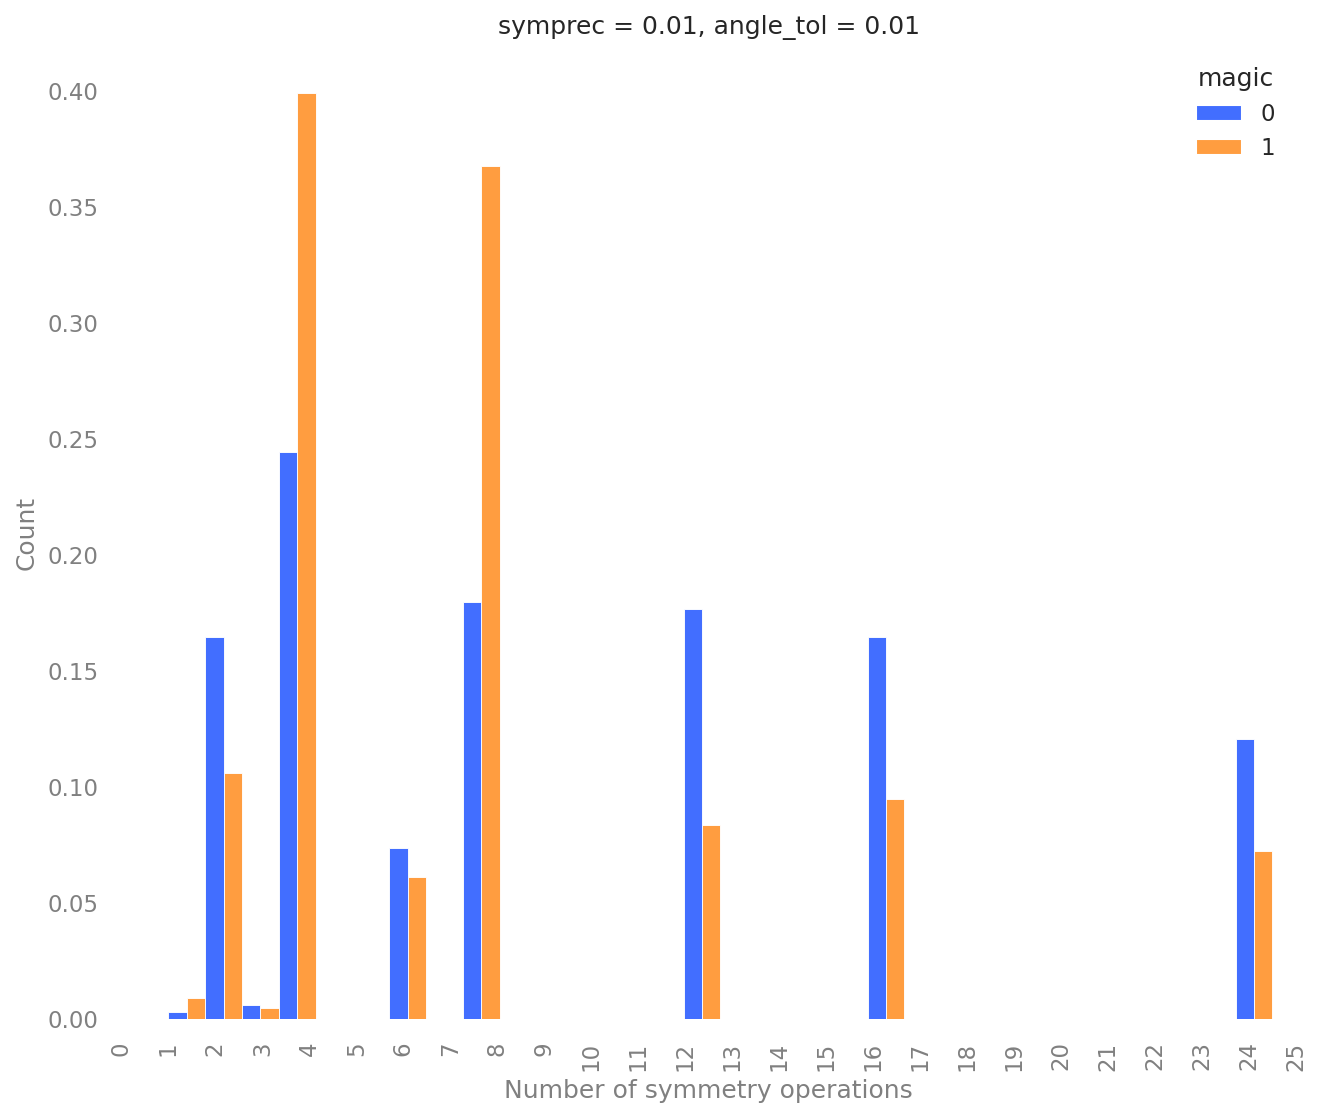

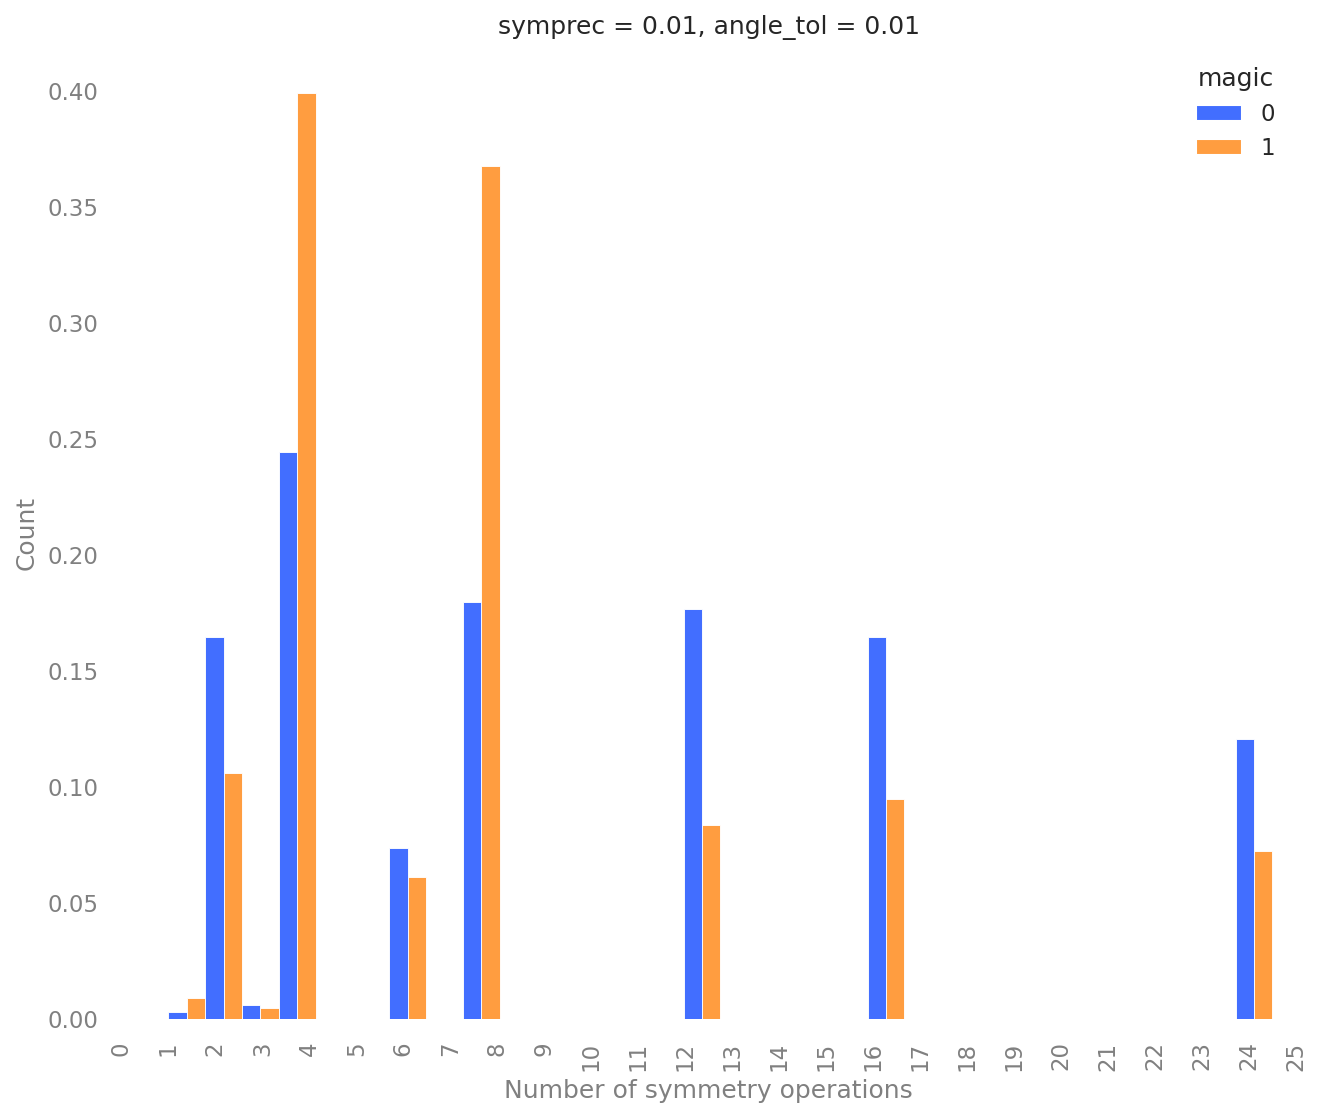

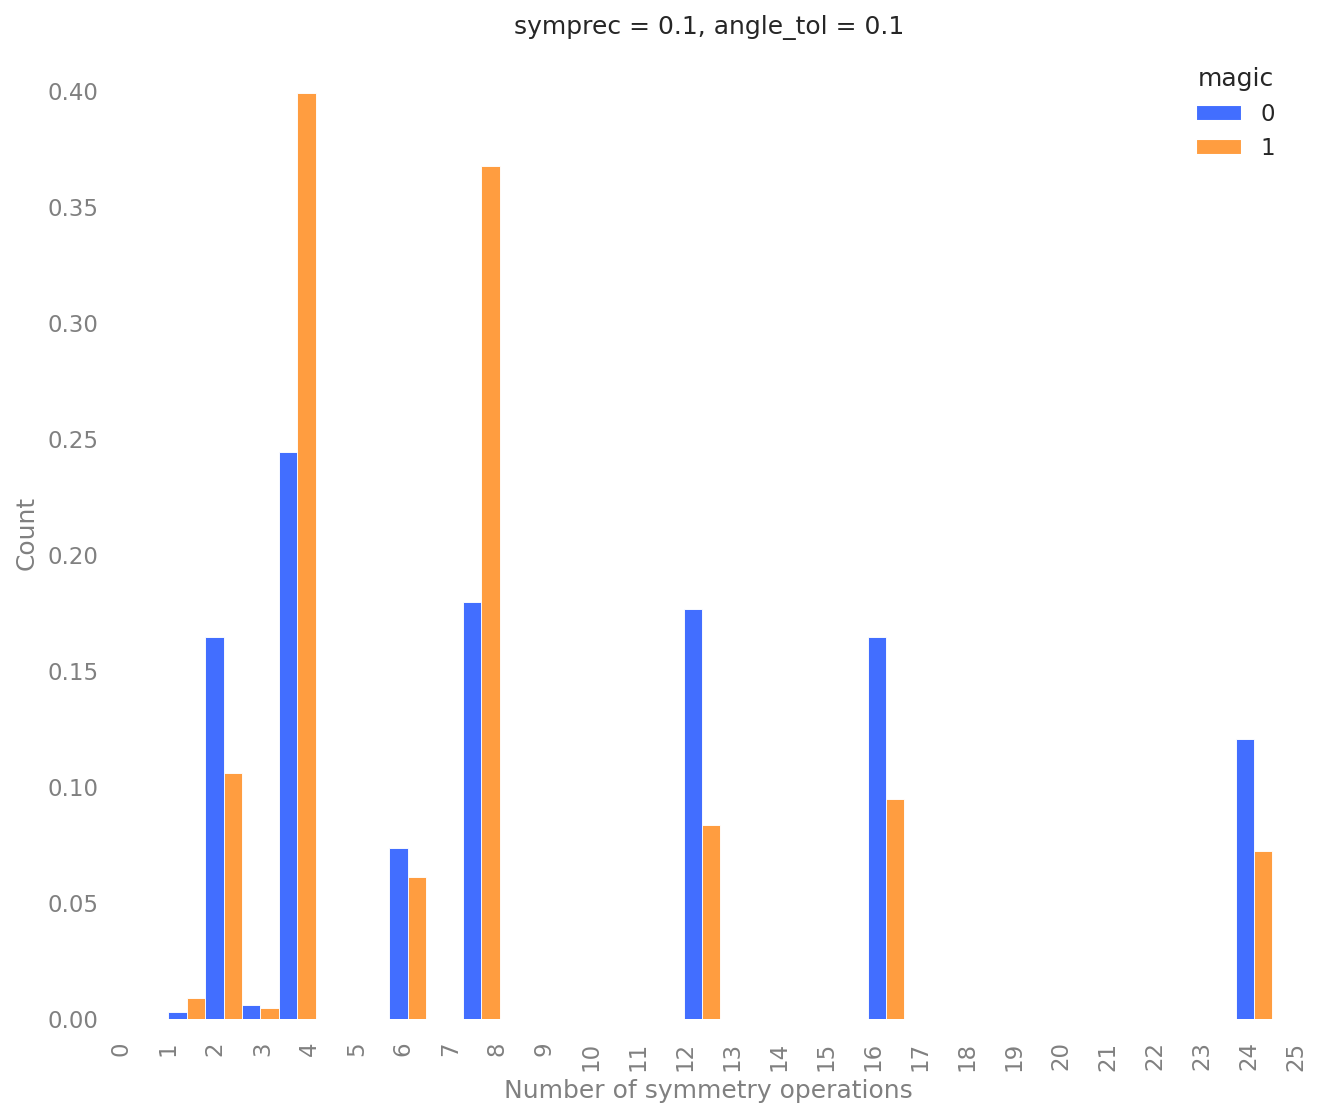

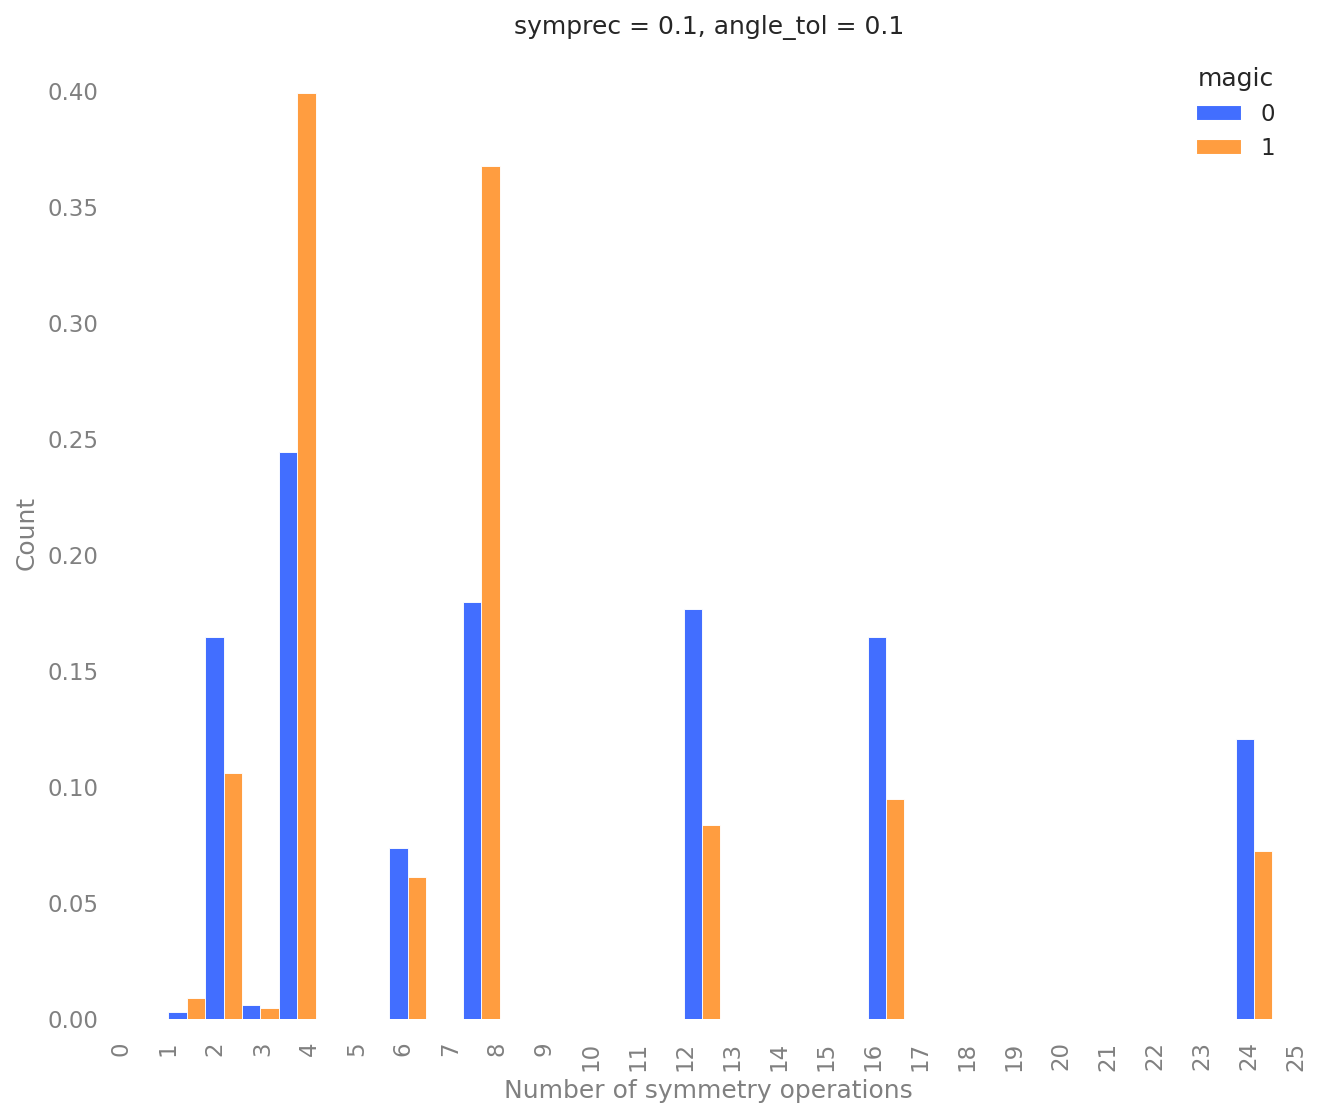

In [175]:
prec=[0.01, 0.1]
angl=[5,10]

for j in prec:
    for k in angl:
        operations=[]
        magic=[]
        error=0
        for [structure_data] in qb_red:
            py=structure_data.get_pymatgen()
            try:
                op=SA(py, symprec=0.1, angle_tolerance=5).get_symmetry_operations(cartesian=False)
            except:
                error+=1
                pass
            natom=len(py)
            if natom%4==0:
                m=1
            else:
                m=0
            magic.append(m)
            operations.append(len(op))
            
        dict={'n_op':operations, 'magic':magic} 
        df= pd.DataFrame(dict)
        df.head()
        sns.set(style="white", palette="bright", color_codes=True)
        f, ax = plt.subplots(figsize=(9, 8))
        sns.despine(left=True, bottom=True)
        y=sns.histplot(data=df, bins=60, x='n_op', hue='magic', common_norm=False, stat='density', multiple='dodge')
        plt.xticks(c='grey')
        plt.yticks(c='grey')
        plt.ylabel('Count', c='grey')
        plt.xlabel('Number of symmetry operations', c='grey')
        plt.title('symprec = '+str(j)+', angle_tol = '+str(k))
        plt.xticks(l, rotation=90)
        plt.xlim(0,25)
        plt.show()
        plt.close()

In [178]:
magic=[]
for [structure_data] in qb_red:
    natom = len(structure_data.get_site_kindnames())
    if natom%4==0:
        m=1
    else:
        m=0
    magic.append(m)

In [179]:
dict={'vol':volumes, 'area':areas, 'magic':magic} 
df= pd.DataFrame(dict)
df.head()

,vol,area,magic
0,272.728134,[{1025: {'site': [ 1.680625 5.041875 9.715...,1
1,234.434698,[{727: {'site': [ 2.1627475 8.6477475 2.1627...,0
2,103.790234,[{727: {'site': [ 2.1627475 8.6477475 2.1627...,1
3,570.048396,[{727: {'site': [ 2.1627475 8.6477475 2.1627...,1
4,595.508000,[{727: {'site': [ 2.1627475 8.6477475 2.1627...,1


In [188]:
(areas[0][0])

# iso=36*pi*volumes**2/(areas**3)

{1025: {'site': PeriodicSite: Al (1.6806, 5.0419, 9.7159) [0.2500, 0.7500, 0.7189],
  'normal': array([-0.41096443, -0.35225522, -0.84084749]),
  'solid_angle': 0.012579728565695995,
  'volume': 0.045070522070096042,
  'face_dist': 1.4771150748731665,
  'area': 0.091537598194167888,
  'n_verts': 3,
  'verts': [5060, 5055, 5067],
  'adj_neighbors': [285, 1186, 1151]},
 1186: {'site': PeriodicSite: Al (1.6806, 5.0419, 10.5566) [0.2500, 0.7500, 0.7811],
  'normal': array([-0.52947736, -0.45383773, -0.71671824]),
  'solid_angle': 1.9291470803998765,
  'volume': 1.8423026568254541,
  'face_dist': 1.1464923726520448,
  'area': 4.8207106321096767,
  'n_verts': 6,
  'verts': [5061, 5060, 5067, 5062, 5059, 5056],
  'adj_neighbors': [1025, 991, 285, 2107, 1389, 1263]},
 1151: {'site': PeriodicSite: Al (5.0419, 5.0419, 9.7159) [0.7500, 0.7500, 0.7189],
  'normal': array([ 0.62338134, -0.30212721, -0.72118989]),
  'solid_angle': 0.0026612259415486391,
  'volume': 0.0096032374067470741,
  'face_dis